# 라이브러리 로드

In [1]:
# 데이터 분석
import pandas as pd
import numpy as np

# 통계
import pingouin as pg
from scipy.stats import chisquare

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 컬럼 출력 생략 해제
pd.set_option('display.max_columns', None)

# 시각화 한글 표시
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 머신러닝
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# 데이터 로드

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", index_col="EmployeeNumber")
df_raw.shape

(1470, 34)

In [3]:
df_raw.head(2)

Age Attrition     BusinessTravel  DailyRate  \
EmployeeNumber                                                
1                41       Yes      Travel_Rarely       1102   
2                49        No  Travel_Frequently        279   

                            Department  DistanceFromHome  Education  \
EmployeeNumber                                                        
1                                Sales                 1          2   
2               Research & Development                 8          1   

               EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  \
EmployeeNumber                                                                  
1               Life Sciences              1                        2  Female   
2               Life Sciences              1                        3    Male   

                HourlyRate  JobInvolvement  JobLevel             JobRole  \
EmployeeNumber                                                             
1                       94               3         2     Sales Executive   
2                       61               2         2  Research Scientist   

                JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                              
1                             4        Single           5993        19479   
2                             2       Married           5130        24907   

                NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
EmployeeNumber                                                          
1                                8      Y      Yes                 11   
2                                1      Y       No                 23   

                PerformanceRating  RelationshipSatisfaction  StandardHours  \
EmployeeNumber                                                               
1                               3                         1             80   
2                               4                         4             80   

                StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
EmployeeNumber                                                               
1                              0                  8                      0   
2                              1                 10                      3   

                WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
EmployeeNumber                                                        
1                             1               6                   4   
2                             3              10                   7   

                YearsSinceLastPromotion  YearsWithCurrManager  
EmployeeNumber                                                 
1                                     0                     5  
2                                     1                     7

# 데이터 확인 및 전처리

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## 결측치 확인

In [5]:
df_raw.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

## 중복값 확인

In [6]:
df_raw.duplicated().sum()

0

## 문자열 컬럼 확인

In [7]:
# 문자열 컬럼만 출력
df_raw.select_dtypes("object").head()

Attrition     BusinessTravel              Department  \
EmployeeNumber                                                        
1                    Yes      Travel_Rarely                   Sales   
2                     No  Travel_Frequently  Research & Development   
4                    Yes      Travel_Rarely  Research & Development   
5                     No  Travel_Frequently  Research & Development   
7                     No      Travel_Rarely  Research & Development   

               EducationField  Gender                JobRole MaritalStatus  \
EmployeeNumber                                                               
1               Life Sciences  Female        Sales Executive        Single   
2               Life Sciences    Male     Research Scientist       Married   
4                       Other    Male  Laboratory Technician        Single   
5               Life Sciences  Female     Research Scientist       Married   
7                     Medical    Male  Laboratory Technician       Married   

               Over18 OverTime  
EmployeeNumber                  
1                   Y      Yes  
2                   Y       No  
4                   Y      Yes  
5                   Y      Yes  
7                   Y       No

In [8]:
# 문자열 컬럼의 기술통계값
df_raw.describe(include='O')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

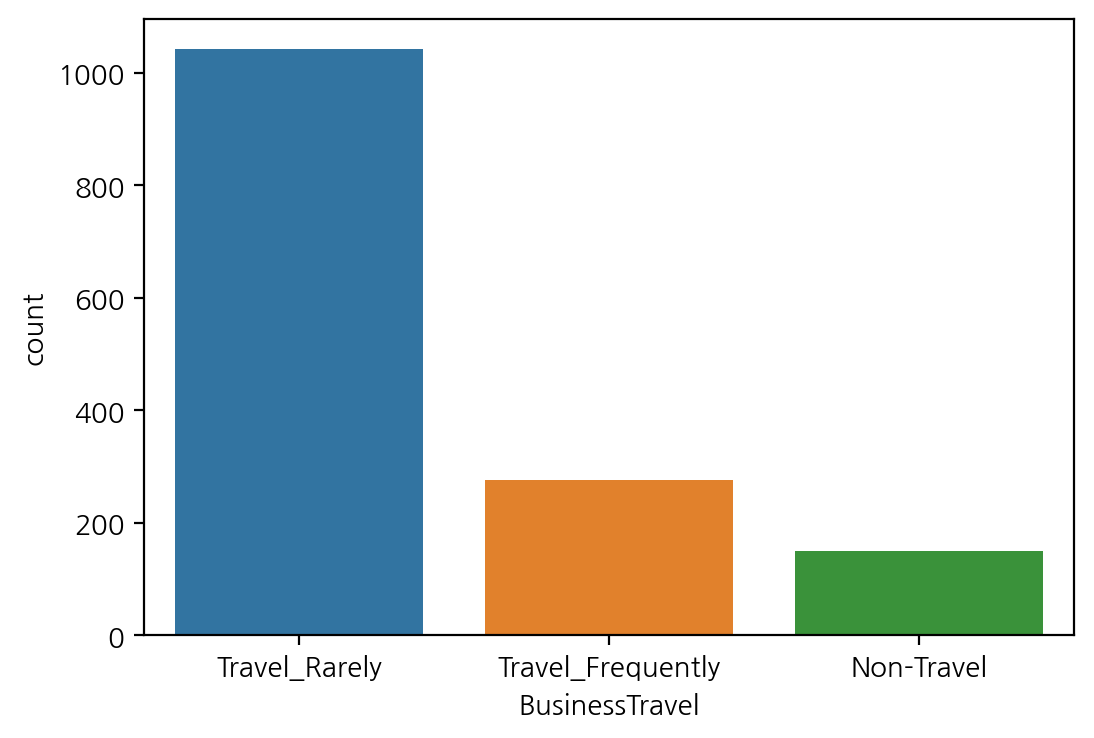

In [9]:
# 출장을 드물게 간 직원이 가장 많음
display(df_raw["BusinessTravel"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df_raw["BusinessTravel"])

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot: xlabel='Department', ylabel='count'>

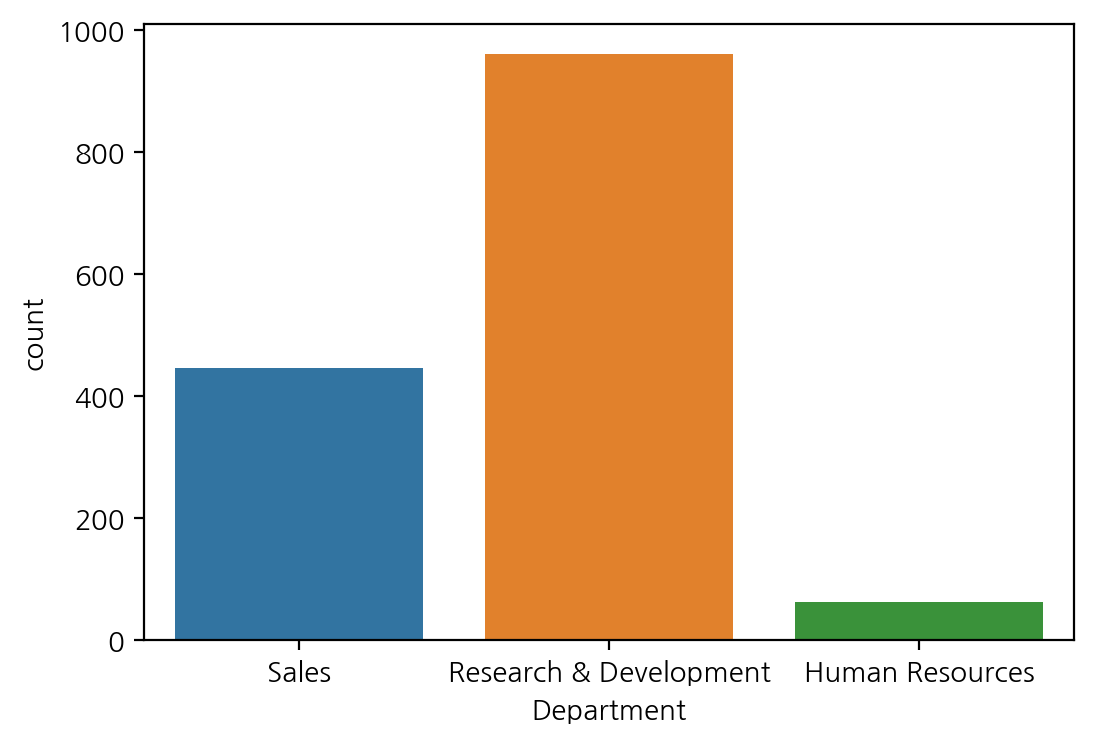

In [10]:
# R&D 부서가 가장 많고, Sales, HR 순.
display(df_raw["Department"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df_raw["Department"])

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

<AxesSubplot: xlabel='EducationField', ylabel='count'>

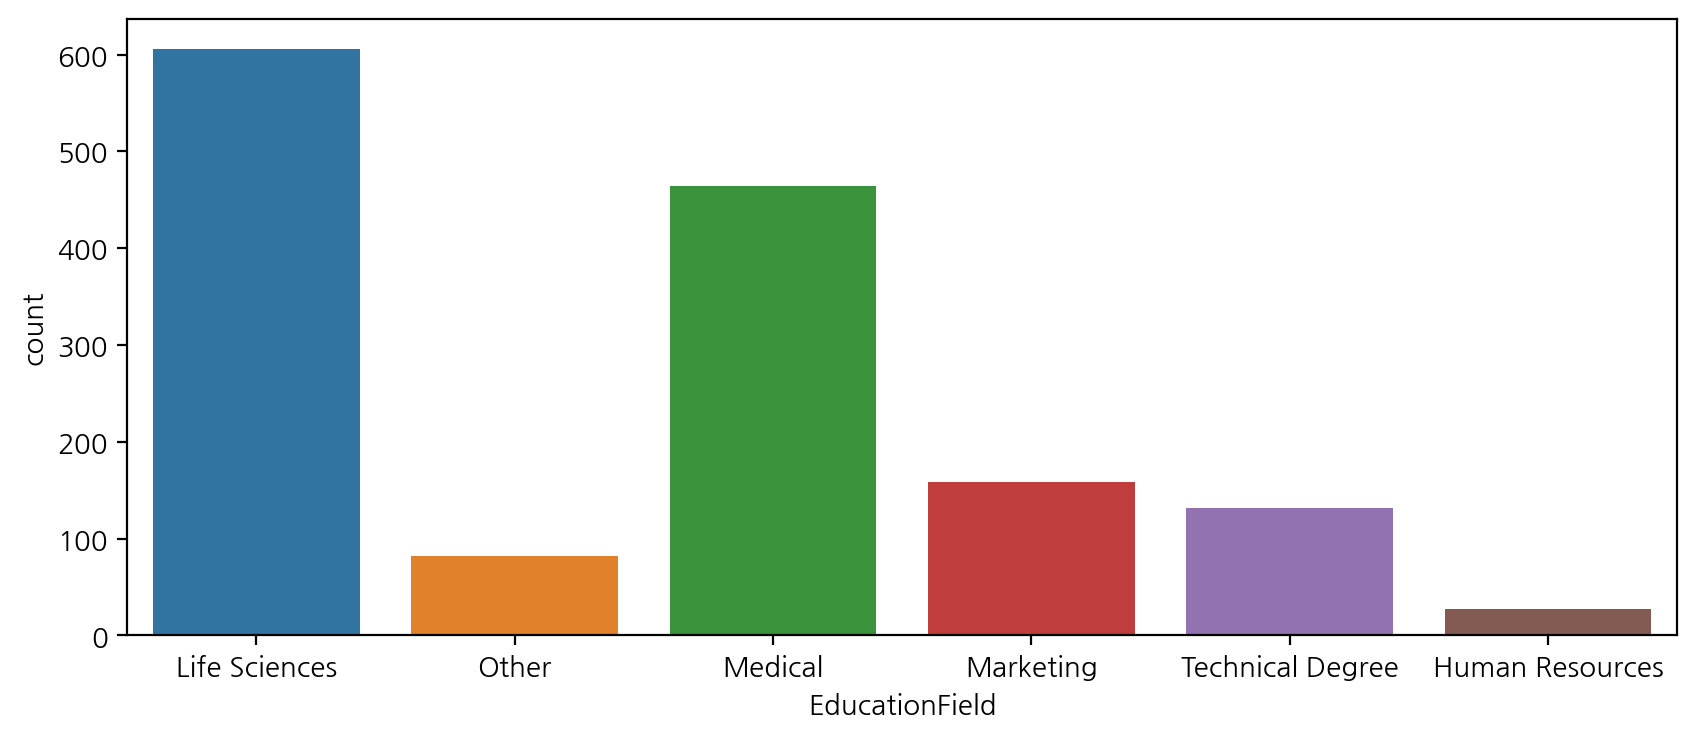

In [11]:
# 생명과학, 의학 계열 교육적 배경을 가진 직원이 많음 -> 생명과학, 의학쪽 도메인으로 추정
display(df_raw["EducationField"].value_counts())

plt.figure(figsize=(10,4))
sns.countplot(x=df_raw["EducationField"])

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot: xlabel='JobRole', ylabel='count'>

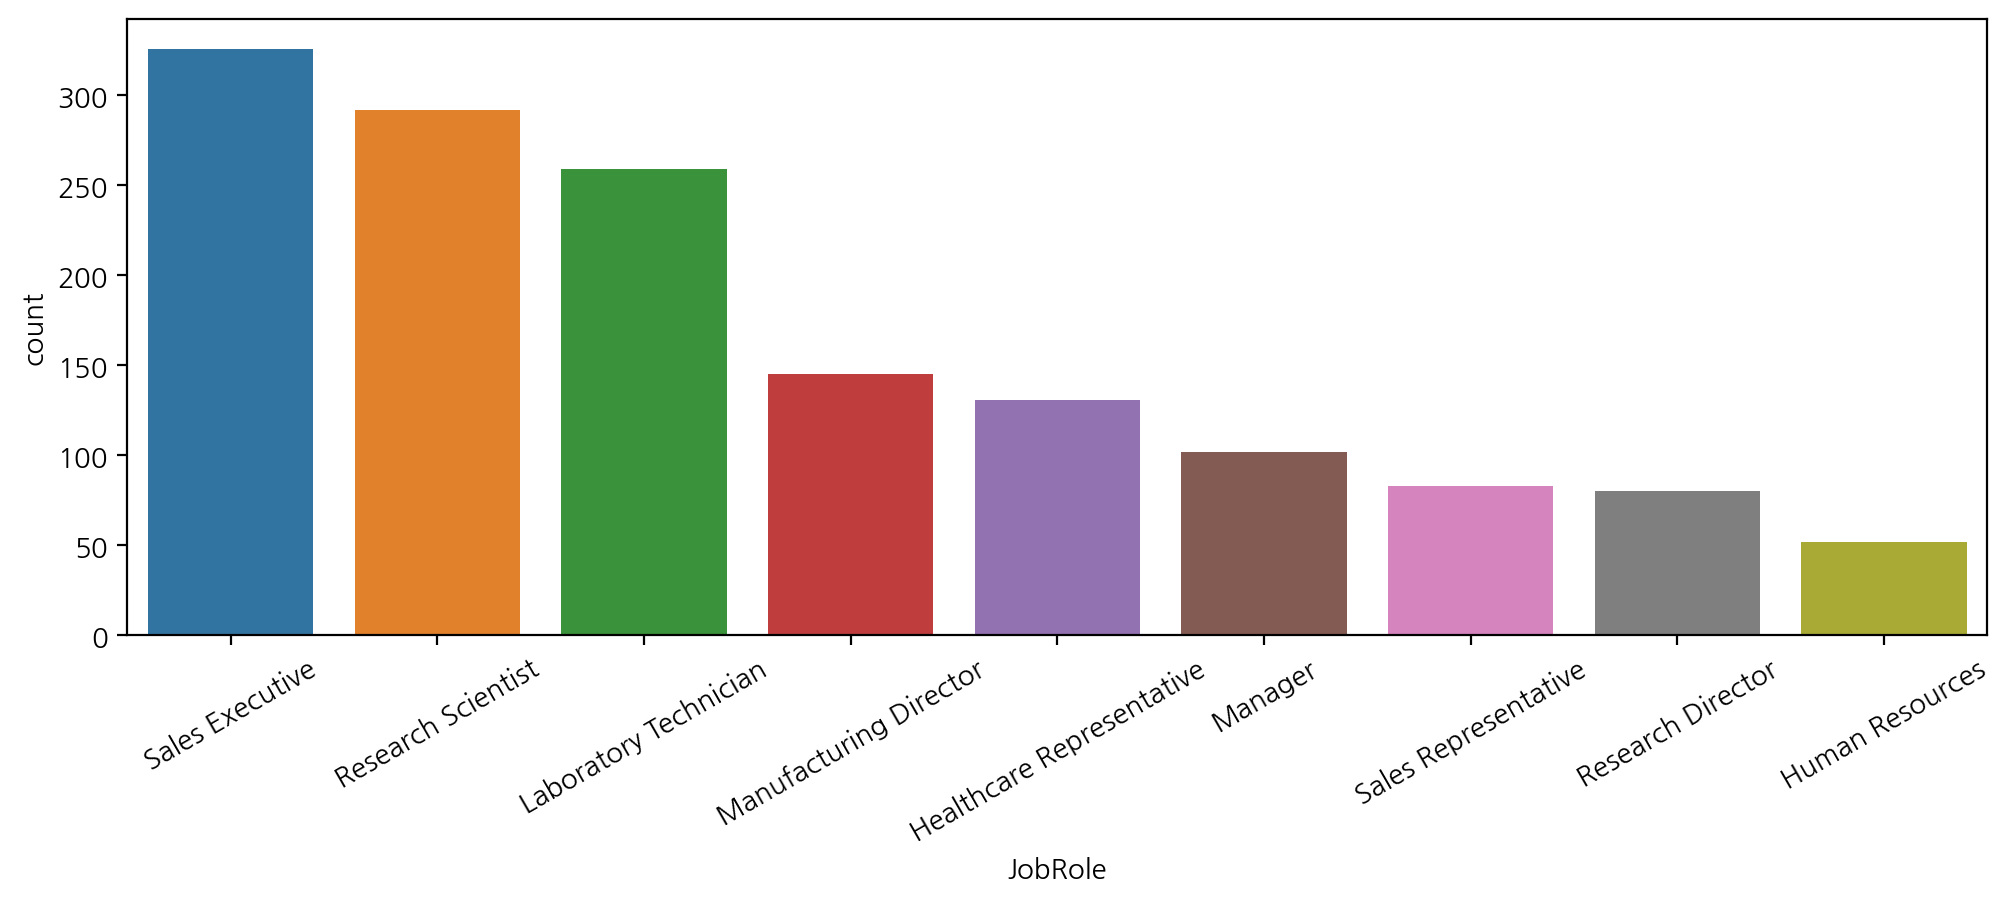

In [12]:
# Sales Executive(영업사원), Research Scientist, Laboratory Technician 순으로 많음. -> 생명과학, 이공계, 의학 계열 제품을 개발하는 회사?
display(df_raw["JobRole"].value_counts())

plt.figure(figsize=(12,4))
plt.xticks(fontsize=10, rotation=30)
sns.countplot(x=df_raw["JobRole"])

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot: xlabel='MaritalStatus', ylabel='count'>

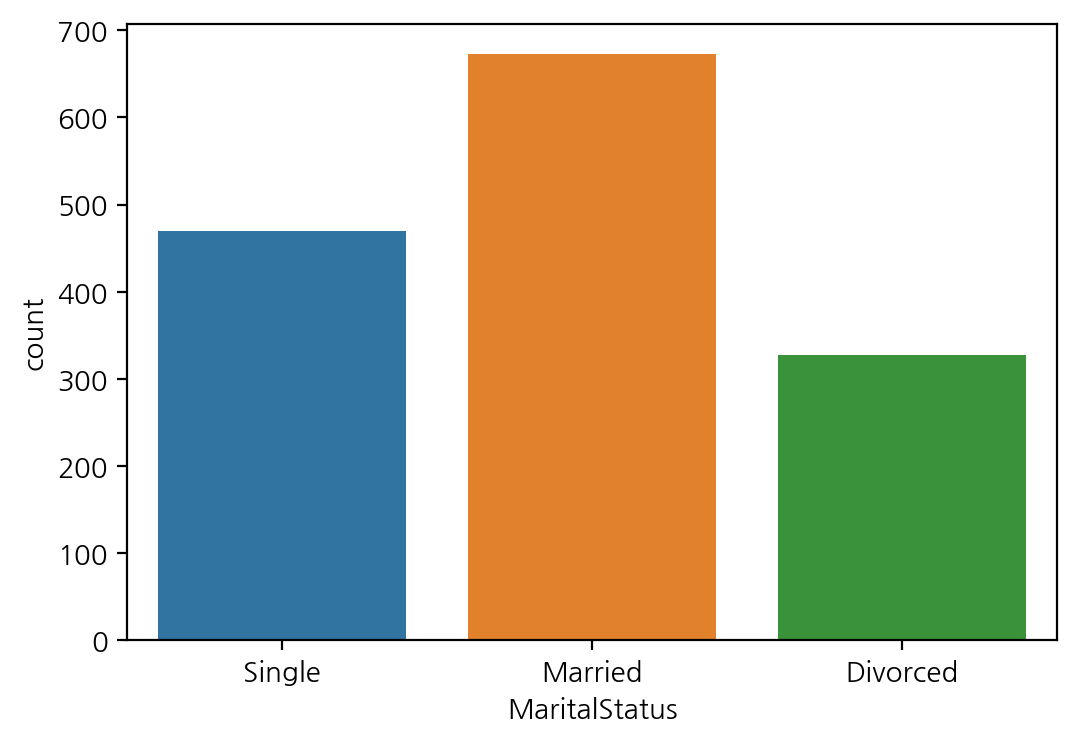

In [13]:
# 미혼자보다 기혼자가 많음. 이혼한 사람을 따로 조사한 이유는?
display(df_raw["MaritalStatus"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=df_raw["MaritalStatus"])

## 수치형 컬럼 확인

In [14]:
# 수치형 컬럼만 출력
df_raw.select_dtypes(exclude="object").head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
EmployeeNumber                                                               
1                41       1102                 1          2              1   
2                49        279                 8          1              1   
4                37       1373                 2          2              1   
5                33       1392                 3          4              1   
7                27        591                 2          1              1   

                EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
EmployeeNumber                                                                  
1                                     2          94               3         2   
2                                     3          61               2         2   
4                                     4          92               2         1   
5                                     4          56               3         1   
7                                     1          40               3         1   

                JobSatisfaction  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                
1                             4           5993        19479   
2                             2           5130        24907   
4                             3           2090         2396   
5                             3           2909        23159   
7                             2           3468        16632   

                NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                                             
1                                8                 11                  3   
2                                1                 23                  4   
4                                6                 15                  3   
5                                1                 11                  3   
7                                9                 12                  3   

                RelationshipSatisfaction  StandardHours  StockOptionLevel  \
EmployeeNumber                                                              
1                                      1             80                 0   
2                                      4             80                 1   
4                                      2             80                 0   
5                                      3             80                 0   
7                                      4             80                 1   

                TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                              
1                               8                      0                1   
2                              10                      3                3   
4                               7                      3                3   
5                               8                      3                3   
7                               6                      3                3   

                YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                                
1                            6                   4                        0   
2                           10                   7                        1   
4                            0                   0                        0   
5                            8                   7                        3   
7                            2                   2                        2   

                YearsWithCurrManager  
EmployeeNumber                        
1                                  5  
2                                  7  
4                                  0  
5                                  0  
7                                  2

In [15]:
# 수치형 컬럼의 기술통계값
df_raw.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1470.000000    1470.000000   1470.000000         1470.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102846    4707.956783   7117.786044            2.498009   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8047.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8379.000000  20461.500000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1470.000000        1470.000000               1470.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659938           0.360824                  1.081209   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000     

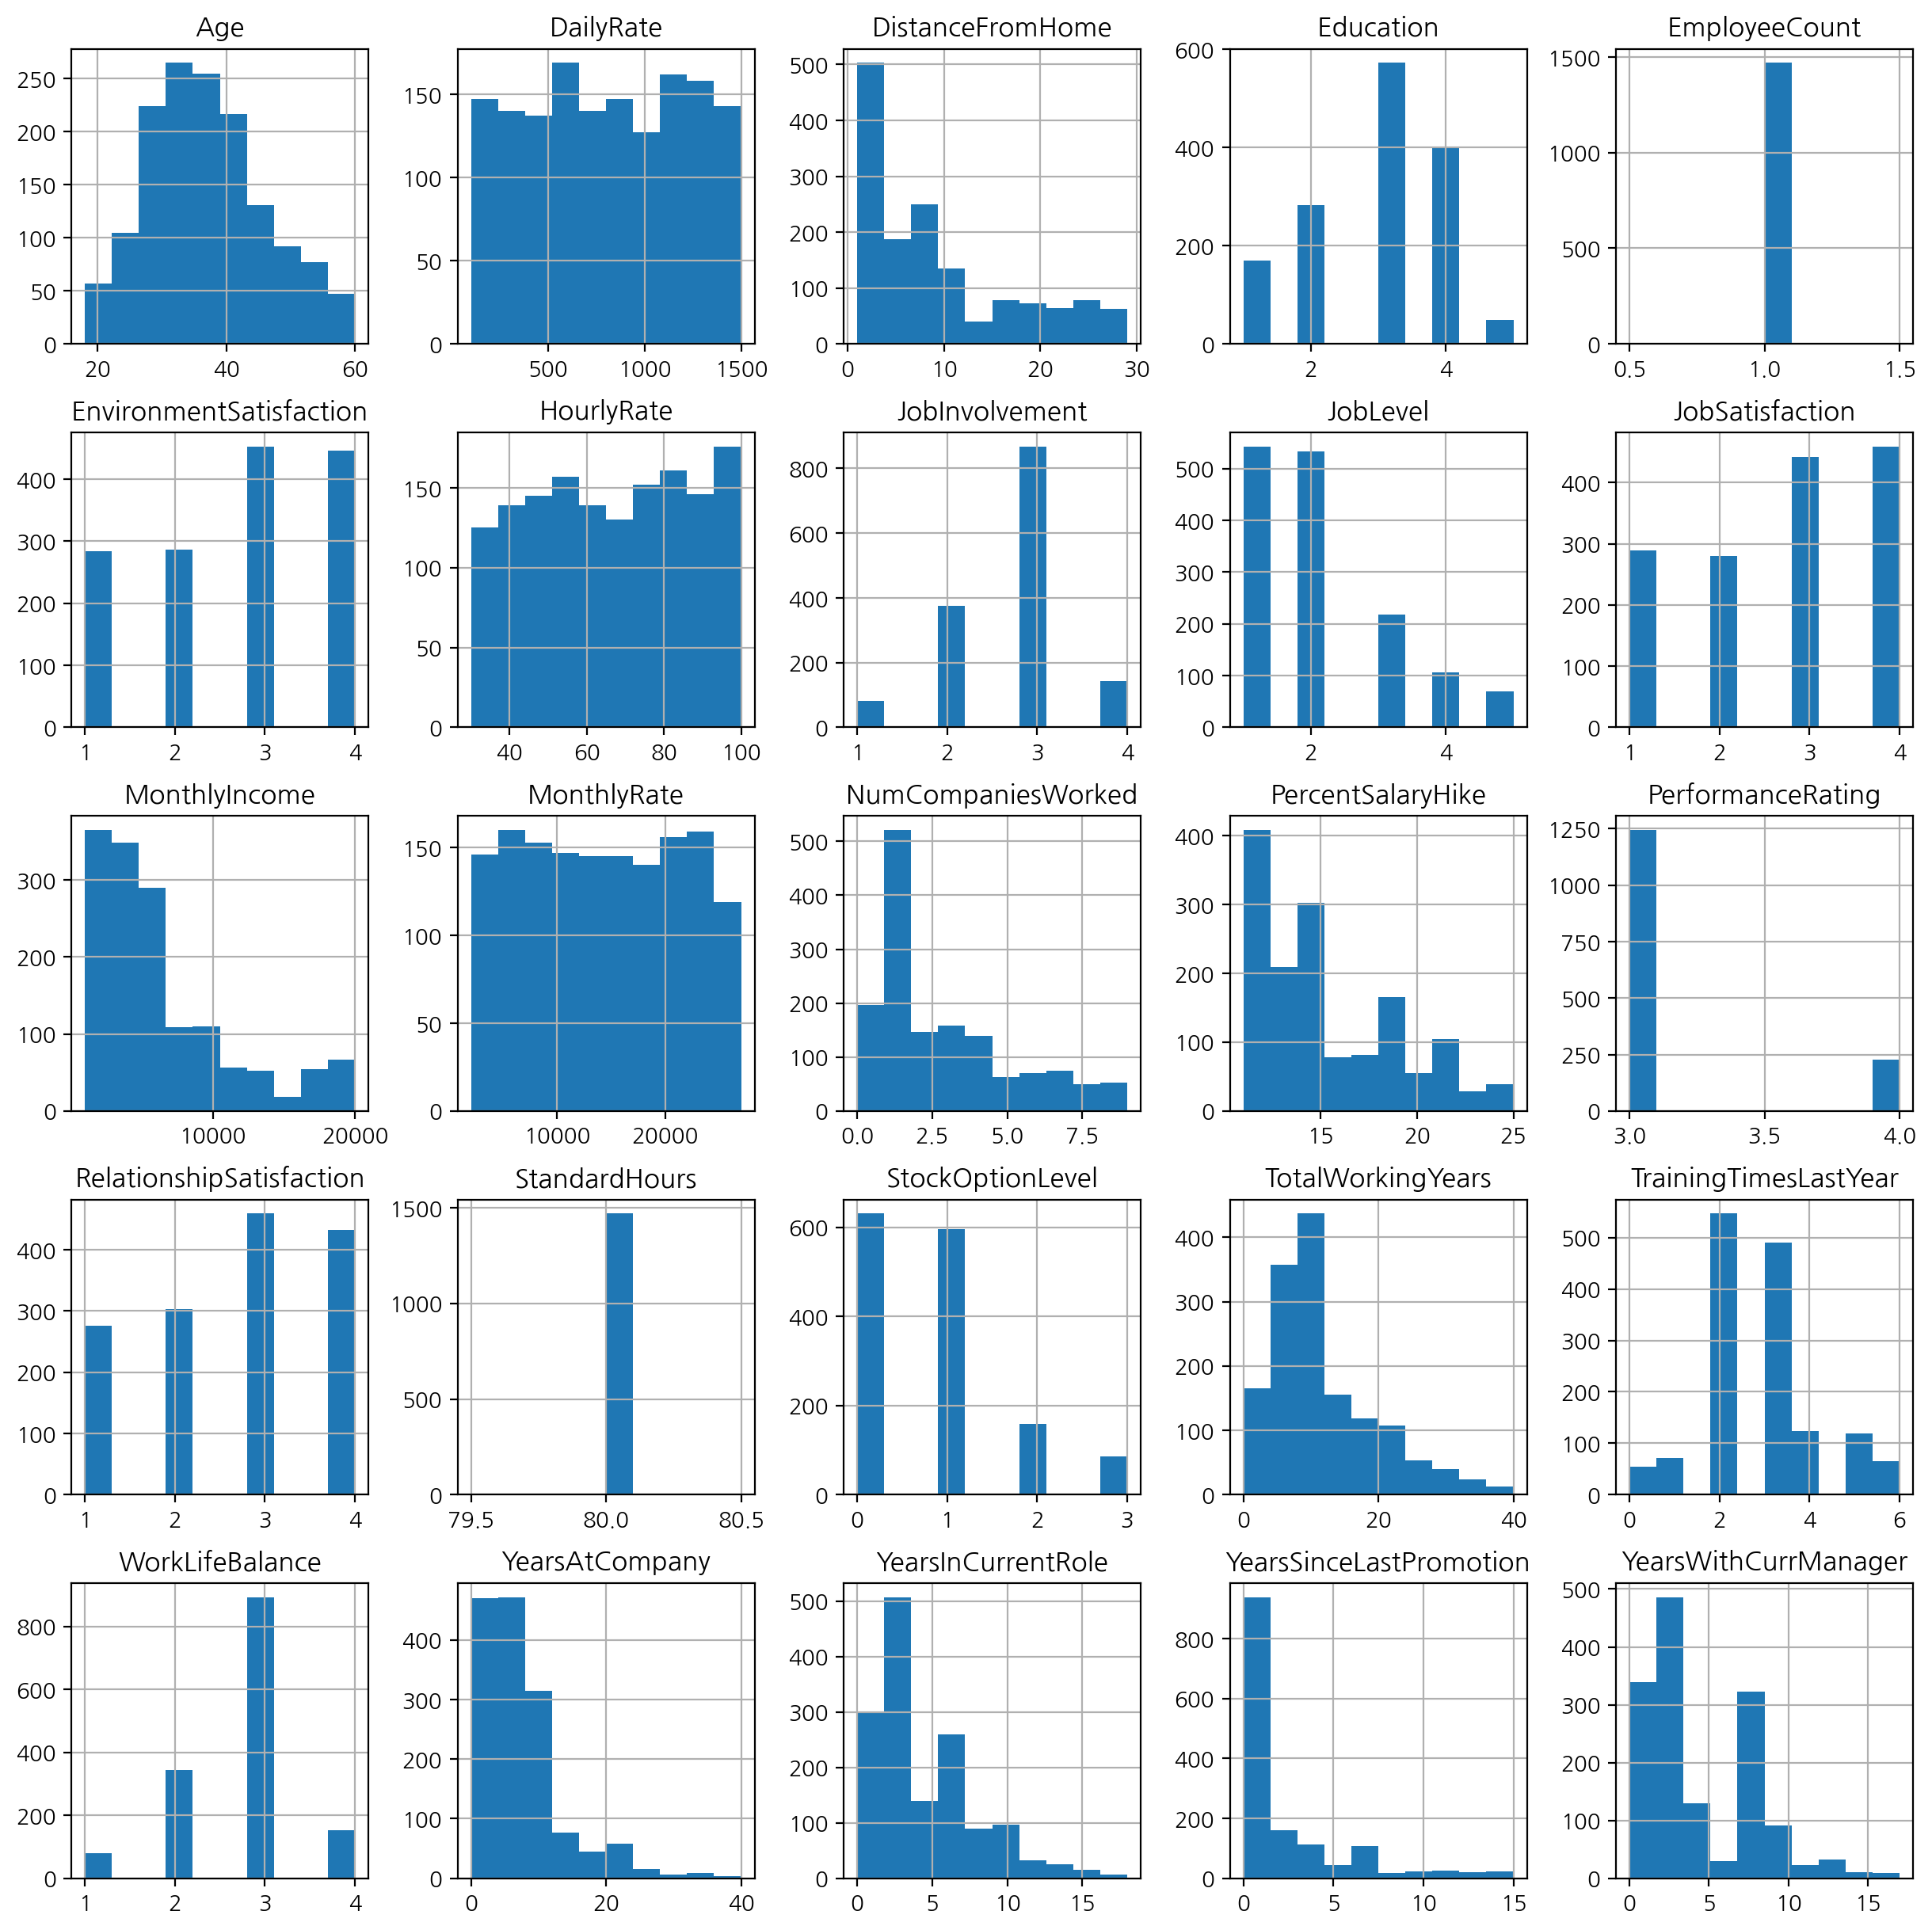

In [16]:
# 수치형 컬럼의 히스토그램

df_raw.hist(figsize=(15,15));

## 불필요한 컬럼 제거
`Over18`, `EmployeeCount`, `StandardHours`, `DailyRate`, `HourlyRate`, `MonthlyRate`

In [17]:
df_raw["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [18]:
df_raw["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [19]:
df_raw["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

=> `Over18`, `EmployeeCount`, `StandardHours` : 모두 하나의 값만 존재. 불필요한 컬럼으로 판단.

=> `DailyRate`, `HourlyRate`, `MonthlyRate` : 불분명한 컬럼의 의미.

In [20]:
df_raw = df_raw.drop(columns=['Over18', 'EmployeeCount', 'StandardHours','DailyRate', 'HourlyRate', 'MonthlyRate'])
df_raw.shape

(1470, 28)

In [21]:
df_raw.head(1)

Age Attrition BusinessTravel Department  DistanceFromHome  \
EmployeeNumber                                                              
1                41       Yes  Travel_Rarely      Sales                 1   

                Education EducationField  EnvironmentSatisfaction  Gender  \
EmployeeNumber                                                              
1                       2  Life Sciences                        2  Female   

                JobInvolvement  JobLevel          JobRole  JobSatisfaction  \
EmployeeNumber                                                               
1                            3         2  Sales Executive                4   

               MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
EmployeeNumber                                                             
1                     Single           5993                   8      Yes   

                PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                         
1                              11                  3   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                  
1                                      1                 0                  8   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
EmployeeNumber                                                           
1                                   0                1               6   

                YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                
1                                4                        0   

                YearsWithCurrManager  
EmployeeNumber                        
1                                  5

## label 값 분포 확인

In [22]:
# Attrition 분포 -> 불균형 데이터
df_raw["Attrition"].value_counts(1)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

<AxesSubplot: xlabel='Attrition', ylabel='count'>

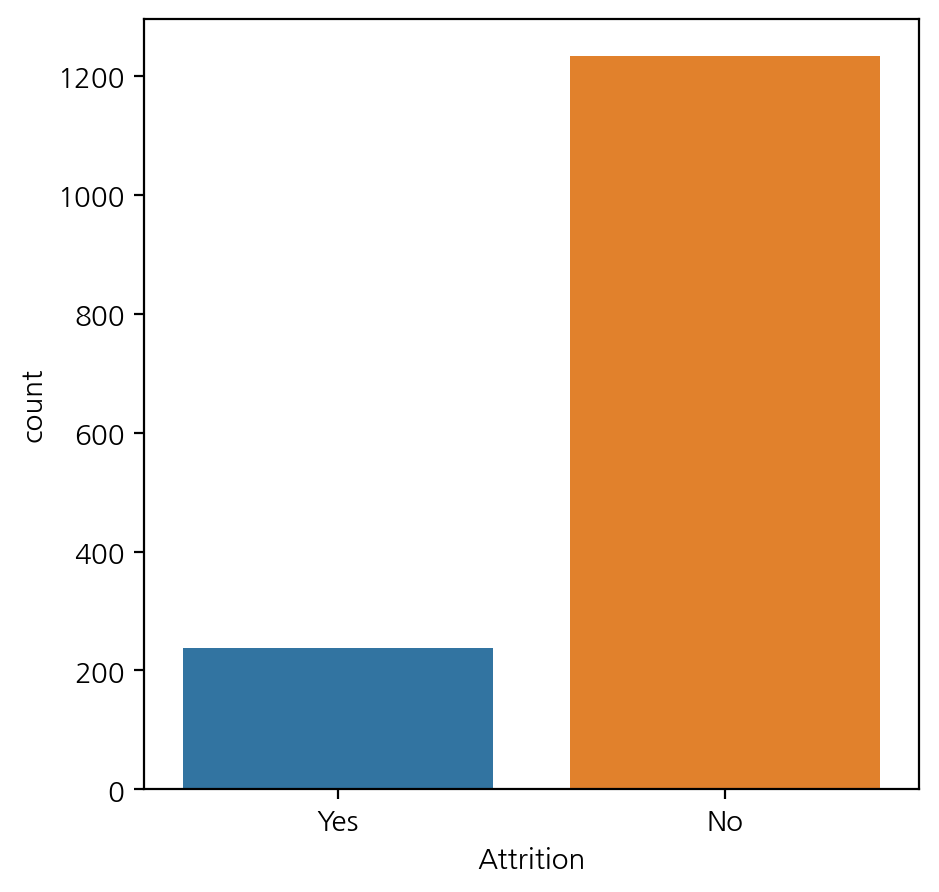

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_raw["Attrition"])

# 분석시 주요 변수 찾기
* 수치형 -> t-test, PCA
* 범주형(순서형 포함) -> chi-square

**클래스 불균형 문제를 해결하기 위해 `언더샘플링`, `오버샘플링` 기능을 모두 사용 후 공통적으로 유의미한 연관을 보이는 변수를 선정**

## 클래스 불균형 해결

### 언더샘플링

In [24]:
# 언더샘플링
df_raw['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [25]:
df_yes = df_raw[df_raw['Attrition']=='Yes']
df_no = df_raw[df_raw['Attrition']=='No'].sample(237)

df_yes.shape, df_no.shape

((237, 28), (237, 28))

In [26]:
df_under = pd.concat([df_yes, df_no])

In [27]:
df_under['Attrition'].value_counts()

Yes    237
No     237
Name: Attrition, dtype: int64

### 오버샘플링
**인코딩**

In [28]:
# Object 컬럼들
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# 깊은 복사 해주기
df_encoded = df_raw.copy(deep=True)

# Scikit-learn 사용해서 라벨 인코딩하기
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        df_encoded[col] = lab_enc.fit_transform(df_raw[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

df_encoded.head()

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
EmployeeNumber                                                                 
1                41          1               2           2                 1   
2                49          0               1           1                 8   
4                37          1               2           1                 2   
5                33          0               1           1                 3   
7                27          0               2           1                 2   

                Education  EducationField  EnvironmentSatisfaction  Gender  \
EmployeeNumber                                                               
1                       2               1                        2       0   
2                       1               1                        3       1   
4                       2               4                        4       1   
5                       4               1                        4       0   
7                       1               3                        1       1   

                JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
EmployeeNumber                                                       
1                            3         2        7                4   
2                            2         2        6                2   
4                            2         1        2                3   
5                            3         1        6                3   
7                            3         1        2                2   

                MaritalStatus  MonthlyIncome  NumCompaniesWorked  OverTime  \
EmployeeNumber                                                               
1                           2           5993                   8         1   
2                           1           5130                   1         0   
4                           2           2090                   6         1   
5                           1           2909                   1         1   
7                           1           3468                   9         0   

                PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                         
1                              11                  3   
2                              23                  4   
4                              15                  3   
5                              11                  3   
7                              12                  3   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                  
1                                      1                 0                  8   
2                                      4                 1                 10   
4                                      2                 0                  7   
5                                      3                 0                  8   
7                                      4                 1                  6   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
EmployeeNumber                                                           
1                                   0                1               6   
2                                   3                3              10   
4                                   3                3               0   
5                                   3                3               8   
7                                   3                3               2   

                YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                
1                                4                        0   
2                                7                        1   
4                                0                        0   
5                                7                        3   
7           

In [29]:
df_over = df_encoded.copy()

In [30]:
label_name = "Attrition"

X = df_over.drop(label_name, axis=1)
y = df_over[label_name]
X.shape, y.shape

((1470, 27), (1470,))

In [31]:
# SMOTE

sm = SMOTE(random_state=42)
X_over, y_over = sm.fit_resample(X, y)

In [32]:
X_over.shape, y_over.shape

((2466, 27), (2466,))

In [33]:
# y의 value_counts
y.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [34]:
# y_resample의 value_counts
y_over.value_counts(1)

1    0.5
0    0.5
Name: Attrition, dtype: float64

In [35]:
df_over = pd.concat([X_over, y_over], axis=1)
df_over

Age  BusinessTravel  Department  DistanceFromHome  Education  \
0      41               2           2                 1          2   
1      49               1           1                 8          1   
2      37               2           1                 2          2   
3      33               1           1                 3          4   
4      27               2           1                 2          1   
...   ...             ...         ...               ...        ...   
2461   24               2           1                12          1   
2462   33               0           2                18          3   
2463   47               1           1                 1          4   
2464   23               2           1                 5          1   
2465   31               2           1                 6          4   

      EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0                  1                        2       0               3   
1                  1                        3       1               2   
2                  4                        4       1               2   
3                  1                        4       0               3   
4                  3                        1       1               3   
...              ...                      ...     ...             ...   
2461               4                        4       0               3   
2462               2                        1       0               3   
2463               3                        3       1               3   
2464               2                        2       0               3   
2465               3                        3       1               2   

      JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  \
0            2        7                4              2           5993   
1            2        6                2              1           5130   
2            1        2                3              2           2090   
3            1        6                3              1           2909   
4            1        2                2              1           3468   
...        ...      ...              ...            ...            ...   
2461         1        6                4              2           2690   
2462         2        7                3              2           5310   
2463         1        6                3              1           4735   
2464         1        7                1              2           2673   
2465         1        4                2              2           3425   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                      8         1                 11                  3   
1                      1         0                 23                  4   
2                      6         1                 15                  3   
3                      1         1                 11                  3   
4                      9         0                 12                  3   
...                  ...       ...                ...                ...   
2461                   1         0                 17                  3   
2462                   7         0                 13                  3   
2463                   3         1                 14                  3   
2464                   2         0                 12                  3   
2465                   3         0                 17                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...            

**변수 유형별 모음**

In [36]:
# 수치형 변수 모음
number_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
               'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
               'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
               'YearsWithCurrManager']

# 순서형 변수 모음
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement',
                'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# 범주형 변수 모음
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
            'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# 순서형 + 범주형 변수 모음
cat_ord_list = ordinal_cols + cat_cols

## 통계기법으로 주요 변수 찾기
### 수치형 변수 | df_raw | t-test

In [37]:
# Attrition에 따른 수치형 변수간 t-test
# Attrition은 각각의 수치형 변수에 대해 유의미한 차이가 있는가?


try:
    for col in number_cols:
        Attrition_yes = df_raw[df_raw['Attrition'] == 'Yes'][col]
        Attrition_no = df_raw[df_raw['Attrition'] == 'No'][col]
        display(col, pg.ttest(Attrition_yes, Attrition_no))
except:
    pass

'Age'

T         dof alternative         p-val           CI95%  \
T-test -5.828012  316.931112   two-sided  1.379760e-08  [-5.29, -2.62]   

         cohen-d       BF10  power  
T-test  0.438225  1.181e+06    1.0

'DistanceFromHome'

T         dof alternative     p-val         CI95%   cohen-d  \
T-test  2.888183  322.724279   two-sided  0.004137  [0.55, 2.89]  0.212401   

        BF10     power  
T-test  4.71  0.849148

'MonthlyIncome'

T         dof alternative         p-val                 CI95%  \
T-test -7.482622  412.740748   two-sided  4.433589e-13  [-2583.05, -1508.24]   

         cohen-d       BF10  power  
T-test  0.440018  4.471e+10    1.0

'NumCompaniesWorked'

T         dof alternative     p-val          CI95%   cohen-d  \
T-test  1.574651  317.138829   two-sided  0.116334  [-0.07, 0.66]  0.118305   

         BF10     power  
T-test  0.267  0.384891

'PercentSalaryHike'

T         dof alternative    p-val          CI95%  cohen-d  \
T-test -0.504245  326.107117   two-sided  0.61443  [-0.66, 0.39]  0.03663   

        BF10     power  
T-test  0.09  0.081033

'TotalWorkingYears'

T         dof alternative         p-val          CI95%  \
T-test -7.019179  350.876864   two-sided  1.159817e-11  [-4.63, -2.6]   

         cohen-d       BF10  power  
T-test  0.471815  1.817e+09    1.0

'TrainingTimesLastYear'

T         dof alternative     p-val           CI95%   cohen-d  \
T-test -2.330522  339.557098   two-sided  0.020364  [-0.38, -0.03]  0.161916   

         BF10     power  
T-test  1.135  0.626075

'YearsAtCompany'

T         dof alternative         p-val          CI95%  \
T-test -5.282596  338.213101   two-sided  2.285905e-07  [-3.07, -1.4]   

         cohen-d       BF10     power  
T-test  0.368551  6.341e+04  0.999387

'YearsInCurrentRole'

T         dof alternative         p-val           CI95%  \
T-test -6.847079  366.568825   two-sided  3.187390e-11  [-2.04, -1.13]   

         cohen-d       BF10  power  
T-test  0.442011  5.811e+08    1.0

'YearsSinceLastPromotion'

T         dof alternative     p-val          CI95%   cohen-d  \
T-test -1.287927  338.491595   two-sided  0.198651  [-0.73, 0.15]  0.089777   

         BF10     power  
T-test  0.179  0.244156

'YearsWithCurrManager'

T         dof alternative         p-val           CI95%  \
T-test -6.633399  365.098101   two-sided  1.185022e-10  [-1.96, -1.07]   

         cohen-d       BF10  power  
T-test  0.429743  1.464e+08    1.0

### 수치형 변수 | df_under | t-test

In [38]:
# Attrition에 따른 수치형 변수간 t-test
# Attrition은 각각의 수치형 변수에 대해 유의미한 차이가 있는가?


try:
    for col in number_cols:
        Attrition_yes = df_under[df_under['Attrition'] == 'Yes'][col]
        Attrition_no = df_under[df_under['Attrition'] == 'No'][col]
        display(col, pg.ttest(Attrition_yes, Attrition_no))
except:
    pass

'Age'

T  dof alternative     p-val           CI95%   cohen-d  \
T-test -4.513646  472   two-sided  0.000008  [-5.65, -2.22]  0.414637   

            BF10     power  
T-test  1688.082  0.994528

'DistanceFromHome'

T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test  2.197939  472   two-sided  0.028438  [0.18, 3.16]  0.201909  1.054   

          power  
T-test  0.59233

'MonthlyIncome'

T  dof alternative         p-val                 CI95%  \
T-test -5.774219  472   two-sided  1.403308e-08  [-2992.19, -1472.75]   

         cohen-d       BF10     power  
T-test  0.530437  6.825e+05  0.999928

'NumCompaniesWorked'

T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  1.870081  472   two-sided  0.062091  [-0.02, 0.88]  0.171791  0.554   

           power  
T-test  0.462743

'PercentSalaryHike'

T  dof alternative    p-val         CI95%  cohen-d   BF10  \
T-test  0.784978  472   two-sided  0.43286  [-0.4, 0.93]  0.07211  0.138   

           power  
T-test  0.122722

'TotalWorkingYears'

T  dof alternative         p-val          CI95%  cohen-d  \
T-test -5.043271  472   two-sided  6.537596e-07  [-4.78, -2.1]  0.46329   

             BF10    power  
T-test  1.786e+04  0.99894

'TrainingTimesLastYear'

T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -1.640668  472   two-sided  0.101532  [-0.43, 0.04]  0.150717  0.376   

           power  
T-test  0.373647

'YearsAtCompany'

T  dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -3.625909  472   two-sided  0.000319  [-3.01, -0.89]  0.333087  56.043   

           power  
T-test  0.951397

'YearsInCurrentRole'

T  dof alternative     p-val           CI95%   cohen-d  \
T-test -4.706912  472   two-sided  0.000003  [-2.03, -0.84]  0.432391   

            BF10     power  
T-test  3883.138  0.996903

'YearsSinceLastPromotion'

T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test -0.83983  472   two-sided  0.401429  [-0.79, 0.32]  0.077149  0.144   

           power  
T-test  0.133535

'YearsWithCurrManager'

T  dof alternative     p-val          CI95%   cohen-d  \
T-test -4.564821  472   two-sided  0.000006  [-2.01, -0.8]  0.419338   

            BF10     power  
T-test  2098.102  0.995278

### 수치형 변수 | df_over | t-test

In [39]:
# Attrition에 따른 수치형 변수간 t-test
# Attrition은 각각의 수치형 변수에 대해 유의미한 차이가 있는가?


try:
    for col in number_cols:
        Attrition_yes = df_over[df_over['Attrition'] == 1][col]
        Attrition_no = df_over[df_over['Attrition'] == 0][col]
        display(col, pg.ttest(Attrition_yes, Attrition_no))
except:
    pass

'Age'

T   dof alternative         p-val           CI95%   cohen-d  \
T-test -12.991969  2464   two-sided  2.230392e-37  [-5.25, -3.88]  0.523249   

             BF10  power  
T-test  8.596e+33    1.0

'DistanceFromHome'

T   dof alternative         p-val         CI95%   cohen-d  \
T-test  5.036517  2464   two-sided  5.083946e-07  [0.95, 2.15]  0.202845   

             BF10     power  
T-test  1.272e+04  0.998946

'MonthlyIncome'

T   dof alternative         p-val                 CI95%  \
T-test -12.04069  2464   two-sided  1.739665e-32  [-2380.11, -1713.44]   

         cohen-d       BF10  power  
T-test  0.484936  1.239e+29    1.0

'NumCompaniesWorked'

T   dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.042119  2464   two-sided  0.966407  [-0.18, 0.19]  0.001696  0.045   

           power  
T-test  0.050203

'PercentSalaryHike'

T   dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -3.53627  2464   two-sided  0.000413  [-0.76, -0.22]  0.142423  22.327   

           power  
T-test  0.942363

'TotalWorkingYears'

T   dof alternative         p-val           CI95%   cohen-d  \
T-test -13.879714  2464   two-sided  3.131773e-42  [-4.59, -3.46]  0.559003   

             BF10  power  
T-test  5.512e+38    1.0

'TrainingTimesLastYear'

T   dof alternative         p-val           CI95%  cohen-d  \
T-test -9.762178  2464   two-sided  4.094100e-22  [-0.56, -0.37]  0.39317   

             BF10  power  
T-test  7.123e+18    1.0

'YearsAtCompany'

T   dof alternative         p-val           CI95%   cohen-d  \
T-test -11.134079  2464   two-sided  3.967392e-28  [-3.01, -2.11]  0.448423   

             BF10  power  
T-test  6.102e+24    1.0

'YearsInCurrentRole'

T   dof alternative         p-val          CI95%   cohen-d  \
T-test -14.133474  2464   two-sided  1.145011e-43  [-2.1, -1.59]  0.569223   

             BF10  power  
T-test  1.464e+40    1.0

'YearsSinceLastPromotion'

T   dof alternative    p-val          CI95%   cohen-d     BF10  \
T-test -4.431943  2464   two-sided  0.00001  [-0.78, -0.3]  0.178496  758.141   

           power  
T-test  0.993249

'YearsWithCurrManager'

T   dof alternative         p-val           CI95%   cohen-d  \
T-test -13.858219  2464   two-sided  4.135209e-42  [-2.04, -1.53]  0.558137   

             BF10  power  
T-test  4.185e+38    1.0

**수치형 변수 중 Attrition과 연관이 높은 변수 목록**

`Age`
`MonthlyIncome`
`TotalWorkingYears`
`TrainingTimesLastYear`
`YearsAtCompany`
`YesrsInCurrentRole`
`YesrswithCurrentManager`

### 범주형 변수 | df_raw | chi-square

In [40]:
# Attrition에 따른 범주형(순서형) 변수간 카이제곱 검정
# 귀무가설 : 범주형(순서형) 변수에 따라 퇴사 비율에 차이가 없다.
# 대립가설 : 범주형(순서형) 변수에 따라 퇴사 비율에 차이가 있다.

try:
    for col in cat_ord_list:
        expected, observed, stats = pg.chi2_independence(x='Attrition', y=col, data=df_raw)
        display(df_raw.pivot_table(index=col, columns='Attrition', aggfunc='size')) # 분할표
        display(stats)
except:
    pass

Attrition   No  Yes
Education          
1          139   31
2          238   44
3          473   99
4          340   58
5           43    5

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  3.073961  4.0  0.545525  0.045729  0.249710
1        cressie-read  0.666667  3.112460  4.0  0.539185  0.046014  0.252603
2      log-likelihood  0.000000  3.199999  4.0  0.524931  0.046657  0.259195
3       freeman-tukey -0.500000  3.276024  4.0  0.512740  0.047208  0.264935
4  mod-log-likelihood -1.000000  3.362199  4.0  0.499138  0.047825  0.271459
5              neyman -2.000000  3.570535  4.0  0.467235  0.049284  0.287287

Attrition                 No  Yes
EnvironmentSatisfaction          
1                        212   72
2                        244   43
3                        391   62
4                        386   60

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  22.503881  3.0  0.000051  0.123729  0.986916
1        cressie-read  0.666667  21.798382  3.0  0.000072  0.121774  0.984270
2      log-likelihood  0.000000  20.575349  3.0  0.000129  0.118308  0.978454
3       freeman-tukey -0.500000  19.802549  3.0  0.000187  0.116065  0.973799
4  mod-log-likelihood -1.000000  19.137295  3.0  0.000256  0.114099  0.969058
5              neyman -2.000000  18.081705  3.0  0.000423  0.110908  0.959879

Attrition        No  Yes
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  28.492021  3.0  0.000003  0.139220  0.997445
1        cressie-read  0.666667  27.348486  3.0  0.000005  0.136398  0.996479
2      log-likelihood  0.000000  25.672220  3.0  0.000011  0.132152  0.994405
3       freeman-tukey -0.500000  24.869287  3.0  0.000016  0.130069  0.993038
4  mod-log-likelihood -1.000000  24.401459  3.0  0.000021  0.128840  0.992101
5              neyman -2.000000  24.360116  3.0  0.000021  0.128730  0.992012

Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5

test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  72.529013  4.0  6.634685e-15  0.222125    1.0
1        cressie-read  0.666667  72.380296  4.0  7.132576e-15  0.221897    1.0
2      log-likelihood  0.000000  73.441263  4.0  4.256096e-15  0.223517    1.0
3       freeman-tukey -0.500000  75.620927  4.0  1.472561e-15  0.226810    1.0
4  mod-log-likelihood -1.000000  79.289566  4.0  2.463169e-16  0.232247    1.0
5              neyman -2.000000  93.089319  4.0  2.904109e-19  0.251647    1.0

Attrition         No  Yes
JobSatisfaction          
1                223   66
2                234   46
3                369   73
4                407   52

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.505077  3.0  0.000556  0.109125  0.953865
1        cressie-read  0.666667  17.422055  3.0  0.000579  0.108866  0.952934
2      log-likelihood  0.000000  17.356477  3.0  0.000597  0.108661  0.952186
3       freeman-tukey -0.500000  17.394341  3.0  0.000586  0.108779  0.952619
4  mod-log-likelihood -1.000000  17.507010  3.0  0.000556  0.109131  0.953886
5              neyman -2.000000  17.962352  3.0  0.000448  0.110541  0.958697

Attrition            No  Yes
PerformanceRating           
3                  1044  200
4                   189   37

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.000155  1.0  0.990075  0.000324  0.050018
1        cressie-read  0.666667  0.000155  1.0  0.990075  0.000324  0.050018
2      log-likelihood  0.000000  0.000155  1.0  0.990076  0.000324  0.050018
3       freeman-tukey -0.500000  0.000155  1.0  0.990077  0.000324  0.050018
4  mod-log-likelihood -1.000000  0.000155  1.0  0.990078  0.000324  0.050018
5              neyman -2.000000  0.000155  1.0  0.990080  0.000324  0.050018

Attrition                  No  Yes
RelationshipSatisfaction          
1                         219   57
2                         258   45
3                         388   71
4                         368   64

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.241068  3.0  0.154972  0.059711  0.459687
1        cressie-read  0.666667  5.151907  3.0  0.161006  0.059200  0.452626
2      log-likelihood  0.000000  4.986337  3.0  0.172800  0.058241  0.439414
3       freeman-tukey -0.500000  4.872546  3.0  0.181371  0.057573  0.430263
4  mod-log-likelihood -1.000000  4.766982  3.0  0.189677  0.056946  0.421724
5              neyman -2.000000  4.578356  3.0  0.205407  0.055808  0.406358

Attrition          No  Yes
StockOptionLevel          
0                 477  154
1                 540   56
2                 146   12
3                  70   15

test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  60.598301  3.0  4.379390e-13  0.203035    1.0
1        cressie-read  0.666667  60.722933  3.0  4.118909e-13  0.203244    1.0
2      log-likelihood  0.000000  61.693010  3.0  2.555448e-13  0.204861    1.0
3       freeman-tukey -0.500000  63.102773  3.0  1.276724e-13  0.207188    1.0
4  mod-log-likelihood -1.000000  65.167963  3.0  4.617756e-14  0.210552    1.0
5              neyman -2.000000  71.649990  3.0  1.891863e-15  0.220775    1.0

Attrition         No  Yes
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  16.325097  3.0  0.000973  0.105383  0.938916
1        cressie-read  0.666667  15.473680  3.0  0.001454  0.102598  0.925542
2      log-likelihood  0.000000  14.073324  3.0  0.002807  0.097845  0.897793
3       freeman-tukey -0.500000  13.240219  3.0  0.004145  0.094905  0.877285
4  mod-log-likelihood -1.000000  12.557144  3.0  0.005699  0.092424  0.857907
5              neyman -2.000000  11.544252  3.0  0.009119  0.088618  0.824424

C:\Users\Owner\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Attrition      No    Yes
Attrition               
No         1233.0    NaN
Yes           NaN  237.0

test    lambda           chi2  dof           pval     cramer  \
0             pearson  1.000000    1462.614554  1.0   0.000000e+00   0.997485   
1        cressie-read  0.666667    1282.801721  1.0  6.175441e-281   0.934160   
2      log-likelihood  0.000000    1282.612399  1.0  6.789077e-281   0.934091   
3       freeman-tukey -0.500000    1807.910027  1.0   0.000000e+00   1.108995   
4  mod-log-likelihood -1.000000    4257.224764  1.0   0.000000e+00   1.701785   
5              neyman -2.000000  157473.527396  1.0   0.000000e+00  10.350113   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  24.182414  2.0  0.000006  0.128260  0.995516
1        cressie-read  0.666667  23.942197  2.0  0.000006  0.127621  0.995190
2      log-likelihood  0.000000  23.760237  2.0  0.000007  0.127135  0.994928
3       freeman-tukey -0.500000  23.898470  2.0  0.000006  0.127505  0.995128
4  mod-log-likelihood -1.000000  24.294390  2.0  0.000005  0.128557  0.995660
5              neyman -2.000000  25.994898  2.0  0.000002  0.132980  0.997375

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  10.796007  2.0  0.004526  0.085698  0.845592
1        cressie-read  0.666667  10.686054  2.0  0.004781  0.085261  0.841692
2      log-likelihood  0.000000  10.490345  2.0  0.005273  0.084477  0.834544
3       freeman-tukey -0.500000  10.363646  2.0  0.005618  0.083965  0.829771
4  mod-log-likelihood -1.000000  10.253226  2.0  0.005937  0.083516  0.825517
5              neyman -2.000000  10.078297  2.0  0.006479  0.082801  0.818594

C:\Users\Owner\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  16.024674  5.0  0.006774  0.104409  0.890712
1        cressie-read  0.666667  15.617228  5.0  0.008026  0.103073  0.881563
2      log-likelihood  0.000000  14.900147  5.0  0.010798  0.100678  0.863876
3       freeman-tukey -0.500000  14.438741  5.0  0.013050  0.099107  0.851360
4  mod-log-likelihood -1.000000  14.035241  5.0  0.015387  0.097713  0.839645
5              neyman -2.000000  13.379343  5.0  0.020072  0.095402  0.818991

Attrition   No  Yes
Gender             
Female     501   87
Male       732  150

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.116967  1.0  0.290572  0.027565  0.184514
1        cressie-read  0.666667  1.119705  1.0  0.289982  0.027599  0.184853
2      log-likelihood  0.000000  1.125434  1.0  0.288751  0.027670  0.185560
3       freeman-tukey -0.500000  1.129956  1.0  0.287785  0.027725  0.186119
4  mod-log-likelihood -1.000000  1.134673  1.0  0.286781  0.027783  0.186702
5              neyman -2.000000  1.144708  1.0  0.284660  0.027905  0.187942

C:\Users\Owner\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000   86.190254  8.0  2.752482e-15  0.242142   
1        cressie-read  0.666667   85.838001  8.0  3.243442e-15  0.241647   
2      log-likelihood  0.000000   88.908721  8.0  7.743392e-16  0.245931   
3       freeman-tukey -0.500000   95.201061  8.0  4.070829e-17  0.254485   
4  mod-log-likelihood -1.000000  106.301702  8.0  2.187725e-19  0.268913   
5              neyman -2.000000  155.087408  8.0  1.700565e-29  0.324810   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  46.163677  2.0  9.455511e-11  0.177211   
1        cressie-read  0.666667  45.300140  2.0  1.456128e-10  0.175546   
2      log-likelihood  0.000000  43.999698  2.0  2.789890e-10  0.173008   
3       freeman-tukey -0.500000  43.373275  2.0  3.816041e-10  0.171772   
4  mod-log-likelihood -1.000000  43.029524  2.0  4.531663e-10  0.171090   
5              neyman -2.000000  43.161501  2.0  4.242278e-10  0.171352   

      power  
0  0.999996  
1  0.999995  
2  0.999992  
3  0.999990  
4  0.999988  
5  0.999989

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  87.564294  1.0  8.158424e-21  0.244065    1.0
1        cressie-read  0.666667  84.576205  1.0  3.696877e-20  0.239864    1.0
2      log-likelihood  0.000000  80.079543  1.0  3.596366e-19  0.233401    1.0
3       freeman-tukey -0.500000  77.830595  1.0  1.122677e-18  0.230100    1.0
4  mod-log-likelihood -1.000000  76.421211  1.0  2.291765e-18  0.228007    1.0
5              neyman -2.000000  75.828553  1.0  3.093947e-18  0.227121    1.0

### 범주형 변수 | df_under | chi-square

In [41]:
# Attrition에 따른 범주형(순서형) 변수간 카이제곱 검정
# 귀무가설 : 범주형(순서형) 변수에 따라 퇴사 비율에 차이가 없다.
# 대립가설 : 범주형(순서형) 변수에 따라 퇴사 비율에 차이가 있다.

try:
    for col in cat_ord_list:
        expected, observed, stats = pg.chi2_independence(x='Attrition', y=col, data=df_under)
        display(df_under.pivot_table(index=col, columns='Attrition', aggfunc='size')) # 분할표
        display(stats)
except:
    pass

Attrition  No  Yes
Education         
1          25   31
2          53   44
3          92   99
4          59   58
5           8    5

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.435308  4.0  0.656256  0.071678  0.202504
1        cressie-read  0.666667  2.437246  4.0  0.655907  0.071707  0.202644
2      log-likelihood  0.000000  2.444083  4.0  0.654676  0.071807  0.203140
3       freeman-tukey -0.500000  2.451848  4.0  0.653278  0.071921  0.203704
4  mod-log-likelihood -1.000000  2.461930  4.0  0.651466  0.072069  0.204436
5              neyman -2.000000  2.489313  4.0  0.646551  0.072469  0.206428

Attrition                No  Yes
EnvironmentSatisfaction         
1                        38   72
2                        47   43
3                        70   62
4                        82   60

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  14.580168  3.0  0.002213  0.175385  0.908744
1        cressie-read  0.666667  14.621441  3.0  0.002170  0.175633  0.909588
2      log-likelihood  0.000000  14.768370  3.0  0.002026  0.176513  0.912538
3       freeman-tukey -0.500000  14.937249  3.0  0.001871  0.177520  0.915823
4  mod-log-likelihood -1.000000  15.159269  3.0  0.001685  0.178834  0.919975
5              neyman -2.000000  15.776194  3.0  0.001260  0.182437  0.930568

Attrition        No  Yes
JobInvolvement          
1                13   28
2                66   71
3               129  125
4                29   13

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  11.828517  3.0  0.007994  0.157970  0.834426
1        cressie-read  0.666667  11.890806  3.0  0.007767  0.158386  0.836553
2      log-likelihood  0.000000  12.114769  3.0  0.007000  0.159871  0.844013
3       freeman-tukey -0.500000  12.375460  3.0  0.006202  0.161581  0.852333
4  mod-log-likelihood -1.000000  12.722722  3.0  0.005276  0.163833  0.862830
5              neyman -2.000000  13.711558  3.0  0.003325  0.170080  0.889287

Attrition  No  Yes
JobLevel          
1          70  143
2          94   52
3          40   32
4          23    5
5          10    5

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  51.227955  4.0  2.000325e-10  0.328749   
1        cressie-read  0.666667  51.585857  4.0  1.683812e-10  0.329895   
2      log-likelihood  0.000000  52.917363  4.0  8.867889e-11  0.334126   
3       freeman-tukey -0.500000  54.540211  4.0  4.055750e-11  0.339210   
4  mod-log-likelihood -1.000000  56.816184  4.0  1.352039e-11  0.346216   
5              neyman -2.000000  64.017574  4.0  4.143716e-13  0.367503   

      power  
0  0.999994  
1  0.999995  
2  0.999997  
3  0.999998  
4  0.999999  
5  1.000000

Attrition        No  Yes
JobSatisfaction         
1                45   66
2                45   46
3                56   73
4                91   52

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  16.860636  3.0  0.000755  0.188603  0.946174
1        cressie-read  0.666667  16.897284  3.0  0.000742  0.188808  0.946641
2      log-likelihood  0.000000  17.027155  3.0  0.000698  0.189532  0.948266
3       freeman-tukey -0.500000  17.175567  3.0  0.000650  0.190356  0.950068
4  mod-log-likelihood -1.000000  17.369509  3.0  0.000593  0.191428  0.952336
5              neyman -2.000000  17.902421  3.0  0.000461  0.194342  0.958091

Attrition           No  Yes
PerformanceRating          
3                  206  200
4                   31   37

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.429223  1.0  0.512370  0.030092  0.100438
1        cressie-read  0.666667  0.429297  1.0  0.512334  0.030095  0.100447
2      log-likelihood  0.000000  0.429557  1.0  0.512206  0.030104  0.100478
3       freeman-tukey -0.500000  0.429849  1.0  0.512063  0.030114  0.100513
4  mod-log-likelihood -1.000000  0.430226  1.0  0.511878  0.030127  0.100558
5              neyman -2.000000  0.431231  1.0  0.511385  0.030162  0.100679

Attrition                 No  Yes
RelationshipSatisfaction         
1                         36   57
2                         44   45
3                         93   71
4                         64   64

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  7.704391  3.0  0.052533  0.127491  0.635799
1        cressie-read  0.666667  7.715443  3.0  0.052274  0.127583  0.636495
2      log-likelihood  0.000000  7.754449  3.0  0.051369  0.127905  0.638945
3       freeman-tukey -0.500000  7.798795  3.0  0.050358  0.128270  0.641717
4  mod-log-likelihood -1.000000  7.856434  3.0  0.049074  0.128743  0.645298
5              neyman -2.000000  8.013249  3.0  0.045739  0.130021  0.654917

Attrition          No  Yes
StockOptionLevel          
0                  86  154
1                 107   56
2                  31   12
3                  13   15

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  43.761928  3.0  1.695550e-09  0.303850   
1        cressie-read  0.666667  43.943917  3.0  1.551154e-09  0.304481   
2      log-likelihood  0.000000  44.596668  3.0  1.127140e-09  0.306734   
3       freeman-tukey -0.500000  45.354248  3.0  7.779944e-10  0.309328   
4  mod-log-likelihood -1.000000  46.360559  3.0  4.753667e-10  0.312741   
5              neyman -2.000000  49.212777  3.0  1.175251e-10  0.322218   

      power  
0  0.999974  
1  0.999976  
2  0.999980  
3  0.999984  
4  0.999989  
5  0.999996

Attrition         No  Yes
WorkLifeBalance          
1                  9   25
2                 61   58
3                150  127
4                 17   27

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  11.787517  3.0  0.008148  0.157696  0.833014
1        cressie-read  0.666667  11.858083  3.0  0.007885  0.158168  0.835439
2      log-likelihood  0.000000  12.115621  3.0  0.006997  0.159876  0.844041
3       freeman-tukey -0.500000  12.421203  3.0  0.006071  0.161880  0.853754
4  mod-log-likelihood -1.000000  12.836636  3.0  0.005004  0.164565  0.866131
5              neyman -2.000000  14.066309  3.0  0.002816  0.172267  0.897634

C:\Users\Owner\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Attrition     No    Yes
Attrition              
No         237.0    NaN
Yes          NaN  237.0

test    lambda          chi2  dof           pval     cramer  \
0             pearson  1.000000    470.008439  1.0  3.191041e-104   0.995781   
1        cressie-read  0.666667    496.458725  1.0  5.603839e-110   1.023416   
2      log-likelihood  0.000000    642.783224  1.0  8.291464e-142   1.164510   
3       freeman-tukey -0.500000    990.322572  1.0  2.279293e-217   1.445437   
4  mod-log-likelihood -1.000000   2264.309800  1.0   0.000000e+00   2.185641   
5              neyman -2.000000  55813.750529  1.0   0.000000e+00  10.851292   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition           No  Yes
BusinessTravel             
Non-Travel          23   12
Travel_Frequently   33   69
Travel_Rarely      181  156

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  18.017625  2.0  0.000122  0.194966  0.974584
1        cressie-read  0.666667  18.091606  2.0  0.000118  0.195366  0.975085
2      log-likelihood  0.000000  18.356504  2.0  0.000103  0.196791  0.976804
3       freeman-tukey -0.500000  18.663221  2.0  0.000089  0.198429  0.978655
4  mod-log-likelihood -1.000000  19.069547  2.0  0.000072  0.200577  0.980894
5              neyman -2.000000  20.214747  2.0  0.000041  0.206512  0.986071

Attrition                No  Yes
Department                      
Human Resources           9   12
Research & Development  161  133
Sales                    67   92

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  7.026056  2.0  0.029807  0.121749  0.657175
1        cressie-read  0.666667  7.030902  2.0  0.029734  0.121791  0.657497
2      log-likelihood  0.000000  7.047930  2.0  0.029482  0.121939  0.658628
3       freeman-tukey -0.500000  7.067182  2.0  0.029200  0.122105  0.659903
4  mod-log-likelihood -1.000000  7.092062  2.0  0.028839  0.122320  0.661545
5              neyman -2.000000  7.159035  2.0  0.027889  0.122896  0.665938

Attrition         No  Yes
EducationField           
Human Resources    5    7
Life Sciences     97   89
Marketing         21   35
Medical           79   63
Other             12   11
Technical Degree  23   32

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  7.496442  5.0  0.186259  0.125759  0.532830
1        cressie-read  0.666667  7.507372  5.0  0.185557  0.125850  0.533528
2      log-likelihood  0.000000  7.546002  5.0  0.183095  0.126174  0.535993
3       freeman-tukey -0.500000  7.590000  5.0  0.180326  0.126541  0.538791
4  mod-log-likelihood -1.000000  7.647295  5.0  0.176775  0.127018  0.542423
5              neyman -2.000000  7.803722  5.0  0.167390  0.128310  0.552263

Attrition   No  Yes
Gender             
Female     105   87
Male       132  150

test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.530031  1.0  0.111698  0.073059  0.356123
1        cressie-read  0.666667  2.530607  1.0  0.111657  0.073067  0.356190
2      log-likelihood  0.000000  2.532626  1.0  0.111515  0.073096  0.356426
3       freeman-tukey -0.500000  2.534900  1.0  0.111354  0.073129  0.356692
4  mod-log-likelihood -1.000000  2.537829  1.0  0.111148  0.073172  0.357034
5              neyman -2.000000  2.545662  1.0  0.110598  0.073284  0.357949

C:\Users\Owner\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Attrition                  No  Yes
JobRole                           
Healthcare Representative  23    9
Human Resources             7   12
Laboratory Technician      34   62
Manager                    25    5
Manufacturing Director     34   10
Research Director          14    2
Research Scientist         43   47
Sales Executive            52   57
Sales Representative        5   33

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000   72.070413  8.0  1.900061e-12  0.389932   
1        cressie-read  0.666667   73.269704  8.0  1.094562e-12  0.393163   
2      log-likelihood  0.000000   77.960592  8.0  1.256861e-13  0.405554   
3       freeman-tukey -0.500000   84.064771  8.0  7.404842e-15  0.421132   
4  mod-log-likelihood -1.000000   93.254902  8.0  1.013814e-16  0.443554   
5              neyman -2.000000  126.668654  8.0  1.385946e-23  0.516946   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition       No  Yes
MaritalStatus          
Divorced        56   33
Married        123   84
Single          58  120

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  34.887152  2.0  2.656753e-08  0.271296   
1        cressie-read  0.666667  35.012120  2.0  2.495829e-08  0.271782   
2      log-likelihood  0.000000  35.458599  2.0  1.996472e-08  0.273509   
3       freeman-tukey -0.500000  35.974139  2.0  1.542819e-08  0.275490   
4  mod-log-likelihood -1.000000  36.655172  2.0  1.097565e-08  0.278086   
5              neyman -2.000000  38.564731  2.0  4.224498e-09  0.285237   

      power  
0  0.999833  
1  0.999840  
2  0.999861  
3  0.999882  
4  0.999906  
5  0.999949

Attrition   No  Yes
OverTime           
No         182  110
Yes         55  127

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  44.961501  1.0  2.009465e-11  0.307986   
1        cressie-read  0.666667  45.162596  1.0  1.813356e-11  0.308674   
2      log-likelihood  0.000000  45.884924  1.0  1.254073e-11  0.311133   
3       freeman-tukey -0.500000  46.724720  1.0  8.169199e-12  0.313967   
4  mod-log-likelihood -1.000000  47.842135  1.0  4.619566e-12  0.317699   
5              neyman -2.000000  51.018161  1.0  9.151531e-13  0.328075   

      power  
0  0.999999  
1  0.999999  
2  0.999999  
3  0.999999  
4  1.000000  
5  1.000000

### 범주형 변수 | df_over | chi-square

In [42]:
# Attrition에 따른 범주형(순서형) 변수간 카이제곱 검정
# 귀무가설 : 범주형(순서형) 변수에 따라 퇴사 비율에 차이가 없다.
# 대립가설 : 범주형(순서형) 변수에 따라 퇴사 비율에 차이가 있다.

try:
    for col in cat_ord_list:
        expected, observed, stats = pg.chi2_independence(x='Attrition', y=col, data=df_over)
        display(df_over.pivot_table(index=col, columns='Attrition', aggfunc='size')) # 분할표
        display(stats)
except:
    pass

Attrition    0    1
Education          
1          139  181
2          238  334
3          473  567
4          340  146
5           43    5

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  137.644205  4.0  9.014335e-29  0.236256   
1        cressie-read  0.666667  139.001164  4.0  4.618208e-29  0.237417   
2      log-likelihood  0.000000  144.329441  4.0  3.338580e-30  0.241925   
3       freeman-tukey -0.500000  151.338604  4.0  1.051626e-31  0.247730   
4  mod-log-likelihood -1.000000  162.092617  4.0  5.201093e-34  0.256381   
5              neyman -2.000000  203.468219  4.0  6.747645e-43  0.287245   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition                  0    1
EnvironmentSatisfaction          
1                        212  401
2                        244  368
3                        391  352
4                        386  112

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  236.198740  3.0  6.316860e-51  0.309487   
1        cressie-read  0.666667  238.290635  3.0  2.229210e-51  0.310854   
2      log-likelihood  0.000000  246.046808  3.0  4.686169e-53  0.315873   
3       freeman-tukey -0.500000  255.441340  3.0  4.354052e-55  0.321847   
4  mod-log-likelihood -1.000000  268.499248  3.0  6.518523e-58  0.329970   
5              neyman -2.000000  308.850993  3.0  1.208017e-66  0.353898   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition         0    1
JobInvolvement          
1                55  187
2               304  551
3               743  477
4               131   18

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  287.050263  3.0  6.313228e-62  0.341179   
1        cressie-read  0.666667  290.434764  3.0  1.169081e-62  0.343185   
2      log-likelihood  0.000000  303.663560  3.0  1.602712e-65  0.350913   
3       freeman-tukey -0.500000  320.897009  3.0  2.982428e-69  0.360733   
4  mod-log-likelihood -1.000000  346.938503  3.0  6.863949e-75  0.375085   
5              neyman -2.000000  442.953964  3.0  1.096138e-95  0.423821   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition    0    1
JobLevel           
1          400  744
2          482  285
3          186  160
4          101   25
5           64   19

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  226.231612  4.0  8.546246e-48  0.302887   
1        cressie-read  0.666667  227.688256  4.0  4.151759e-48  0.303860   
2      log-likelihood  0.000000  233.073057  4.0  2.877409e-49  0.307432   
3       freeman-tukey -0.500000  239.576621  4.0  1.144518e-50  0.311692   
4  mod-log-likelihood -1.000000  248.599352  4.0  1.304027e-52  0.317507   
5              neyman -2.000000  276.472348  4.0  1.283940e-58  0.334834   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition          0    1
JobSatisfaction          
1                223  394
2                234  374
3                369  356
4                407  109

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  251.962941  3.0  2.461866e-54  0.319648   
1        cressie-read  0.666667  254.505267  3.0  6.940144e-55  0.321256   
2      log-likelihood  0.000000  264.012901  3.0  6.091375e-57  0.327202   
3       freeman-tukey -0.500000  275.657967  3.0  1.842152e-59  0.334340   
4  mod-log-likelihood -1.000000  292.038504  3.0  5.257560e-63  0.344131   
5              neyman -2.000000  343.837088  3.0  3.221803e-74  0.373405   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition             0     1
PerformanceRating            
3                  1044  1169
4                   189    64

test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  67.722738  1.0  1.881808e-16  0.165718    1.0
1        cressie-read  0.666667  68.301749  1.0  1.402965e-16  0.166425    1.0
2      log-likelihood  0.000000  70.428829  1.0  4.771747e-17  0.168997    1.0
3       freeman-tukey -0.500000  72.973746  1.0  1.313860e-17  0.172023    1.0
4  mod-log-likelihood -1.000000  76.463475  1.0  2.243238e-18  0.176088    1.0
5              neyman -2.000000  86.959390  1.0  1.107725e-20  0.187785    1.0

Attrition                   0    1
RelationshipSatisfaction          
1                         219  333
2                         258  338
3                         388  443
4                         368  119

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  165.234041  3.0  1.359811e-35  0.258853   
1        cressie-read  0.666667  166.606111  3.0  6.875618e-36  0.259926   
2      log-likelihood  0.000000  171.663882  3.0  5.564797e-37  0.263841   
3       freeman-tukey -0.500000  177.742543  3.0  2.709918e-38  0.268472   
4  mod-log-likelihood -1.000000  186.119035  3.0  4.206447e-40  0.274725   
5              neyman -2.000000  211.558306  3.0  1.340884e-45  0.292899   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition           0    1
StockOptionLevel          
0                 477  939
1                 540  213
2                 146   64
3                  70   17

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  357.047676  3.0  4.442185e-77  0.380510   
1        cressie-read  0.666667  359.386776  3.0  1.383814e-77  0.381755   
2      log-likelihood  0.000000  367.920089  3.0  1.964085e-79  0.386260   
3       freeman-tukey -0.500000  378.047152  3.0  1.258813e-81  0.391540   
4  mod-log-likelihood -1.000000  391.829885  3.0  1.302610e-84  0.398614   
5              neyman -2.000000  432.823378  3.0  1.716694e-93  0.418947   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition          0    1
WorkLifeBalance          
1                 55  138
2                286  483
3                766  578
4                126   34

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  165.358760  3.0  1.278080e-35  0.258951   
1        cressie-read  0.666667  166.472435  3.0  7.347962e-36  0.259821   
2      log-likelihood  0.000000  170.590012  3.0  9.490525e-37  0.263015   
3       freeman-tukey -0.500000  175.561386  3.0  8.015615e-38  0.266820   
4  mod-log-likelihood -1.000000  182.451411  3.0  2.606479e-39  0.272005   
5              neyman -2.000000  203.656524  3.0  6.839965e-44  0.287377   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

C:\Users\Owner\anaconda3\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


Attrition       0       1
Attrition                
0          1233.0     NaN
1             NaN  1233.0

test    lambda          chi2  dof  pval     cramer  power
0             pearson  1.000000  2.462002e+03  1.0   0.0   0.999189    1.0
1        cressie-read  0.666667  2.602610e+03  1.0   0.0   1.027325    1.0
2      log-likelihood  0.000000  3.400982e+03  1.0   0.0   1.174372    1.0
3       freeman-tukey -0.500000  5.500113e+03  1.0   0.0   1.493445    1.0
4  mod-log-likelihood -1.000000  1.584273e+04  1.0   0.0   2.534653    1.0
5              neyman -2.000000  1.518440e+06  1.0   0.0  24.814312    1.0

Attrition         0    1
BusinessTravel          
0               138   76
1               208  556
2               887  601

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  231.446136  2.0  5.522175e-51  0.306357   
1        cressie-read  0.666667  232.869071  2.0  2.710964e-51  0.307298   
2      log-likelihood  0.000000  238.044228  2.0  2.038697e-52  0.310694   
3       freeman-tukey -0.500000  244.157596  2.0  9.590731e-54  0.314658   
4  mod-log-likelihood -1.000000  252.429661  2.0  1.533188e-55  0.319944   
5              neyman -2.000000  276.698508  2.0  8.235356e-61  0.334971   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition     0    1
Department          
0            51   88
1           828  867
2           354  278

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  19.885507  2.0  0.000048  0.089799  0.984738
1        cressie-read  0.666667  19.916773  2.0  0.000047  0.089870  0.984869
2      log-likelihood  0.000000  20.027477  2.0  0.000045  0.090119  0.985327
3       freeman-tukey -0.500000  20.153849  2.0  0.000042  0.090403  0.985833
4  mod-log-likelihood -1.000000  20.318805  2.0  0.000039  0.090772  0.986469
5              neyman -2.000000  20.771150  2.0  0.000031  0.091777  0.988076

Attrition         0    1
EducationField          
0                20   45
1               517  485
2               124  305
3               401  255
4                71  105
5               100   38

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  153.920465  5.0  1.953421e-31  0.249834   
1        cressie-read  0.666667  154.793648  5.0  1.272988e-31  0.250542   
2      log-likelihood  0.000000  157.954556  5.0  2.700493e-32  0.253087   
3       freeman-tukey -0.500000  161.666127  5.0  4.369461e-33  0.256043   
4  mod-log-likelihood -1.000000  166.656412  5.0  3.770213e-34  0.259965   
5              neyman -2.000000  181.120997  5.0  3.083335e-37  0.271012   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

Attrition    0    1
Gender             
0          501  665
1          732  568

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  43.224142  1.0  4.881465e-11  0.132393   
1        cressie-read  0.666667  43.252668  1.0  4.810814e-11  0.132437   
2      log-likelihood  0.000000  43.352836  1.0  4.570733e-11  0.132590   
3       freeman-tukey -0.500000  43.465990  1.0  4.313921e-11  0.132763   
4  mod-log-likelihood -1.000000  43.612094  1.0  4.003572e-11  0.132986   
5              neyman -2.000000  44.004759  1.0  3.275785e-11  0.133584   

      power  
0  0.999998  
1  0.999998  
2  0.999998  
3  0.999998  
4  0.999998  
5  0.999999

Attrition    0    1
JobRole            
0          122   35
1           40   64
2          197  226
3           97  113
4          135  132
5           78  110
6          245  219
7          269  270
8           50   64

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  65.614446  8.0  3.647893e-11  0.163118   
1        cressie-read  0.666667  66.231709  8.0  2.753116e-11  0.163884   
2      log-likelihood  0.000000  68.531488  8.0  9.628320e-12  0.166705   
3       freeman-tukey -0.500000  71.333933  8.0  2.664971e-12  0.170079   
4  mod-log-likelihood -1.000000  75.253293  8.0  4.388864e-13  0.174689   
5              neyman -2.000000  87.500268  8.0  1.494342e-15  0.188368   

      power  
0  0.999999  
1  0.999999  
2  1.000000  
3  1.000000  
4  1.000000  
5  1.000000

Attrition        0    1
MaritalStatus          
0              294  207
1              589  646
2              350  380

test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  18.971430  2.0  0.000076  0.087711  0.980375
1        cressie-read  0.666667  18.988722  2.0  0.000075  0.087751  0.980467
2      log-likelihood  0.000000  19.049573  2.0  0.000073  0.087891  0.980789
3       freeman-tukey -0.500000  19.118502  2.0  0.000071  0.088050  0.981148
4  mod-log-likelihood -1.000000  19.207754  2.0  0.000067  0.088255  0.981604
5              neyman -2.000000  19.448876  2.0  0.000060  0.088808  0.982783

Attrition    0    1
OverTime           
0          944  804
1          289  429

test    lambda       chi2  dof          pval    cramer  \
0             pearson  1.000000  37.962674  1.0  7.211109e-10  0.124074   
1        cressie-read  0.666667  38.002989  1.0  7.063635e-10  0.124140   
2      log-likelihood  0.000000  38.145012  1.0  6.567743e-10  0.124372   
3       freeman-tukey -0.500000  38.306106  1.0  6.047313e-10  0.124634   
4  mod-log-likelihood -1.000000  38.514995  1.0  5.433461e-10  0.124974   
5              neyman -2.000000  39.080805  1.0  4.066222e-10  0.125888   

      power  
0  0.999987  
1  0.999987  
2  0.999988  
3  0.999988  
4  0.999989  
5  0.999991

**범주형 변수 중 Attrition과 연관이 높은 변수 목록**

`EnvironmentSatisfaction`
`JobInvolvement`
`Joblevel` 
`JobSatisfaction` 
`StockOptionLevel` 
`WorkLifeBalance`
`BusinessTravel` 
`EducationField` 
`JobRole` 
`MaritalStatus` 
`Overtime` 

# 파생변수 생성

## 연령대(Age_cat)

In [43]:
# 연령대 함수
def age_categorize(age):
    age = (age//10) * 10
    return age

In [44]:
# '연령대' 컬럼 추가
df_raw['Age_cat'] = df_raw['Age'].apply(age_categorize)
df_raw.head()

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
1                41       Yes      Travel_Rarely                   Sales   
2                49        No  Travel_Frequently  Research & Development   
4                37       Yes      Travel_Rarely  Research & Development   
5                33        No  Travel_Frequently  Research & Development   
7                27        No      Travel_Rarely  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
1                              1          2  Life Sciences   
2                              8          1  Life Sciences   
4                              2          2          Other   
5                              3          4  Life Sciences   
7                              2          1        Medical   

                EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
EmployeeNumber                                                              
1                                     2  Female               3         2   
2                                     3    Male               2         2   
4                                     4    Male               2         1   
5                                     4  Female               3         1   
7                                     1    Male               3         1   

                              JobRole  JobSatisfaction MaritalStatus  \
EmployeeNumber                                                         
1                     Sales Executive                4        Single   
2                  Research Scientist                2       Married   
4               Laboratory Technician                3        Single   
5                  Research Scientist                3       Married   
7               Laboratory Technician                2       Married   

                MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
EmployeeNumber                                                                  
1                        5993                   8      Yes                 11   
2                        5130                   1       No                 23   
4                        2090                   6      Yes                 15   
5                        2909                   1      Yes                 11   
7                        3468                   9       No                 12   

                PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
EmployeeNumber                                                                  
1                               3                         1                 0   
2                               4                         4                 1   
4                               3                         2                 0   
5                               3                         3                 0   
7                               3                         4                 1   

                TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                              
1                               8                      0                1   
2                              10                      3                3   
4                               7                      3                3   
5                               8                      3                3   
7                               6                      3                3   

                YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                                
1                            6                   4                        0   
2                           10                   7                        1   
4          

In [45]:
df_raw[['Age','Age_cat']].head()

Age  Age_cat
EmployeeNumber              
1                41       40
2                49       40
4                37       30
5                33       30
7                27       20

## 경력자 여부 (Experienced)

**경력직 정의 : `JobLevel` 3 이상 & `TotalWorkingYears` 3년 이상**
* `JobLevel` : Job level at company on a scale of 1 to 5
* `TotalWorkingYears` : Total number of years the employee has worked so far

In [46]:
df_raw['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [47]:
df_raw['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [48]:
# 경력자만 포함한 데이터프레임
df_exp = df_raw[(df_raw["JobLevel"] >= 3) & (df_raw["TotalWorkingYears"] >= 3)]
df_exp

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
12               38        No  Travel_Frequently  Research & Development   
20               29        No      Travel_Rarely  Research & Development   
23               53        No      Travel_Rarely                   Sales   
28               34        No      Travel_Rarely  Research & Development   
32               53        No      Travel_Rarely  Research & Development   
...             ...       ...                ...                     ...   
2034             41        No      Travel_Rarely  Research & Development   
2040             35        No      Travel_Rarely         Human Resources   
2055             50       Yes      Travel_Rarely                   Sales   
2056             39        No      Travel_Rarely                   Sales   
2062             39        No      Travel_Rarely  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
12                            23          3  Life Sciences   
20                            21          4  Life Sciences   
23                             2          4  Life Sciences   
28                             7          4  Life Sciences   
32                             5          3          Other   
...                          ...        ...            ...   
2034                          28          4  Life Sciences   
2040                          26          4  Life Sciences   
2055                          28          3      Marketing   
2056                          24          1      Marketing   
2062                           6          1        Medical   

                EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
EmployeeNumber                                                              
12                                    4    Male               2         3   
20                                    2  Female               4         3   
23                                    1  Female               2         4   
28                                    1  Female               3         3   
32                                    3  Female               3         5   
...                                 ...     ...             ...       ...   
2034                                  1  Female               2         4   
2040                                  3  Female               3         3   
2055                                  4    Male               2         3   
2056                                  2  Female               2         4   
2062                                  4    Male               2         3   

                                  JobRole  JobSatisfaction MaritalStatus  \
EmployeeNumber                                                             
12                 Manufacturing Director                3        Single   
20                 Manufacturing Director                1      Divorced   
23                                Manager                4       Married   
28                      Research Director                2        Single   
32                                Manager                3      Divorced   
...                                   ...              ...           ...   
2034               Manufacturing Director                2       Married   
2040                      Human Resources                4        Single   
2055                      Sales Executive                1      Divorced   
2056                      Sales Executive                4       Married   
2062            Healthcare Representative                1       Married   

                MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
EmployeeNumber                                                                  
12                       9526                   0       No         

In [49]:
df_exp.shape

(393, 29)

In [50]:
# 경력자 여부 컬럼 추가
df_raw['Experienced'] = ['Yes' if (x >= 3 and y >= 3) else 'No' for x, y in zip(df_raw['JobLevel'], df_raw['TotalWorkingYears'])]
df_raw.head()

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
1                41       Yes      Travel_Rarely                   Sales   
2                49        No  Travel_Frequently  Research & Development   
4                37       Yes      Travel_Rarely  Research & Development   
5                33        No  Travel_Frequently  Research & Development   
7                27        No      Travel_Rarely  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
1                              1          2  Life Sciences   
2                              8          1  Life Sciences   
4                              2          2          Other   
5                              3          4  Life Sciences   
7                              2          1        Medical   

                EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
EmployeeNumber                                                              
1                                     2  Female               3         2   
2                                     3    Male               2         2   
4                                     4    Male               2         1   
5                                     4  Female               3         1   
7                                     1    Male               3         1   

                              JobRole  JobSatisfaction MaritalStatus  \
EmployeeNumber                                                         
1                     Sales Executive                4        Single   
2                  Research Scientist                2       Married   
4               Laboratory Technician                3        Single   
5                  Research Scientist                3       Married   
7               Laboratory Technician                2       Married   

                MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
EmployeeNumber                                                                  
1                        5993                   8      Yes                 11   
2                        5130                   1       No                 23   
4                        2090                   6      Yes                 15   
5                        2909                   1      Yes                 11   
7                        3468                   9       No                 12   

                PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
EmployeeNumber                                                                  
1                               3                         1                 0   
2                               4                         4                 1   
4                               3                         2                 0   
5                               3                         3                 0   
7                               3                         4                 1   

                TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                              
1                               8                      0                1   
2                              10                      3                3   
4                               7                      3                3   
5                               8                      3                3   
7                               6                      3                3   

                YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                                
1                            6                   4                        0   
2                           10                   7                        1   
4          

In [51]:
df_raw[['JobLevel', 'TotalWorkingYears', 'Experienced']].sample(5)

JobLevel  TotalWorkingYears Experienced
EmployeeNumber                                         
1718                   1                  3          No
1822                   2                 12          No
1551                   1                  2          No
845                    3                 17         Yes
507                    2                  5          No

In [52]:
# 사내 경력자 비율 : 약 27%
df_raw['Experienced'].value_counts(1)

No     0.732653
Yes    0.267347
Name: Experienced, dtype: float64

## 연봉

In [53]:
df_raw["AnnualIncome"] = df_raw["MonthlyIncome"] * 12

In [54]:
df_raw["AnnualIncome"].describe()

count      1470.000000
mean      78035.175510
std       56495.481397
min       12108.000000
25%       34932.000000
50%       59028.000000
75%      100548.000000
max      239988.000000
Name: AnnualIncome, dtype: float64

## 변수간 상관관계 확인

C:\Users\Owner\AppData\Local\Temp\ipykernel_10812\3498748749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_raw.corr()
C:\Users\Owner\AppData\Local\Temp\ipykernel_10812\3498748749.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


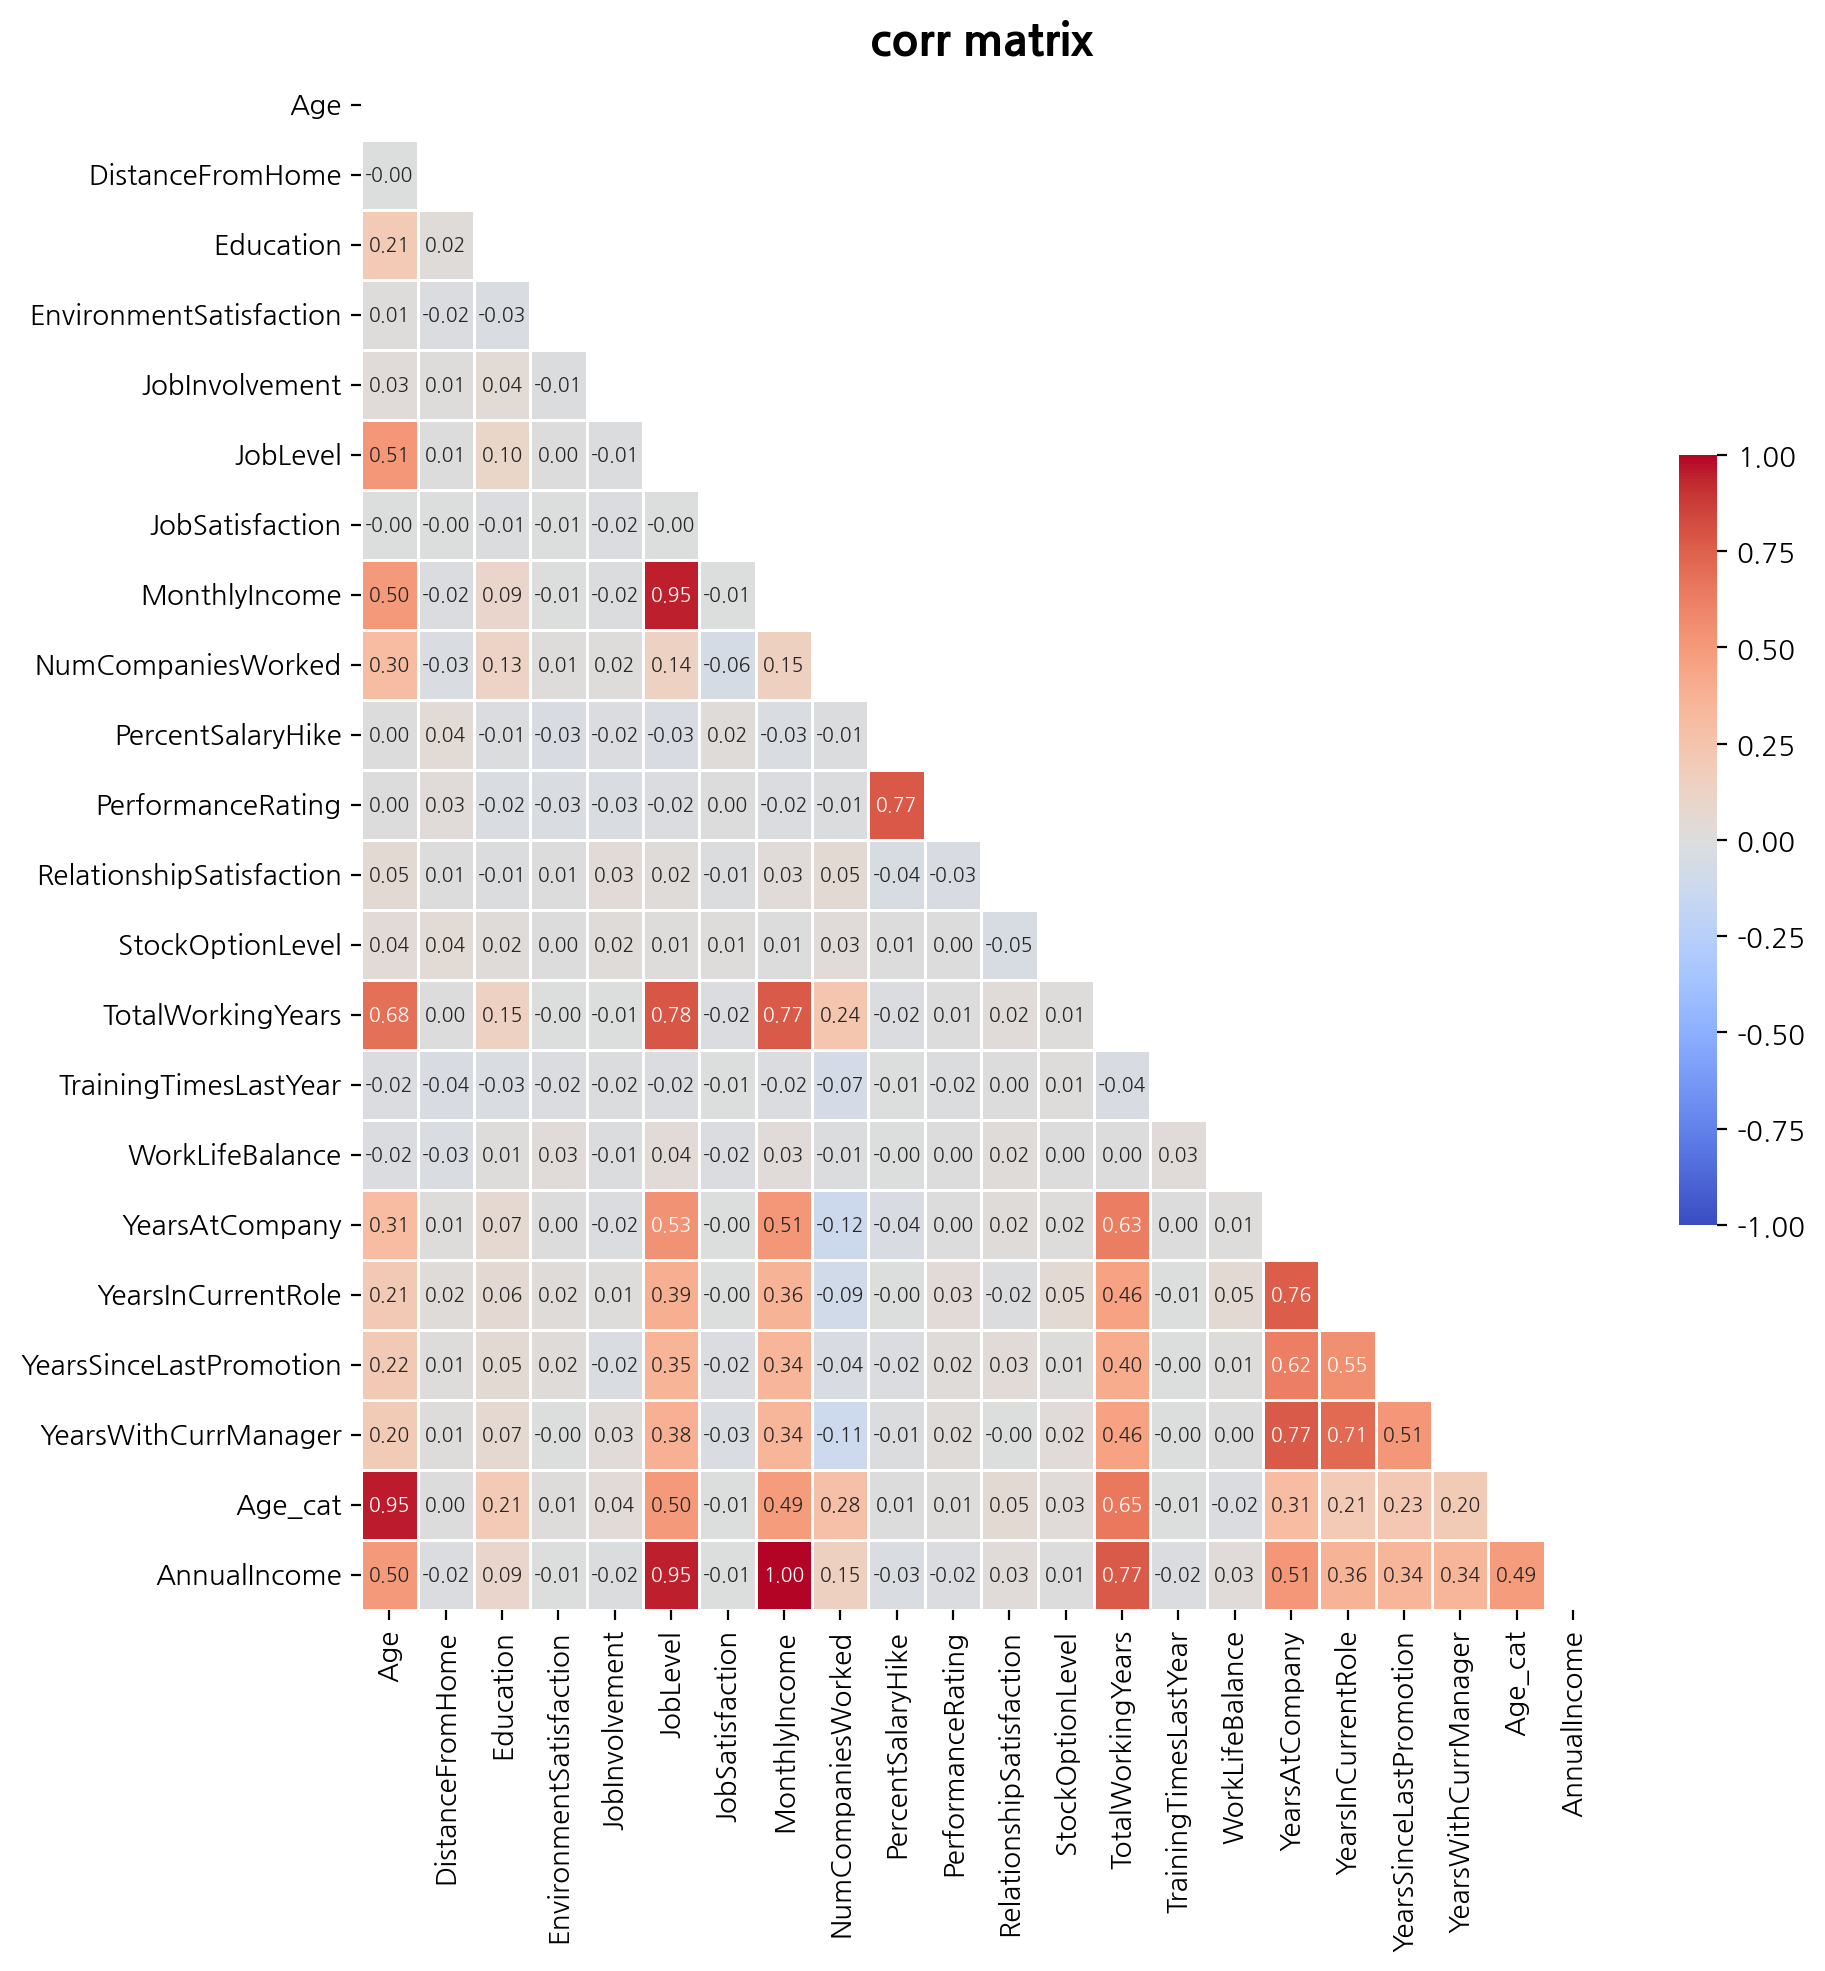

In [55]:
# 상관관계 히트맵
corr = df_raw.corr()
fig, ax = plt.subplots(figsize=(10,10))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'coolwarm', 
            annot = True,   # 실제 값을 표시한다
            annot_kws={'size' : 7}, # 숫자 출력 시 숫자 크기 조절
            fmt = '.2f',    # annot 소수점 2자리까지
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.title('corr matrix', fontweight="bold", fontsize=16)
plt.show()

# 분석 주제1. 경력에 따른 퇴사 여부
주요 컬럼 : `JobLevel`, `TotalWorkingYears`, `YearsAtCompany`, `YesrsInCurrentRole`

## 연차별 퇴사 비율

In [56]:
# 5년마다 TotalWorkingYears 나누기

df_raw['TotalWorkingYears_Group'] = pd.cut(df_raw['TotalWorkingYears'], bins=range(0, df_raw['TotalWorkingYears'].max()+6, 5), right=False)
df_raw[['TotalWorkingYears', 'TotalWorkingYears_Group']].head()

TotalWorkingYears TotalWorkingYears_Group
EmployeeNumber                                           
1                               8                 [5, 10)
2                              10                [10, 15)
4                               7                 [5, 10)
5                               8                 [5, 10)
7                               6                 [5, 10)

[Text(0, 0, '0~4년차'),
 Text(1, 0, '5~9년차'),
 Text(2, 0, '10~14년차'),
 Text(3, 0, '15~19년차'),
 Text(4, 0, '20~24년차'),
 Text(5, 0, '25~29년차'),
 Text(6, 0, '30~34년차'),
 Text(7, 0, '35~39년차'),
 Text(8, 0, '40~44년차')]

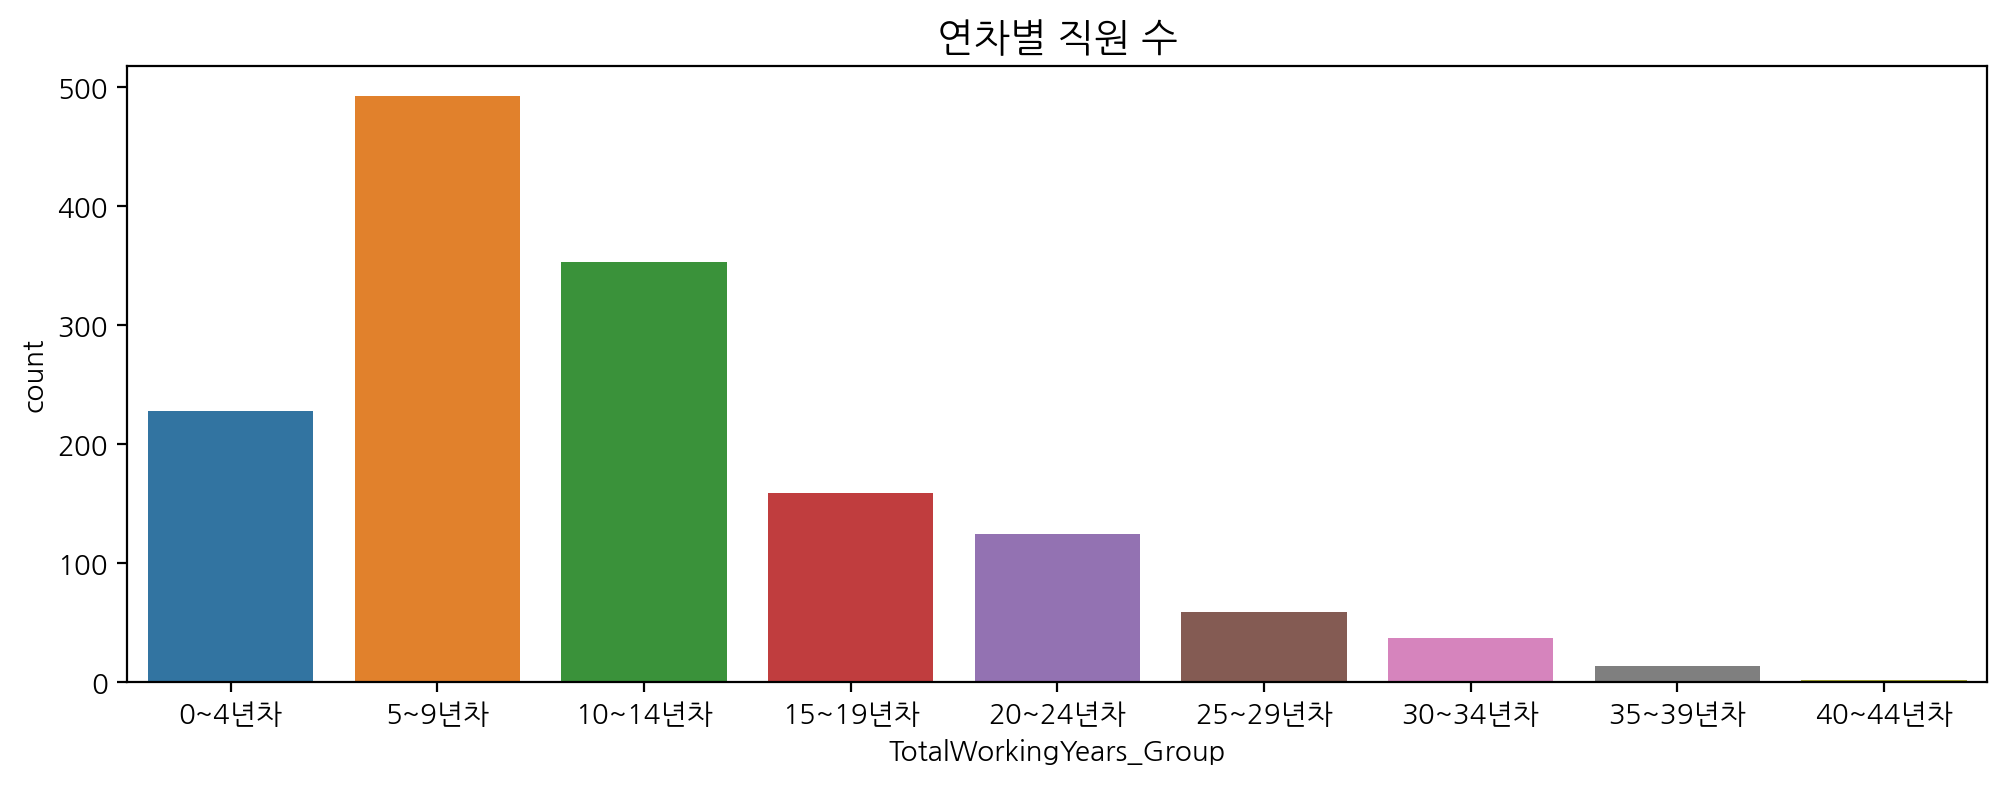

In [57]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df_raw, x='TotalWorkingYears_Group')
ax.set_title('연차별 직원 수', fontsize=14)
ax.set_xticklabels(['0~4년차','5~9년차','10~14년차', '15~19년차', '20~24년차', '25~29년차', '30~34년차', '35~39년차', '40~44년차'])

In [58]:
def attrition_ratio_yes(data, column):
    """
    입력된 데이터프레임에서 col 열의 각 값에 대한 attrition 'yes' 비율을 계산하여 데이터프레임으로 반환하는 함수
    data: 분석할 데이터프레임
    column: 분석할 열 이름
    """
    grouped = data.groupby([column, 'Attrition'])
    result = pd.DataFrame(grouped.size().unstack())
    result.columns = ['no', 'yes']
    result['ratio'] = result['yes'] / (result['no'] + result['yes'])
    return result

In [59]:
# 연차별 퇴사비율

twy_group_attr_ratio = attrition_ratio_yes(df_raw, 'TotalWorkingYears_Group')
twy_group_attr_ratio

no  yes     ratio
TotalWorkingYears_Group                    
[0, 5)                   153   75  0.328947
[5, 10)                  411   82  0.166329
[10, 15)                 309   44  0.124646
[15, 20)                 141   18  0.113208
[20, 25)                 115   10  0.080000
[25, 30)                  56    3  0.050847
[30, 35)                  34    3  0.081081
[35, 40)                  14    0  0.000000
[40, 45)                   0    2  1.000000

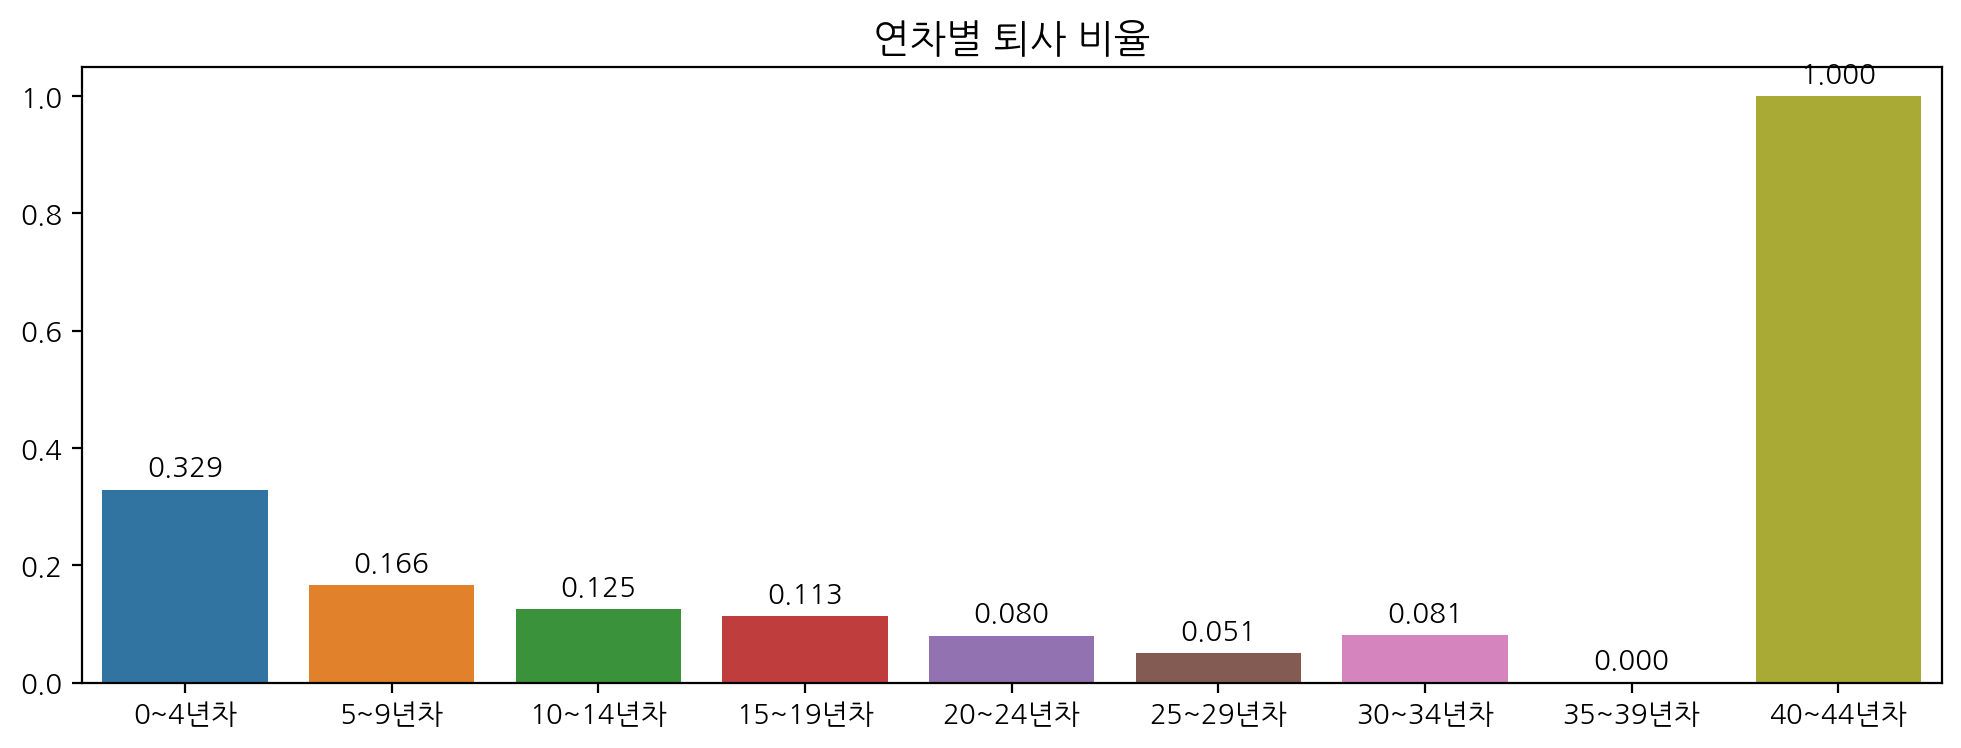

In [60]:
# 연차별 퇴사 수
df_exp_attr = df_raw.groupby('TotalWorkingYears_Group').agg({"Attrition":"value_counts"})

# TotalWorkingYears 그룹별 퇴사비율
attr_dict = {'0~4년차': (df_exp_attr.iloc[1,:] / (df_exp_attr.iloc[0,:] + df_exp_attr.iloc[1,:])),
             '5~9년차': (df_exp_attr.iloc[3,:] / (df_exp_attr.iloc[2,:] + df_exp_attr.iloc[3,:])),             
             '10~14년차': (df_exp_attr.iloc[5,:] / (df_exp_attr.iloc[4,:] + df_exp_attr.iloc[5,:])),
             '15~19년차': (df_exp_attr.iloc[7,:] / (df_exp_attr.iloc[6,:] + df_exp_attr.iloc[7,:])),
             '20~24년차': (df_exp_attr.iloc[9,:] / (df_exp_attr.iloc[8,:] + df_exp_attr.iloc[9,:])),
             '25~29년차': (df_exp_attr.iloc[11,:] / (df_exp_attr.iloc[10,:] + df_exp_attr.iloc[11,:])),
             '30~34년차': (df_exp_attr.iloc[13,:] / (df_exp_attr.iloc[12,:] + df_exp_attr.iloc[13,:])),
             '35~39년차': 0,
             '40~44년차': 1}

# 데이터프레임으로 만들기
df_attr_ratio = pd.DataFrame(attr_dict)

# 시각화
plt.figure(figsize=(12,4))
ax = sns.barplot(df_attr_ratio)
ax.set_title('연차별 퇴사 비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

## 저연차에 퇴사를 많이 하는 이유 찾기

In [61]:
# 저연차만 추출한 데이터프레임 만들기
df_under4 = df_raw[df_raw['TotalWorkingYears'] <= 4]
df_under4.head(2)

Age Attrition BusinessTravel              Department  \
EmployeeNumber                                                         
11               30        No  Travel_Rarely  Research & Development   
18               34        No  Travel_Rarely  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
11                            24          1  Life Sciences   
18                            19          2        Medical   

                EnvironmentSatisfaction Gender  JobInvolvement  JobLevel  \
EmployeeNumber                                                             
11                                    4   Male               3         1   
18                                    2   Male               3         1   

                              JobRole  JobSatisfaction MaritalStatus  \
EmployeeNumber                                                         
11              Laboratory Technician                3      Divorced   
18              Laboratory Technician                4      Divorced   

                MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
EmployeeNumber                                                                  
11                       2693                   1       No                 22   
18                       2661                   0       No                 11   

                PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
EmployeeNumber                                                                  
11                              4                         2                 1   
18                              3                         3                 1   

                TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
EmployeeNumber                                                              
11                              1                      2                3   
18                              3                      2                3   

                YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                                
11                           1                   0                        0   
18                           2                   2                        1   

                YearsWithCurrManager  Age_cat Experienced  AnnualIncome  \
EmployeeNumber                                                            
11                                 0       30          No         32316   
18                                 2       30          No         31932   

               TotalWorkingYears_Group  
EmployeeNumber                          
11                              [0, 5)  
18                              [0, 5)

In [62]:
# 저연차 여부를 구분하는 컬럼 생성
df_raw['저연차여부'] = ['4년차이하' if x <= 4 else '4년차초과' for x in df_raw['TotalWorkingYears']]
df_raw['저연차여부']

EmployeeNumber
1       4년차초과
2       4년차초과
4       4년차초과
5       4년차초과
7       4년차초과
        ...  
2061    4년차초과
2062    4년차초과
2064    4년차초과
2065    4년차초과
2068    4년차초과
Name: 저연차여부, Length: 1470, dtype: object

In [136]:
# 저연차의 만족도 비교
df_raw.groupby('저연차여부').agg({'EnvironmentSatisfaction':'value_counts',
                             'JobSatisfaction':'value_counts',
                             'RelationshipSatisfaction':'value_counts'}).sort_index()

EnvironmentSatisfaction  JobSatisfaction  RelationshipSatisfaction
저연차여부                                                                      
4년차이하 1                       38               34                        40
      2                       35               54                        43
      3                       78               67                        82
      4                       77               73                        63
4년차초과 1                      246              255                       236
      2                      252              226                       260
      3                      375              375                       377
      4                      369              386                       369

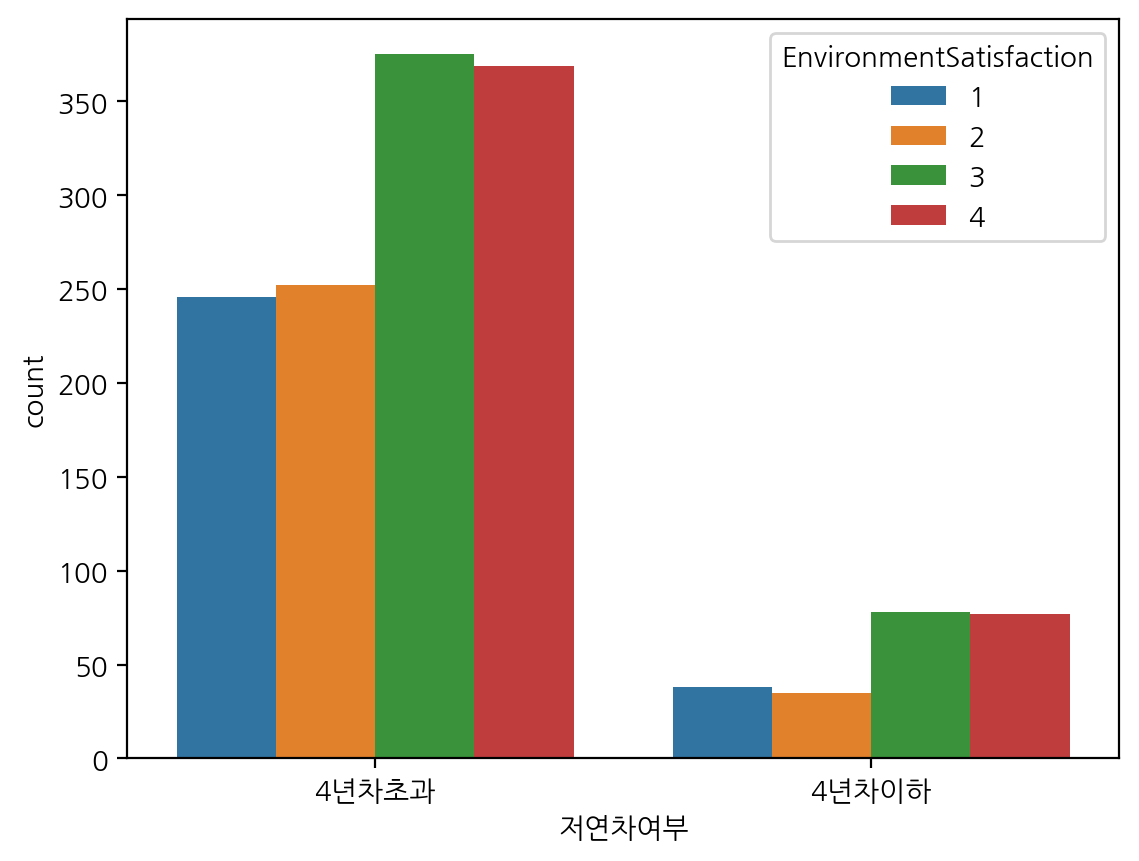

In [142]:
sns.countplot(data=df_raw, x='저연차여부', hue='EnvironmentSatisfaction')
plt.show()

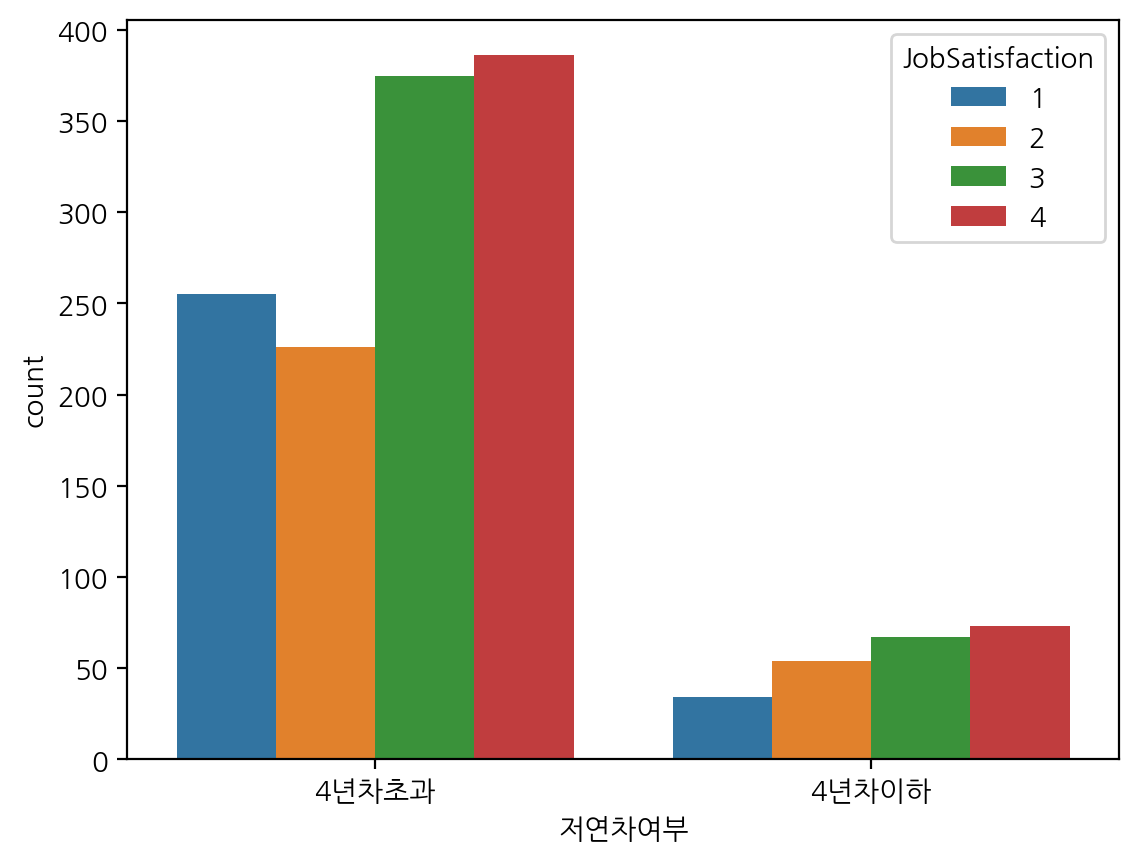

4년차 이하 JobSatisfaction 1, 2 비율 :  0.38596491228070173
4년차 초과 JobSatisfaction 1, 2 비율 :  0.38727858293075684


In [139]:
# 4년차 이하 직원들이 직무 만족도에서 낮은 점수를 주는 비율이 더 높음
sns.countplot(data=df_raw, x='저연차여부', hue='JobSatisfaction')
plt.show()

print('4년차 이하 JobSatisfaction 1, 2 비율 : ', (34+54) / (34+54+67+73))
print('4년차 초과 JobSatisfaction 1, 2 비율 : ', (255+226) / (255+226+375+386))

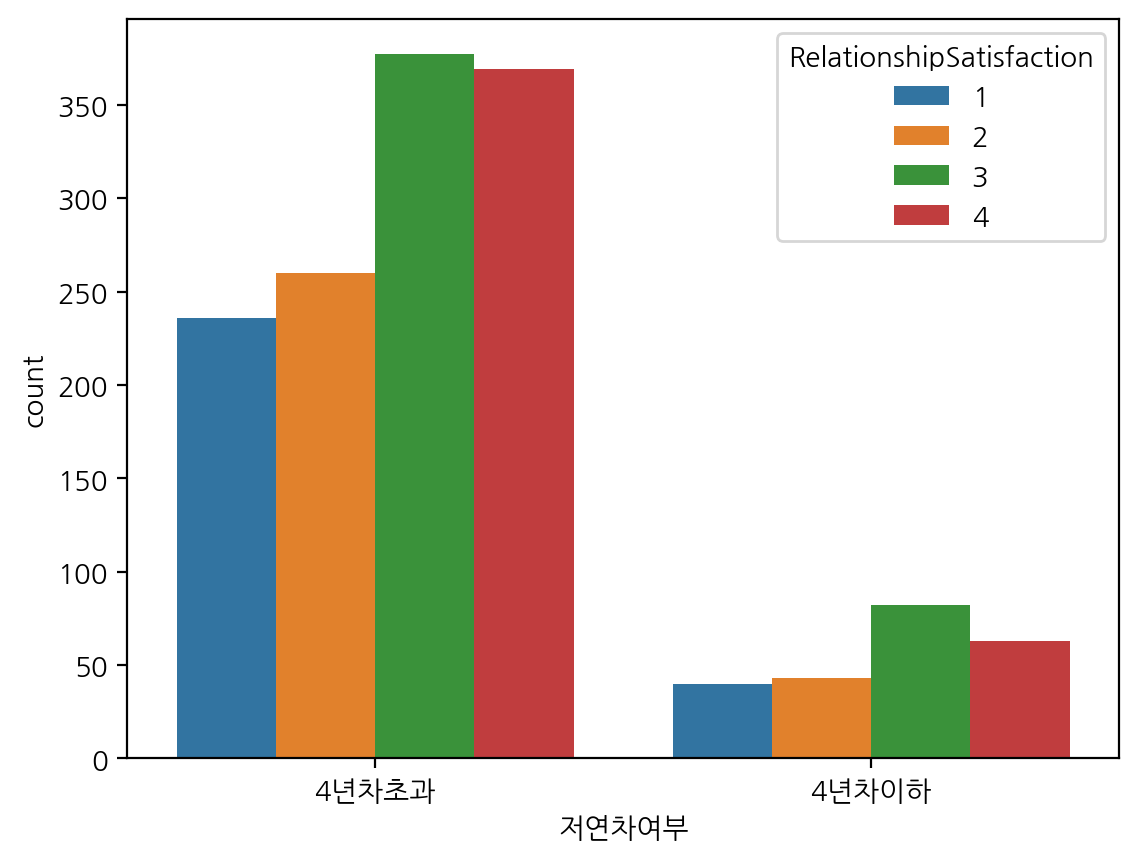

4년차 이하 RelationshipSatisfaction 1, 2 비율 :  0.36403508771929827
4년차 초과 RelationshipSatisfaction 1, 2 비율 :  0.3993558776167472


In [141]:
# 4년차 이하 직원들이 인간관계 만족도에서 낮은 점수를 주는 비율이 더 높음
sns.countplot(data=df_raw, x='저연차여부', hue='RelationshipSatisfaction')
plt.show()

print('4년차 이하 RelationshipSatisfaction 1, 2 비율 : ', (40+43) / (40+43+82+63))
print('4년차 초과 RelationshipSatisfaction 1, 2 비율 : ', (236+260) / (236+260+377+369))

**저연차인 사람들의 직무 만족도가 낮은 응답비율이 높음. 왜 그럴까?**

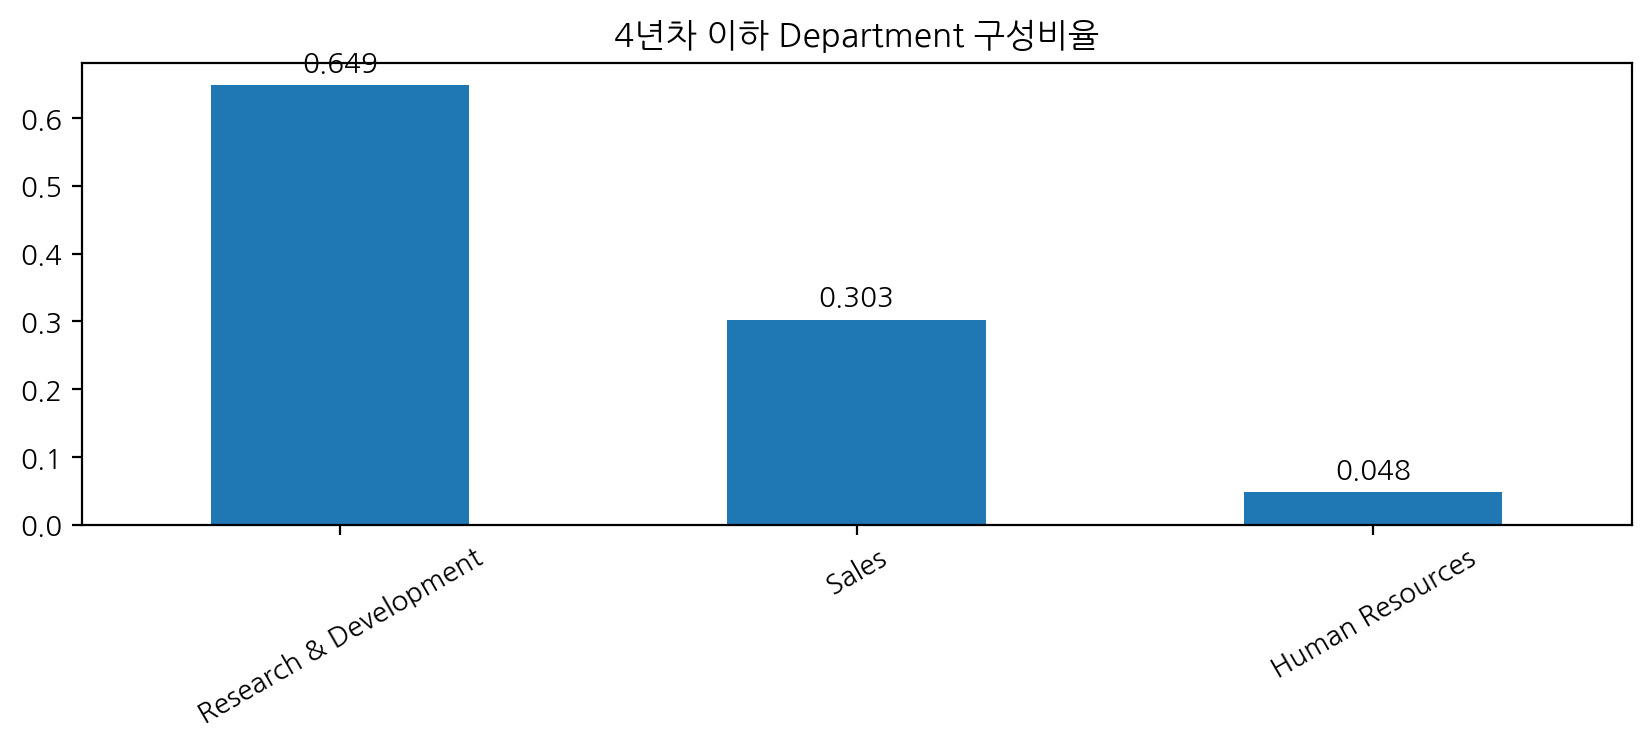

In [67]:
# 저연차의 Department 구성비율

ax = df_raw.loc[df_raw['TotalWorkingYears'] <= 4, 'Department'].value_counts(1).sort_values(ascending=False).plot.bar(figsize=(10,3), rot=30)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)
plt.title('4년차 이하 Department 구성비율')
plt.show()

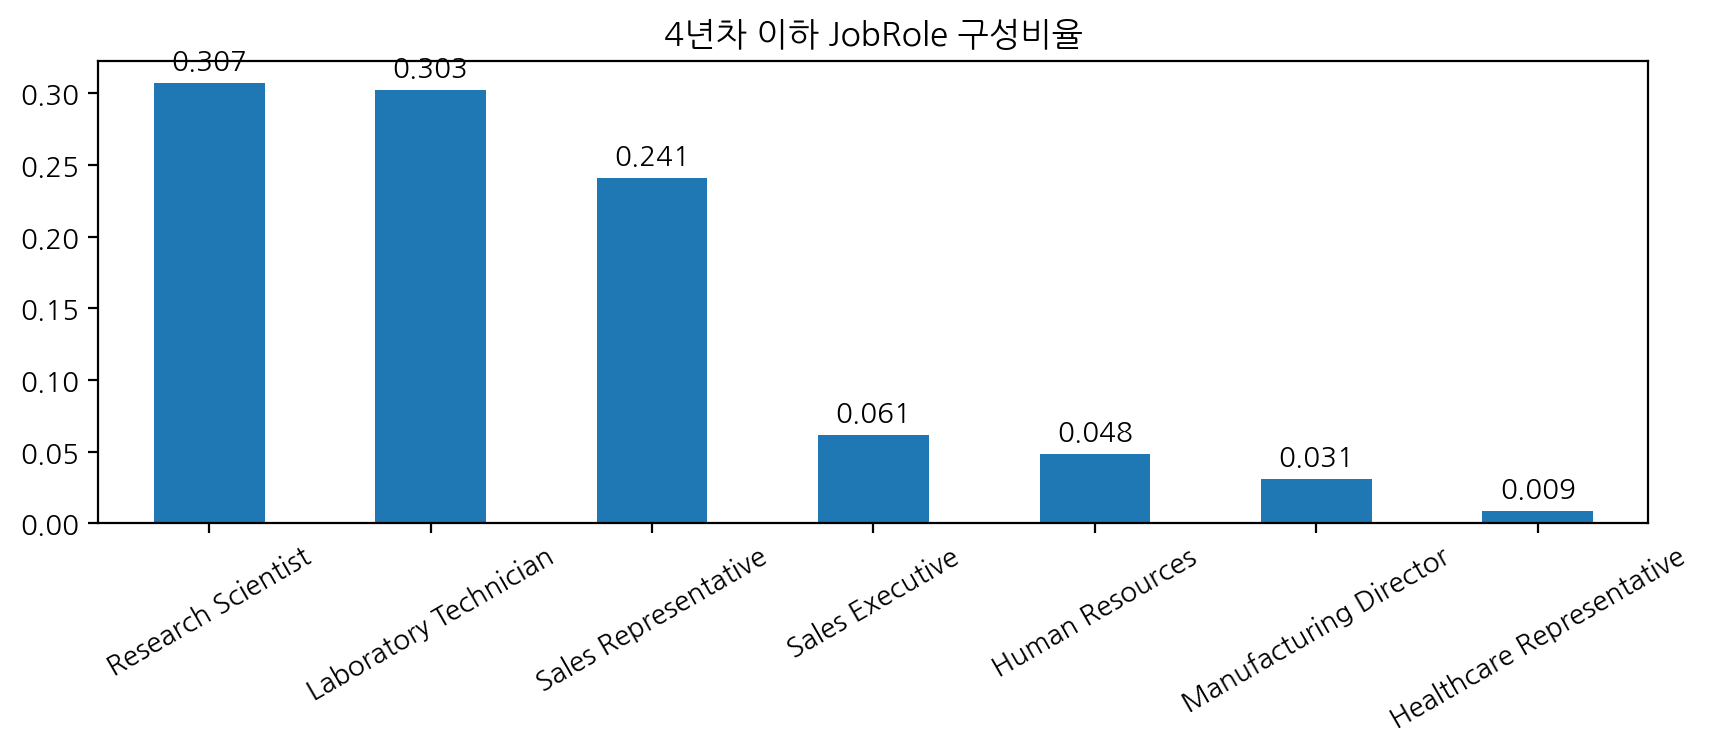

In [68]:
# 저연차의 JobRole 비율

ax = df_raw.loc[df_raw['TotalWorkingYears'] <= 4, 'JobRole'].value_counts(1).sort_values(ascending=False).plot.bar(figsize=(10,3), rot=30)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)
plt.title('4년차 이하 JobRole 구성비율')
plt.show()

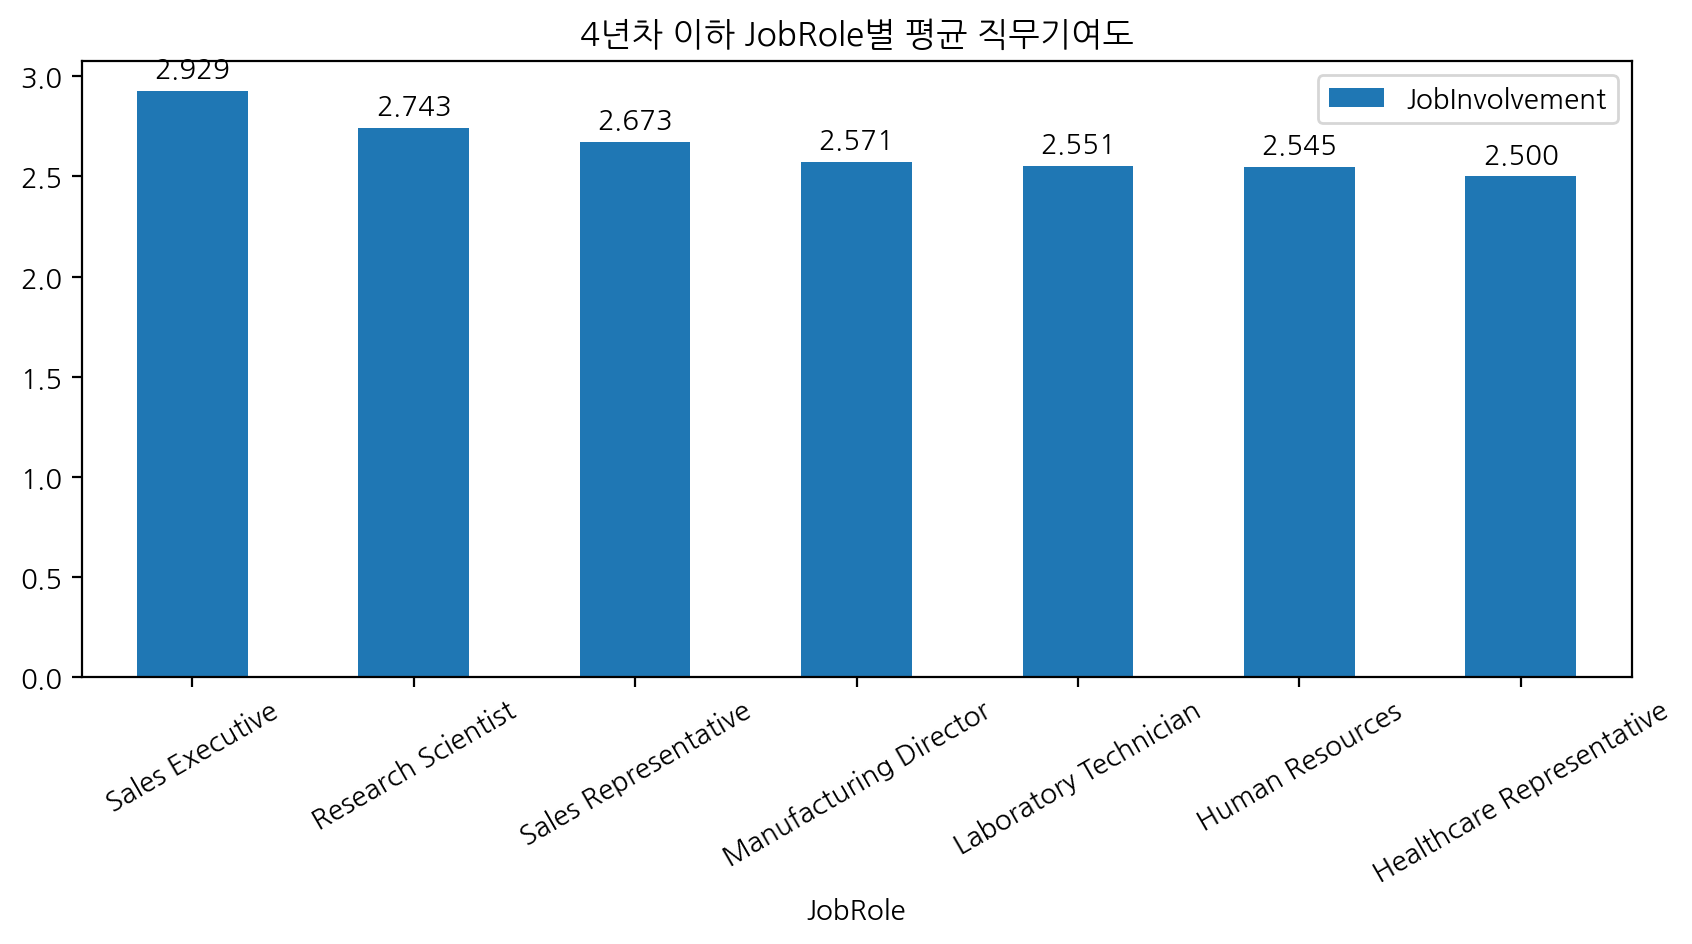

In [69]:
# 저연차의 JobRole에 따른 평균 직무기여도 비교
# HR 부서의 평균 만족도가 가장 낮음
ax = df_raw[df_raw['TotalWorkingYears'] <= 4].groupby('JobRole').agg({'JobInvolvement':'mean'}).sort_values(by='JobInvolvement', ascending=False).plot.bar(figsize=(10,4), rot=30)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)
plt.title('4년차 이하 JobRole별 평균 직무기여도')
plt.show()

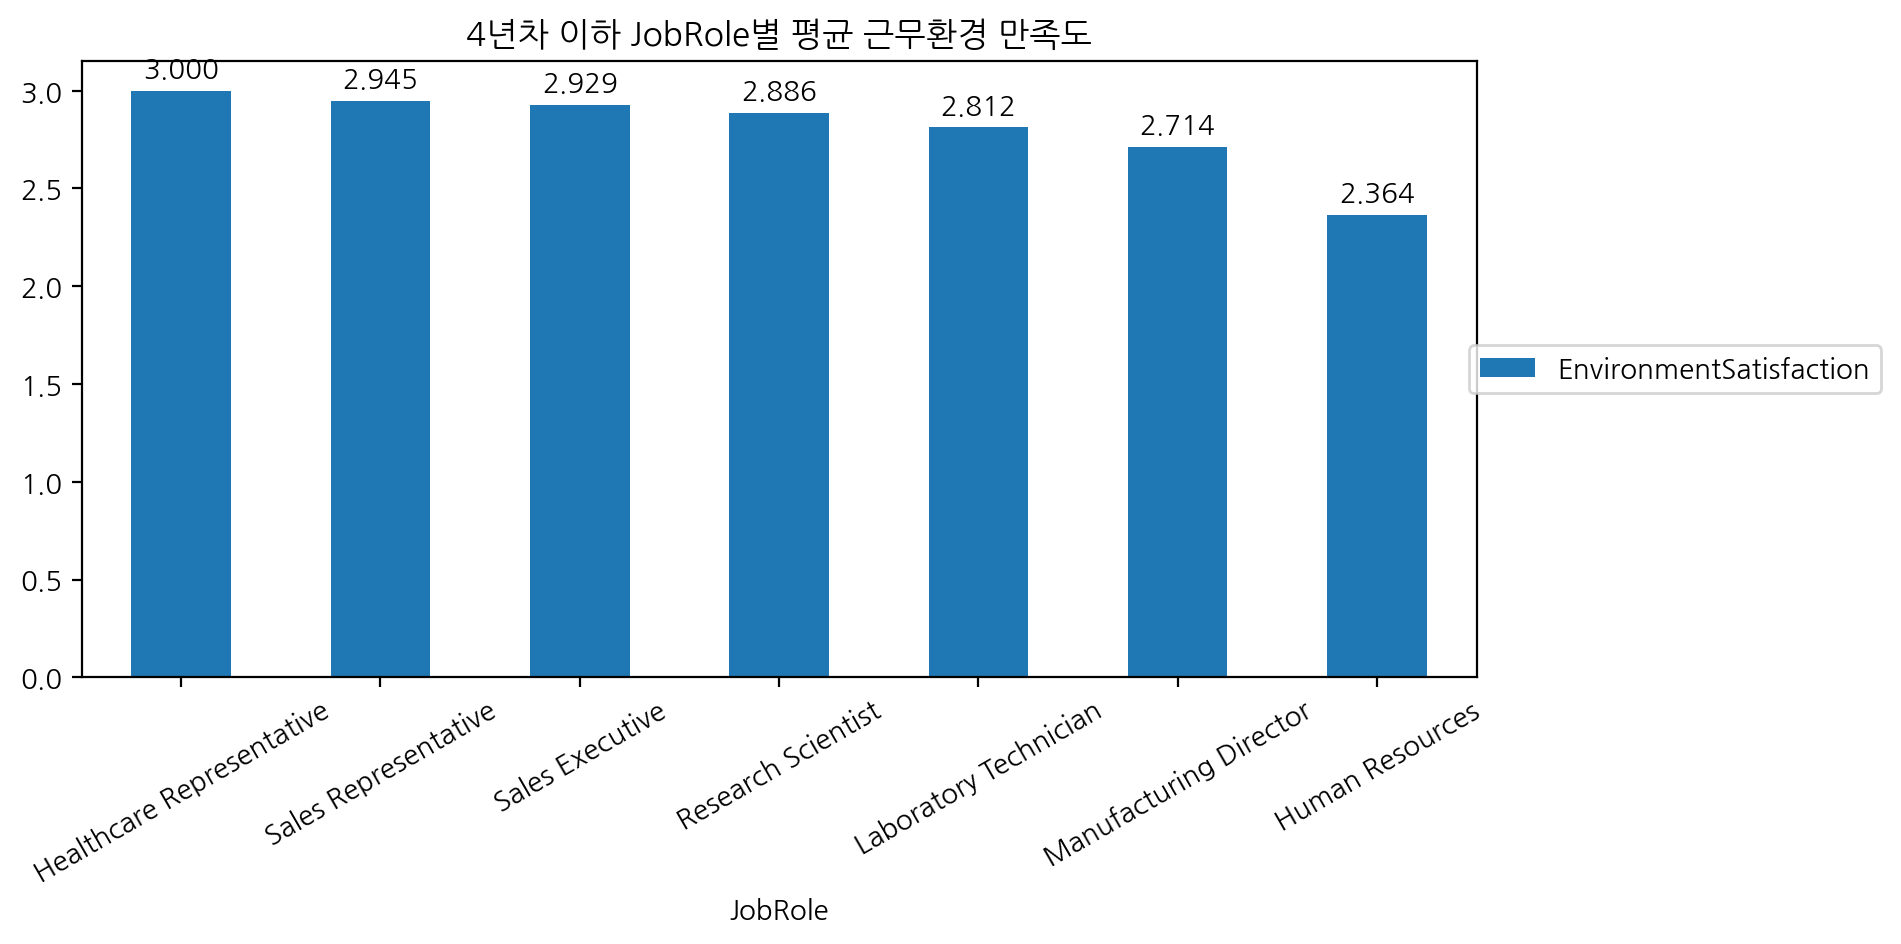

In [70]:
# 저연차의 JobRole에 따른 평균 근무환경만족도 비교
# HR 부서의 평균 만족도가 가장 낮음
ax = df_raw[df_raw['TotalWorkingYears'] <= 4].groupby('JobRole').agg({'EnvironmentSatisfaction':'mean'}).sort_values(by='EnvironmentSatisfaction', ascending=False).plot.bar(figsize=(10,4), rot=30)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)
plt.title('4년차 이하 JobRole별 평균 근무환경 만족도')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

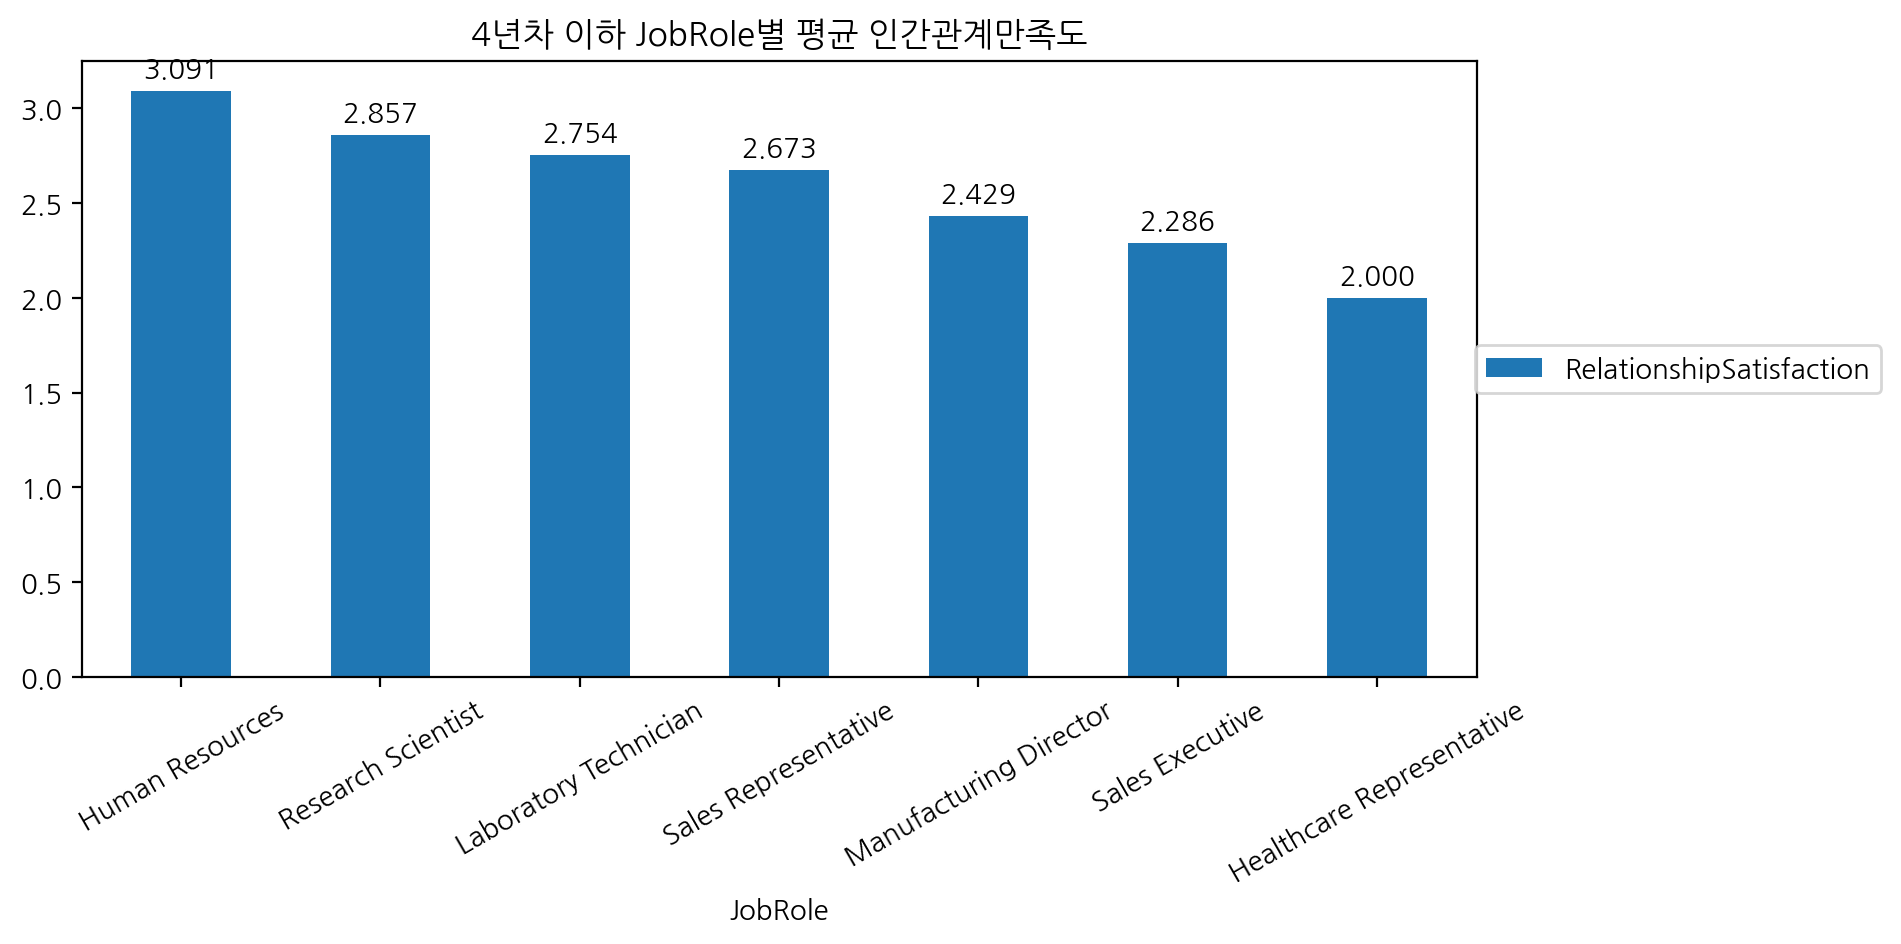

In [71]:
# 저연차의 JobRole에 따른 평균 인간관계만족도 비교
# HR 부서의 평균 만족도가 가장 낮음
ax = df_raw[df_raw['TotalWorkingYears'] <= 4].groupby('JobRole').agg({'RelationshipSatisfaction':'mean'}).sort_values(by='RelationshipSatisfaction', ascending=False).plot.bar(figsize=(10,4), rot=30)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)
plt.title('4년차 이하 JobRole별 평균 인간관계만족도')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

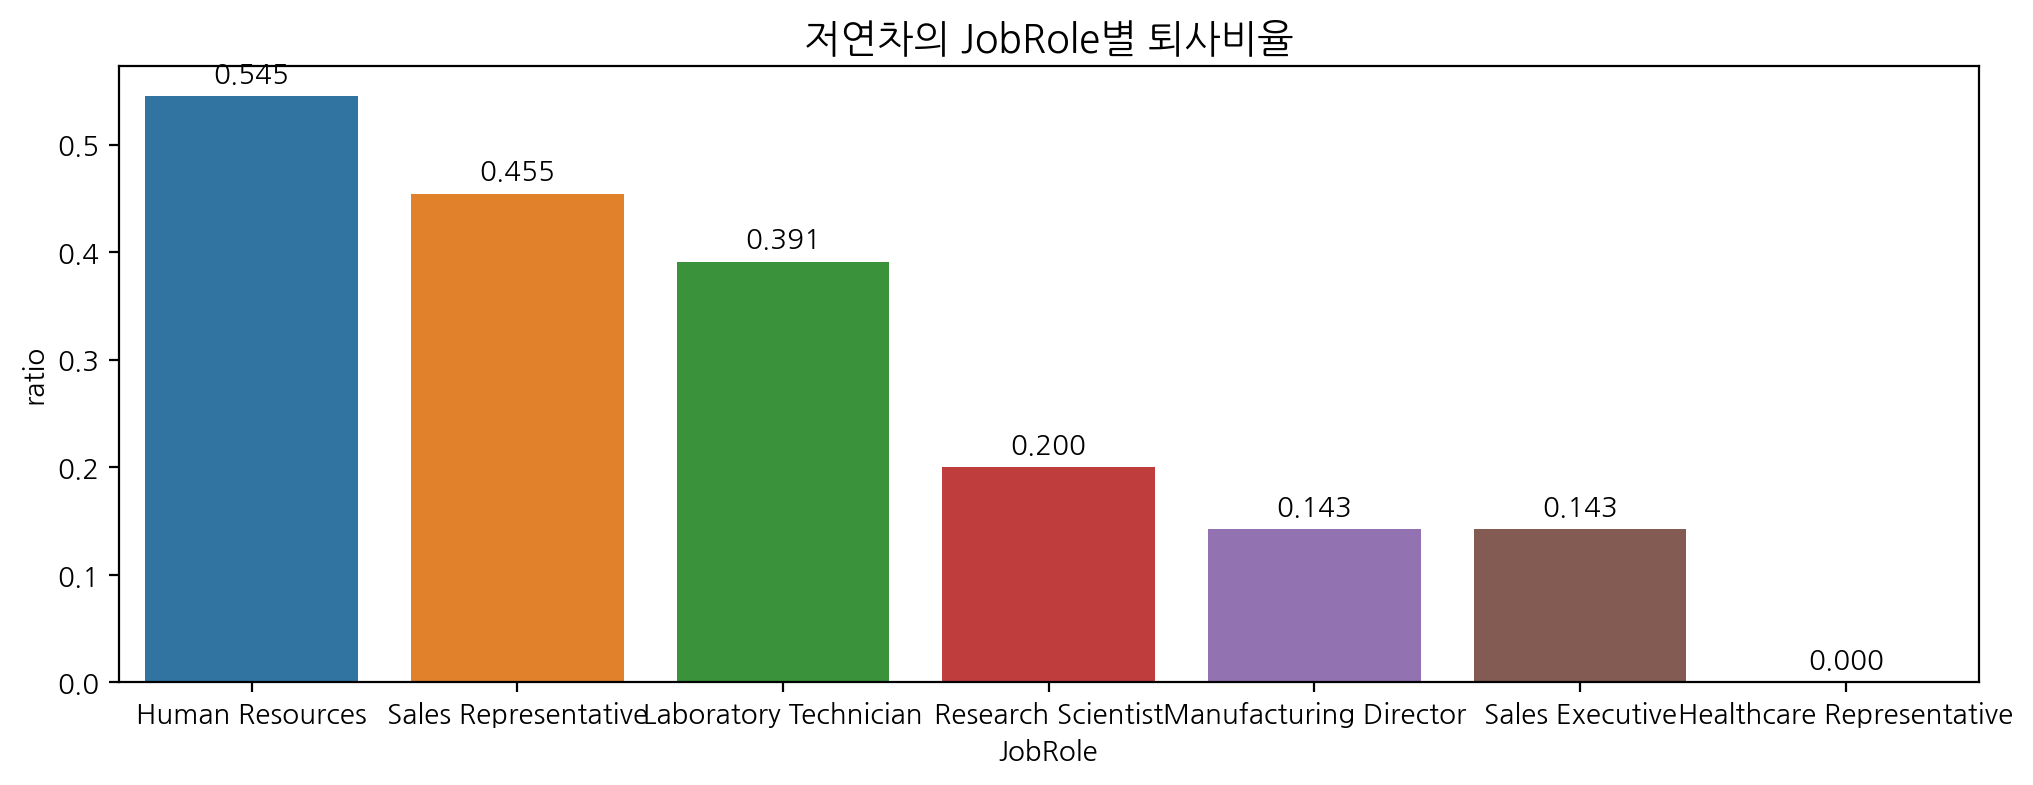

In [72]:
# 저연차의 JobRole별 퇴사비율
df_jr_attr_ratio = attrition_ratio_yes(df_under4, 'JobRole').fillna(0).sort_values(by='ratio', ascending=False)

# 시각화
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df_jr_attr_ratio, x=df_jr_attr_ratio.index, y='ratio')
ax.set_title('저연차의 JobRole별 퇴사비율', fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)
plt.show()

In [145]:
df_under4['JobRole'].value_counts()

Research Scientist           70
Laboratory Technician        69
Sales Representative         55
Sales Executive              14
Human Resources              11
Manufacturing Director        7
Healthcare Representative     2
Name: JobRole, dtype: int64

In [74]:
# 저연차 JobRole별 joblevel 분포

df_under4.groupby('JobRole').agg({'JobLevel':'value_counts'})

JobLevel
JobRole                   JobLevel          
Healthcare Representative 2                2
Human Resources           1               11
Laboratory Technician     1               69
Manufacturing Director    2                7
Research Scientist        1               70
Sales Executive           2               14
Sales Representative      1               55

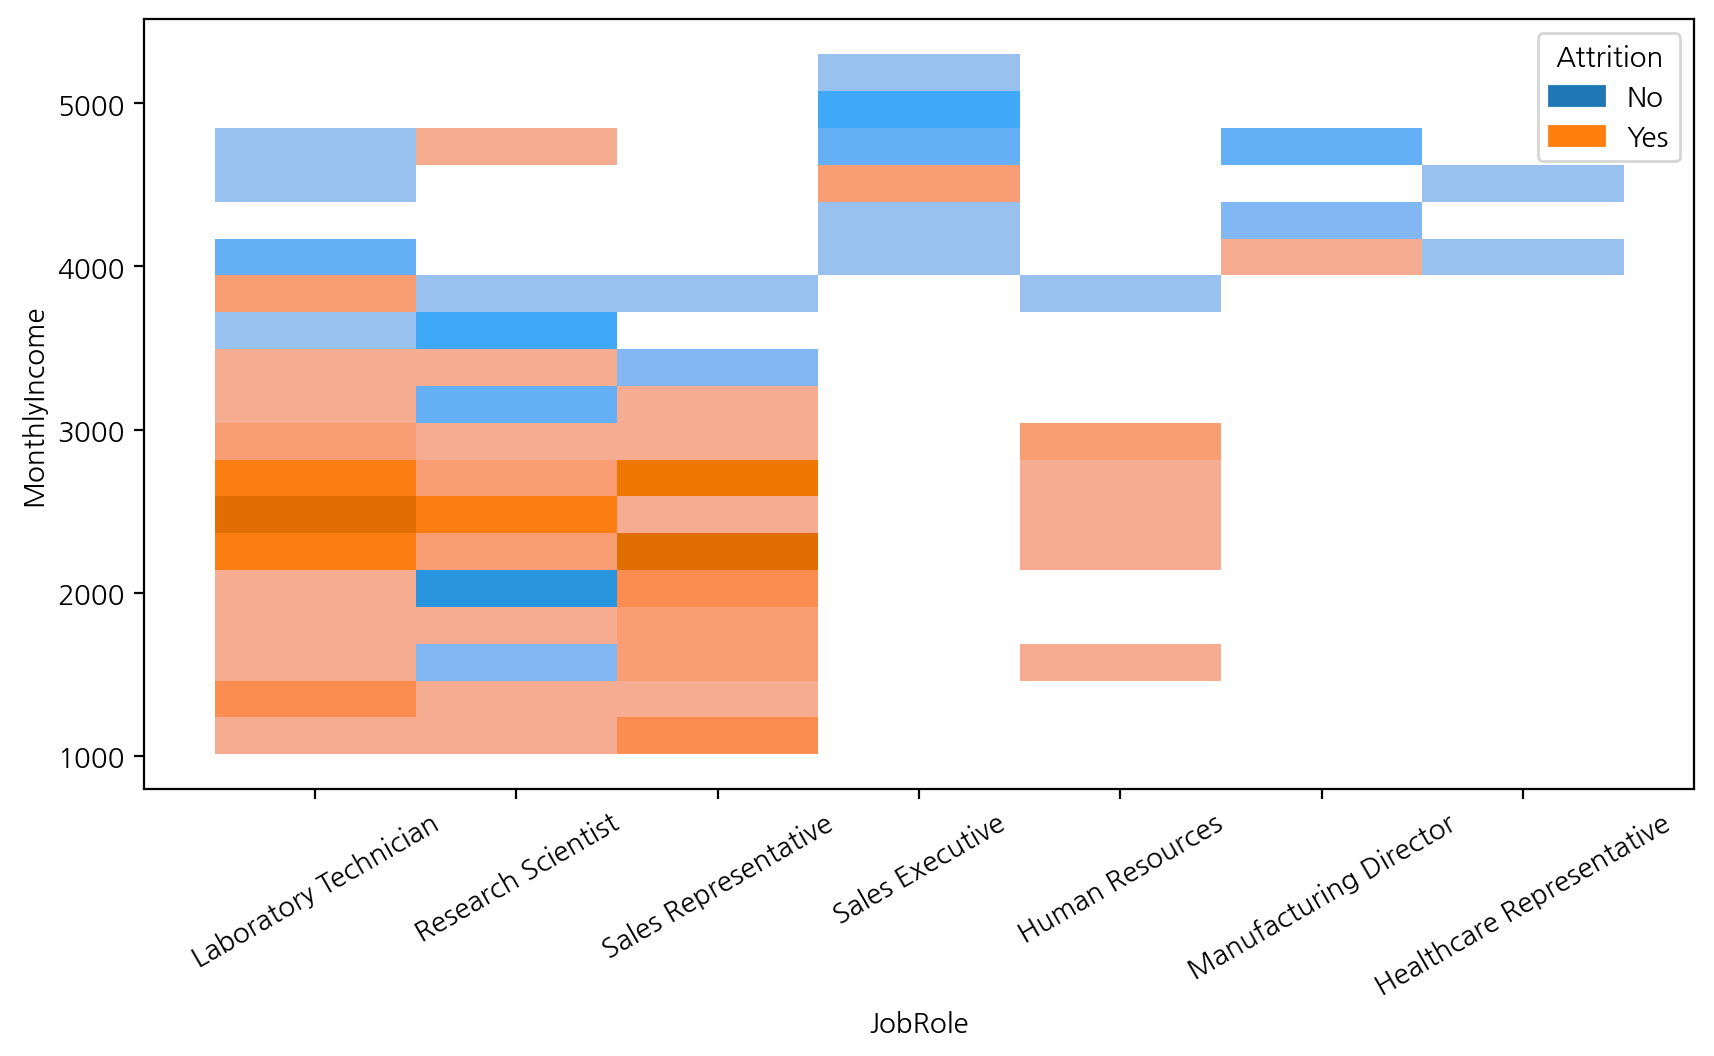

In [146]:
# 저연차 JobRole별로 월급의 편차가 심한지
plt.figure(figsize=(10,5))
sns.histplot(data=df_under4, x='JobRole', y='MonthlyIncome', hue='Attrition')
plt.xticks(rotation=30)
plt.show()

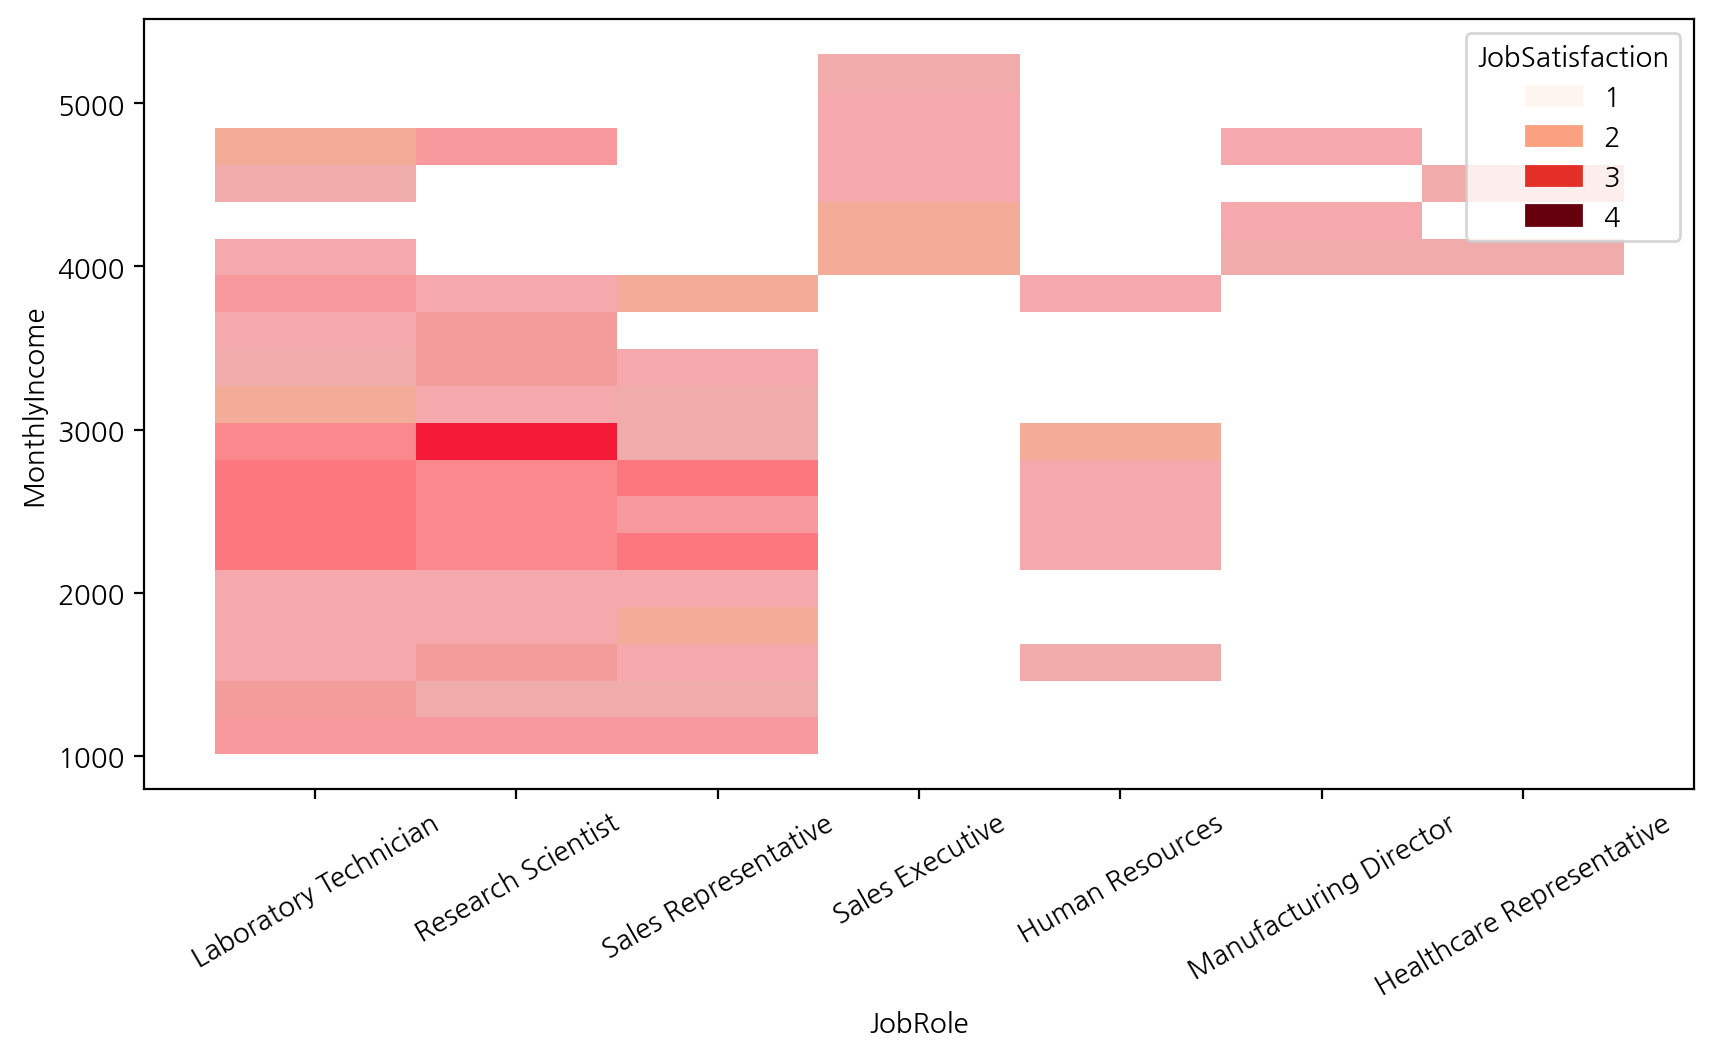

In [150]:
# 저연차 JobRole별로 월급 분포와 직무만족도
# 월급을 중간보다 적게 받거나, 많이 받는 경우 직무 만족도가 떨어짐
# 퇴사가 많이 일어난 구간에 직무 만족도가 높게 나온다? why?
plt.figure(figsize=(10,5))
sns.histplot(data=df_under4, x='JobRole', y='MonthlyIncome', hue='JobSatisfaction', palette='Reds')
plt.xticks(rotation=30)
plt.show()

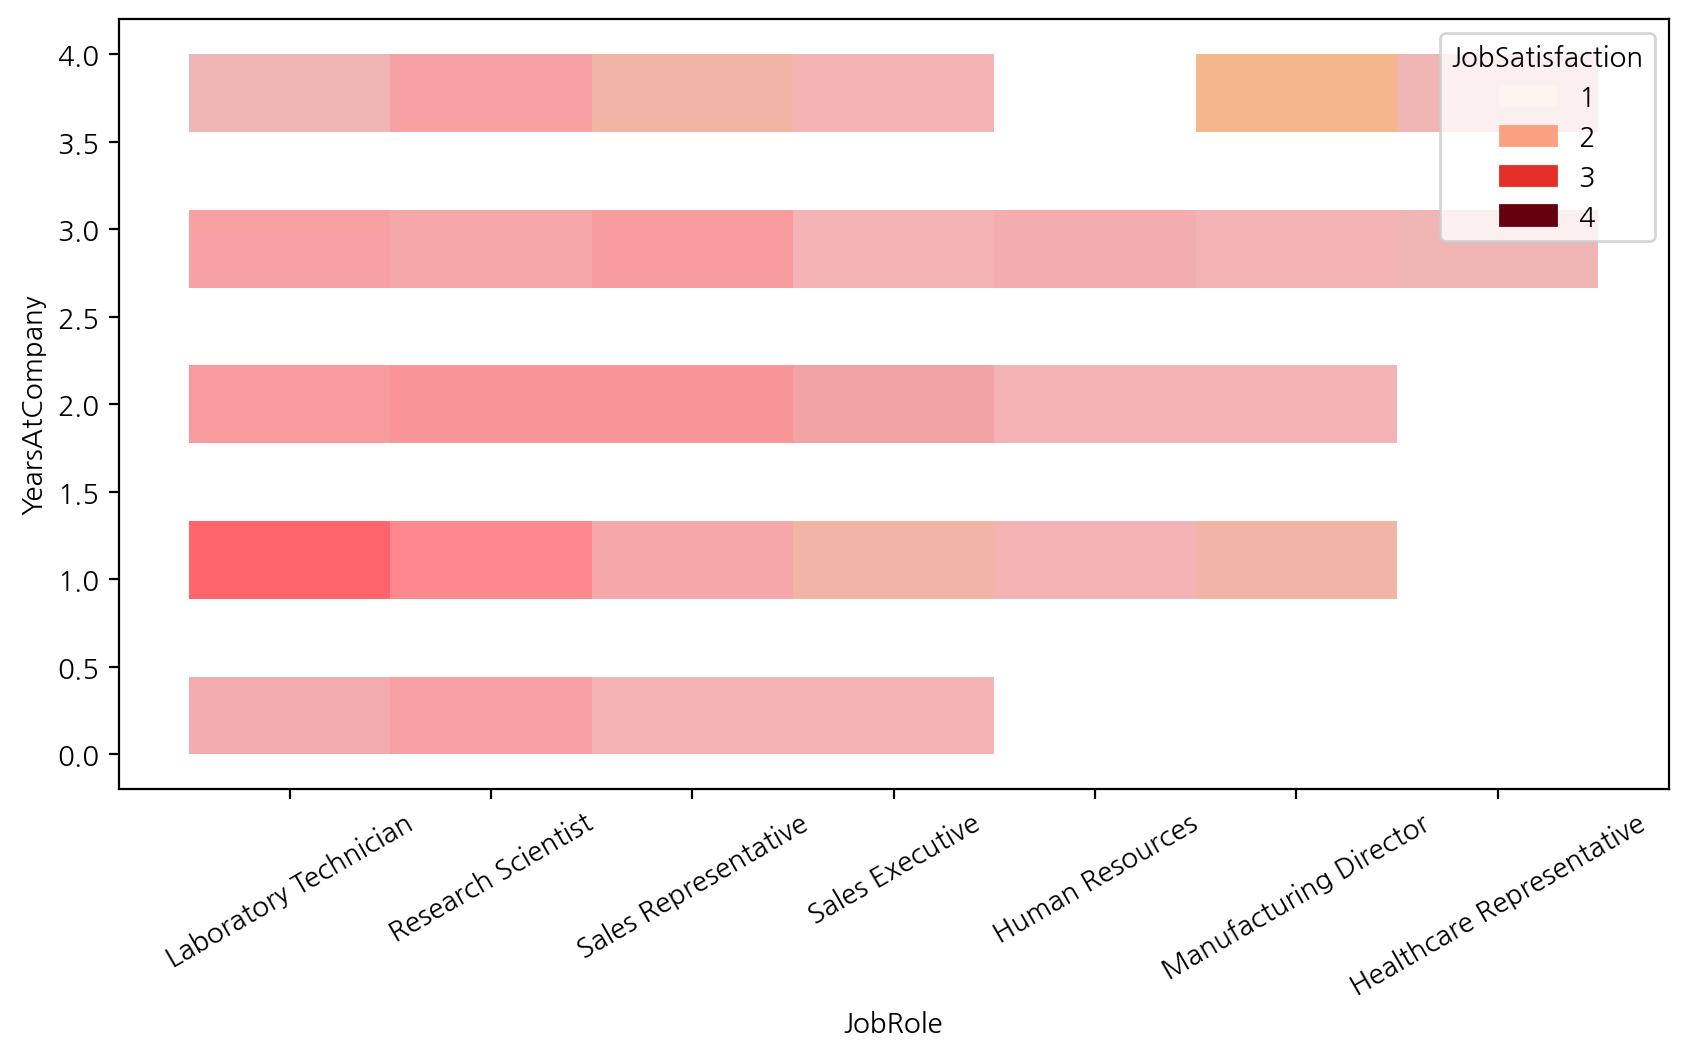

In [153]:
# 저연차 JobRole별로 본 회사의 근무 기간에 따른 직무 만족도
# Sales Representative의 경우 근무 기간이 오래될 때 직무 만족도가 오히려 떨어짐 -> 연차에 따른 적절한 업무 분담 x?
plt.figure(figsize=(10,5))
sns.histplot(data=df_under4, x='JobRole', y='YearsAtCompany', hue='JobSatisfaction', palette='Reds')
plt.xticks(rotation=30)
plt.show()

In [76]:
# Laboratory Technician, Research Scientist, Sales Representative : 평균 월급 하위권

df_under4.groupby('JobRole').agg({'MonthlyIncome':'mean'}).sort_values(by='MonthlyIncome', ascending=False)

MonthlyIncome
JobRole                                 
Sales Executive              4684.928571
Manufacturing Director       4464.000000
Healthcare Representative    4326.000000
Human Resources              2645.727273
Laboratory Technician        2583.855072
Research Scientist           2564.614286
Sales Representative         2362.600000

array([[<AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'TotalWorkingYears'}>],
       [<AxesSubplot: title={'center': 'YearsAtCompany'}>,
        <AxesSubplot: >]], dtype=object)

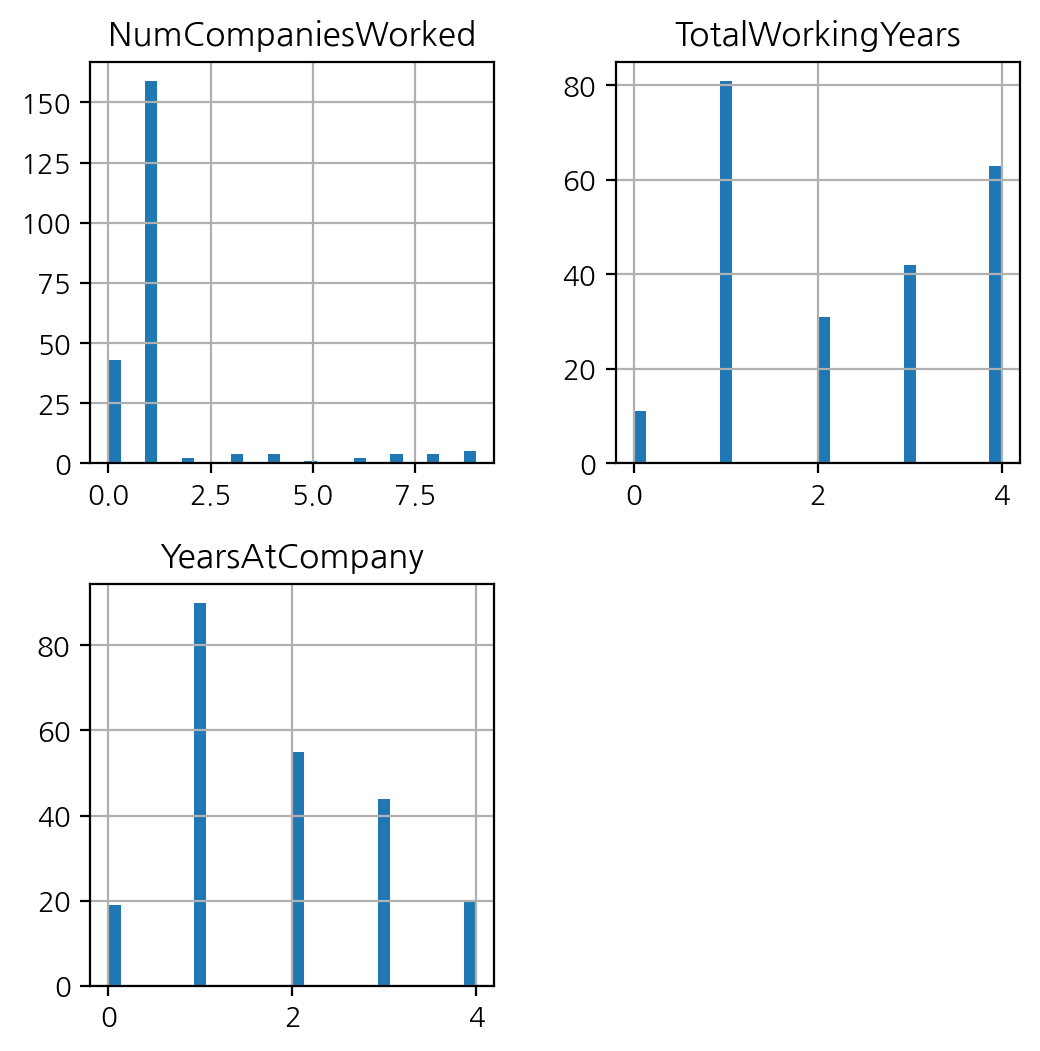

In [79]:
df_under4[['NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany']].hist(bins=30, figsize=(6,6))

## joblevel에 따른 퇴사 비율

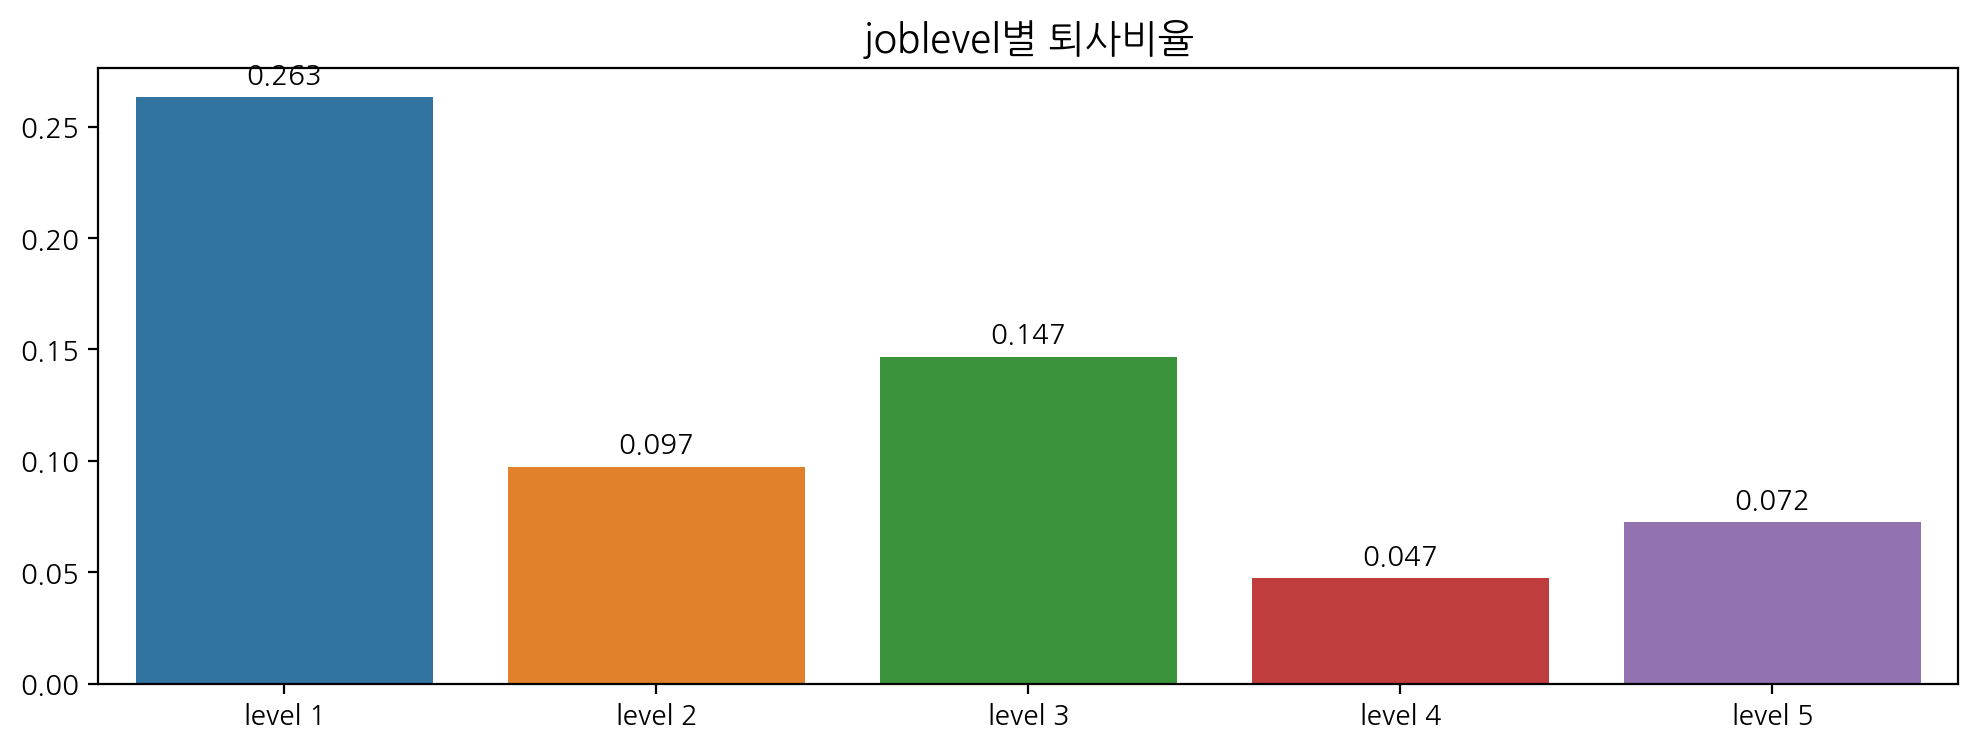

In [81]:
# joblevel에 따른 퇴사 여부

df_jl_attr = df_raw.groupby('JobLevel').agg({'Attrition':'value_counts'})
attr_jl_dict = {'level 1': (df_jl_attr.iloc[1,:] / (df_jl_attr.iloc[0,:] + df_jl_attr.iloc[1,:])),
             'level 2': (df_jl_attr.iloc[3,:] / (df_jl_attr.iloc[2,:] + df_jl_attr.iloc[3,:])),             
             'level 3': (df_jl_attr.iloc[5,:] / (df_jl_attr.iloc[4,:] + df_jl_attr.iloc[5,:])),
             'level 4': (df_jl_attr.iloc[7,:] / (df_jl_attr.iloc[6,:] + df_jl_attr.iloc[7,:])),
             'level 5': (df_jl_attr.iloc[9,:] / (df_jl_attr.iloc[8,:] + df_jl_attr.iloc[9,:]))}
df_attr_jl_ratio = pd.DataFrame(attr_jl_dict)

# joblevel별 퇴사비율
plt.figure(figsize=(12,4))
ax = sns.barplot(df_attr_jl_ratio)
ax.set_title('joblevel별 퇴사비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

Text(0.5, 1.0, '퇴사 여부에 따른 JobLevel 분포')

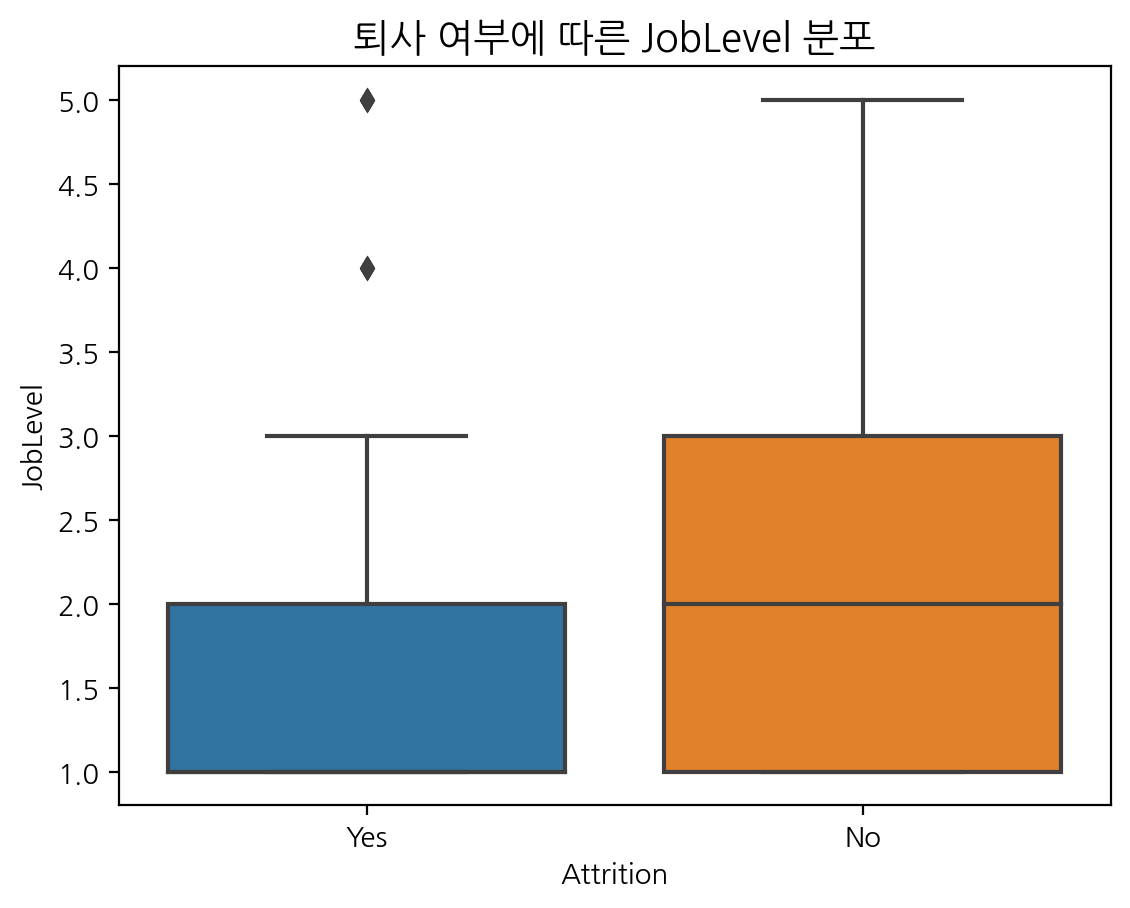

In [84]:
ax = sns.boxplot(data=df_raw, x='Attrition', y='JobLevel')
ax.set_title('퇴사 여부에 따른 JobLevel 분포', fontsize=14)

In [85]:
# joblevel이 높은데 퇴사를 하는 사람 -> 이상치 -> 왜?? -> 연차 40새

In [86]:
# 퇴사를 한 사람 중 joblevel이 높은 사람
df_attr_high_jl = df_raw[(df_raw["Attrition"] == 'Yes') & (df_raw["JobLevel"] >= 4)]
df_attr_high_jl

Age Attrition     BusinessTravel              Department  \
EmployeeNumber                                                             
58               41       Yes      Travel_Rarely  Research & Development   
787              55       Yes      Travel_Rarely  Research & Development   
825              58       Yes      Travel_Rarely  Research & Development   
986              40       Yes         Non-Travel                   Sales   
1038             52       Yes      Travel_Rarely                   Sales   
1127             39       Yes  Travel_Frequently  Research & Development   
1167             42       Yes  Travel_Frequently                   Sales   
1277             45       Yes      Travel_Rarely                   Sales   
1372             55       Yes      Travel_Rarely                   Sales   
1716             47       Yes  Travel_Frequently                   Sales   

                DistanceFromHome  Education    EducationField  \
EmployeeNumber                                                  
58                            12          3  Technical Degree   
787                            2          3           Medical   
825                            2          4     Life Sciences   
986                           24          3     Life Sciences   
1038                           2          1         Marketing   
1127                           2          3     Life Sciences   
1167                          12          3     Life Sciences   
1277                           2          3         Marketing   
1372                          13          4         Marketing   
1716                           9          3     Life Sciences   

                EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
EmployeeNumber                                                              
58                                    2  Female               3         5   
787                                   4    Male               3         5   
825                                   4    Male               3         5   
986                                   2  Female               4         4   
1038                                  1  Female               1         5   
1127                                  1    Male               3         4   
1167                                  3    Male               3         4   
1277                                  1  Female               1         5   
1372                                  1    Male               4         4   
1716                                  3    Male               1         4   

                                  JobRole  JobSatisfaction MaritalStatus  \
EmployeeNumber                                                             
58                      Research Director                3       Married   
787                               Manager                1       Married   
825                     Research Director                2        Single   
986                       Sales Executive                2        Single   
1038                              Manager                4       Married   
1127            Healthcare Representative                4      Divorced   
1167                      Sales Executive                1        Single   
1277                              Manager                2        Single   
1372                      Sales Executive                3        Single   
1716                      Sales Executive                3       Married   

                MonthlyIncome  NumCompaniesWorked OverTime  PercentSalaryHike  \
EmployeeNumber                                                                  
58                      19545                   1       No                 12   
787                     19859                   5      Yes                 13   
825                     19246                   7      Yes                 12   
986                     13194                   4      Yes                 16  

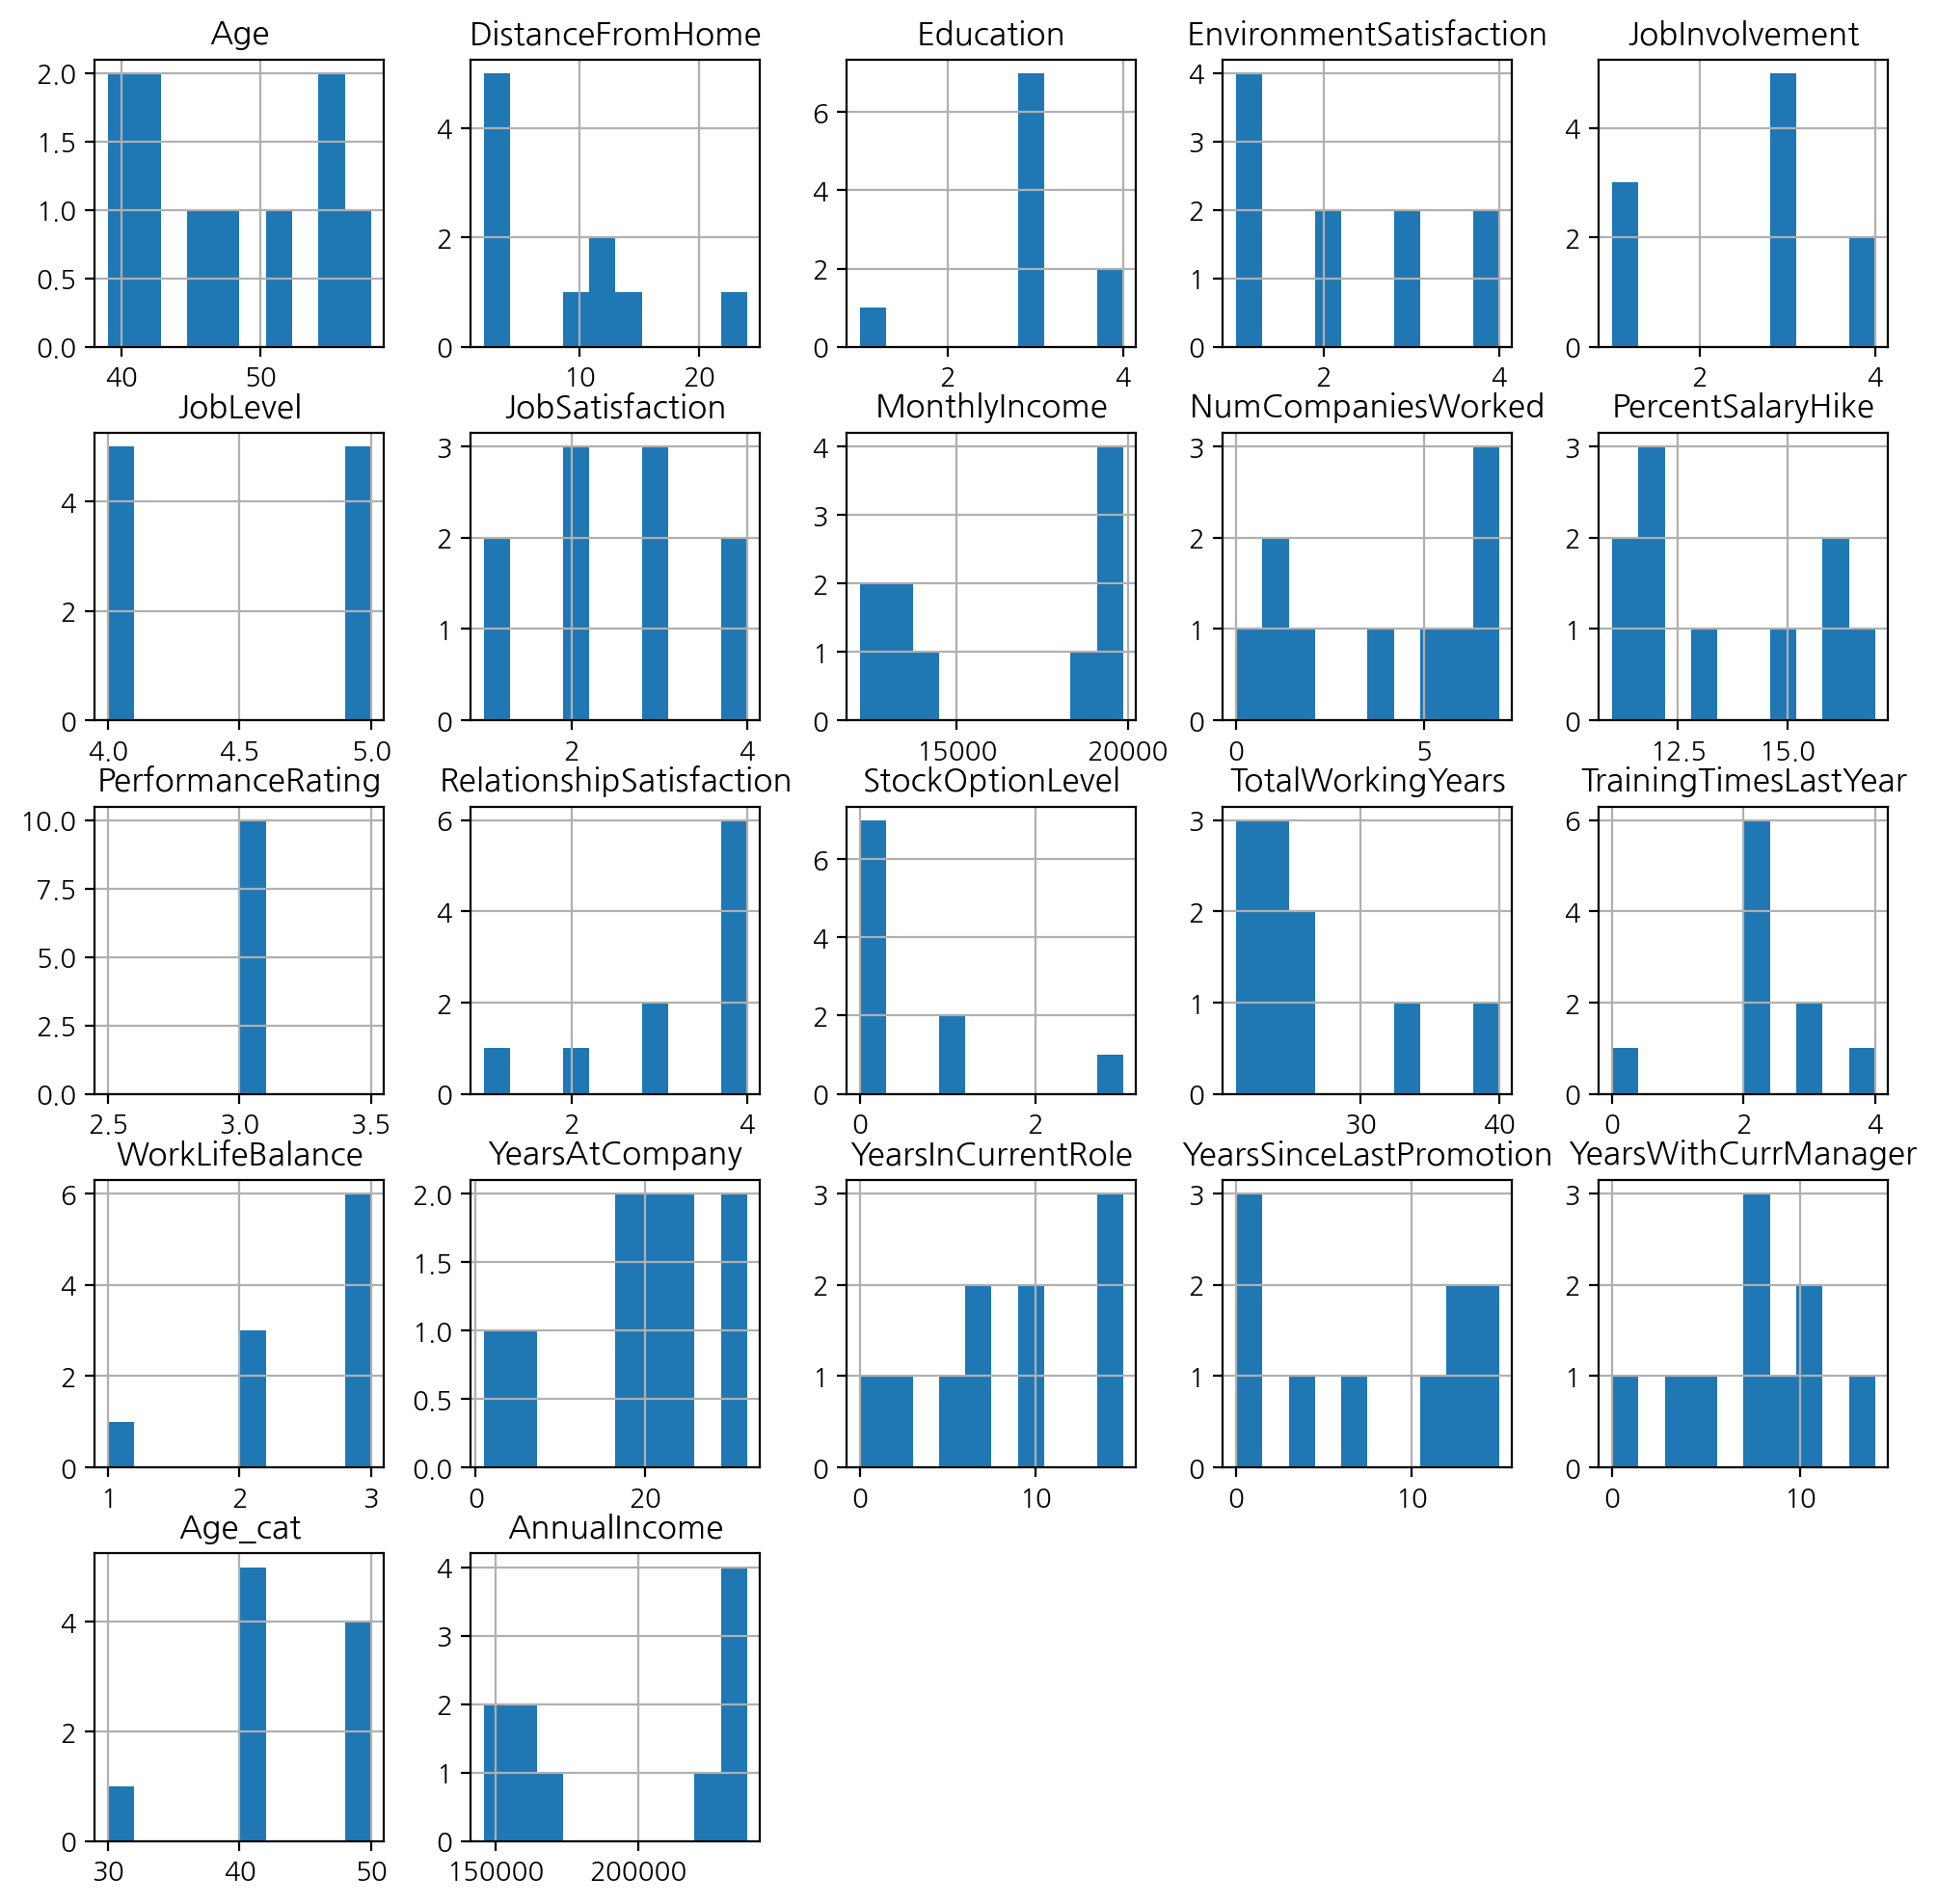

In [87]:
df_attr_high_jl.hist(figsize=(12,12));

## 연차별 만족도 비교

In [88]:
# 연차별 만족도 비교
df_exp_eval = df_raw.groupby('TotalWorkingYears_Group').agg({"EnvironmentSatisfaction":"mean",
                                           "JobSatisfaction":"mean",
                                          "RelationshipSatisfaction":"mean",
                                          "WorkLifeBalance":"mean"})
df_exp_eval

EnvironmentSatisfaction  JobSatisfaction  \
TotalWorkingYears_Group                                             
[0, 5)                                  2.850877         2.785088   
[5, 10)                                 2.701826         2.711968   
[10, 15)                                2.679887         2.790368   
[15, 20)                                2.679245         2.647799   
[20, 25)                                2.712000         2.600000   
[25, 30)                                2.576271         2.745763   
[30, 35)                                2.864865         2.810811   
[35, 40)                                3.000000         2.571429   
[40, 45)                                4.000000         3.000000   

                         RelationshipSatisfaction  WorkLifeBalance  
TotalWorkingYears_Group                                             
[0, 5)                                   2.736842         2.754386  
[5, 10)                                  2.713996         2.758621  
[10, 15)                                 2.628895         2.739377  
[15, 20)                                 2.691824         2.836478  
[20, 25)                                 2.848000         2.816000  
[25, 30)                                 2.779661         2.644068  
[30, 35)                                 2.783784         2.783784  
[35, 40)                                 2.714286         2.642857  
[40, 45)                                 4.000000         2.500000

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='WorkLifeBalance'>

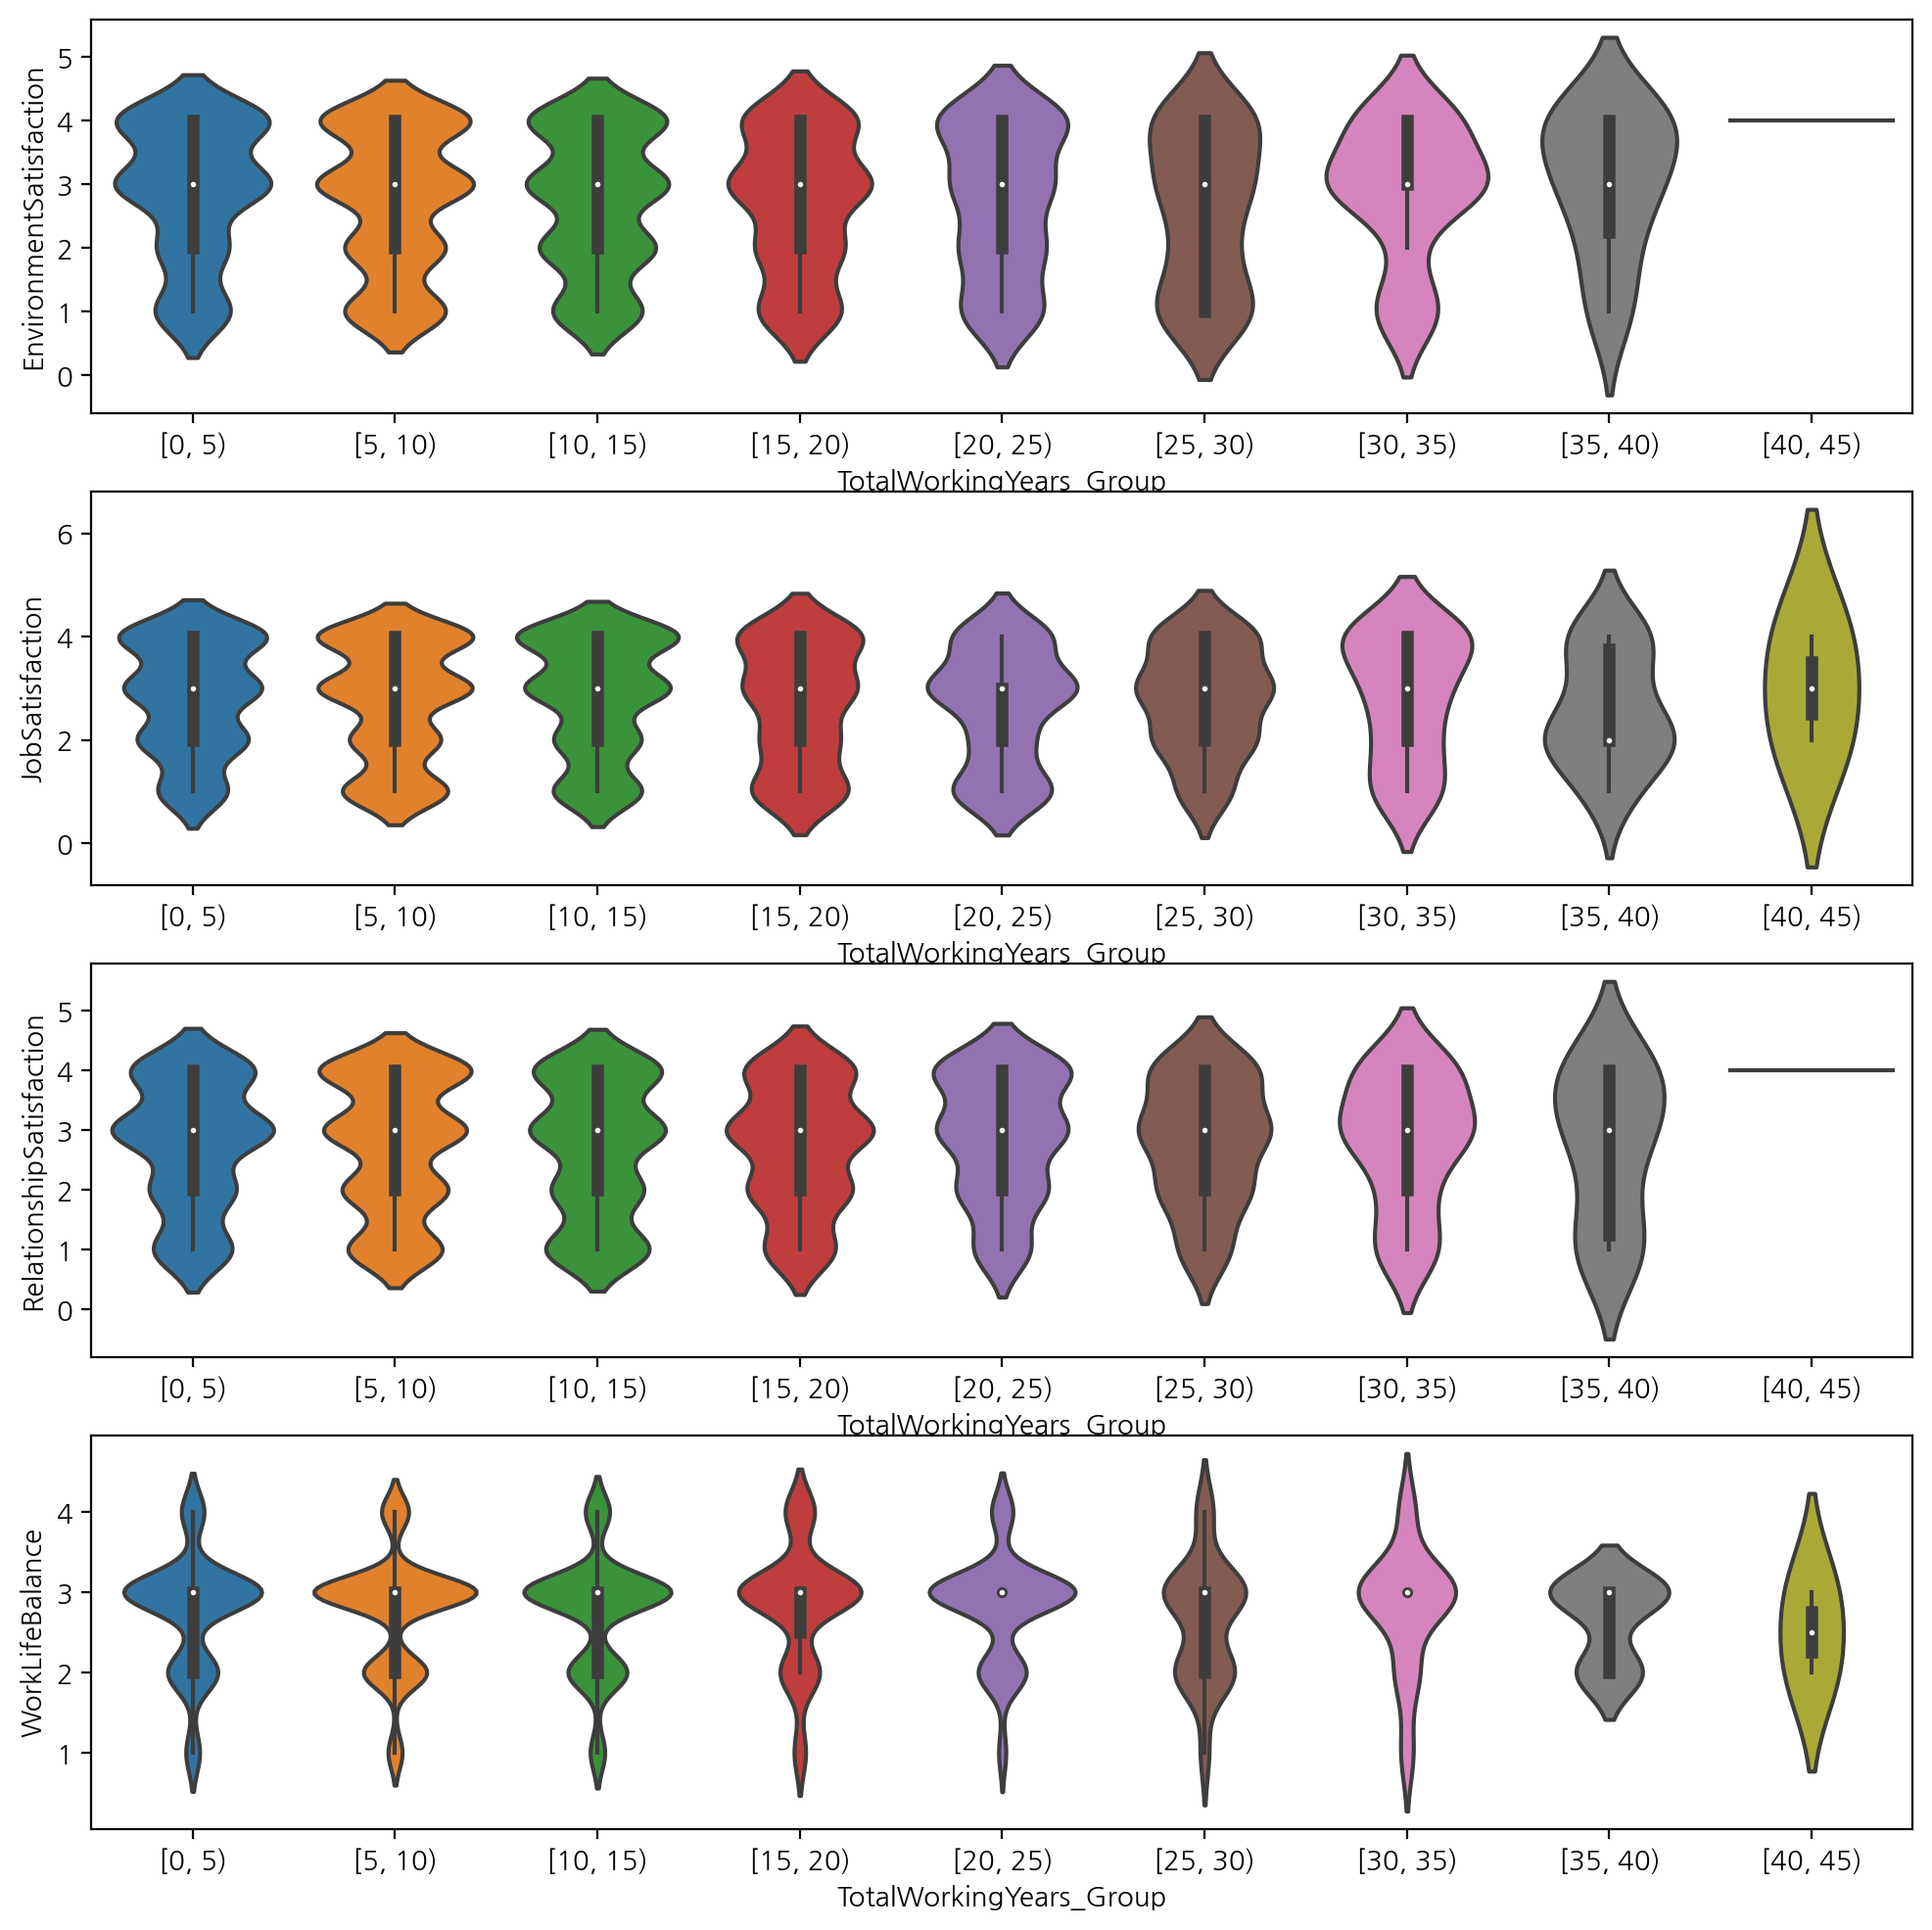

In [89]:
# 연차별 만족도 비교 시각화

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="EnvironmentSatisfaction", ax=axes[0])
sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="JobSatisfaction", ax=axes[1])
sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="RelationshipSatisfaction", ax=axes[2])
sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="WorkLifeBalance", ax=axes[3])

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='WorkLifeBalance'>

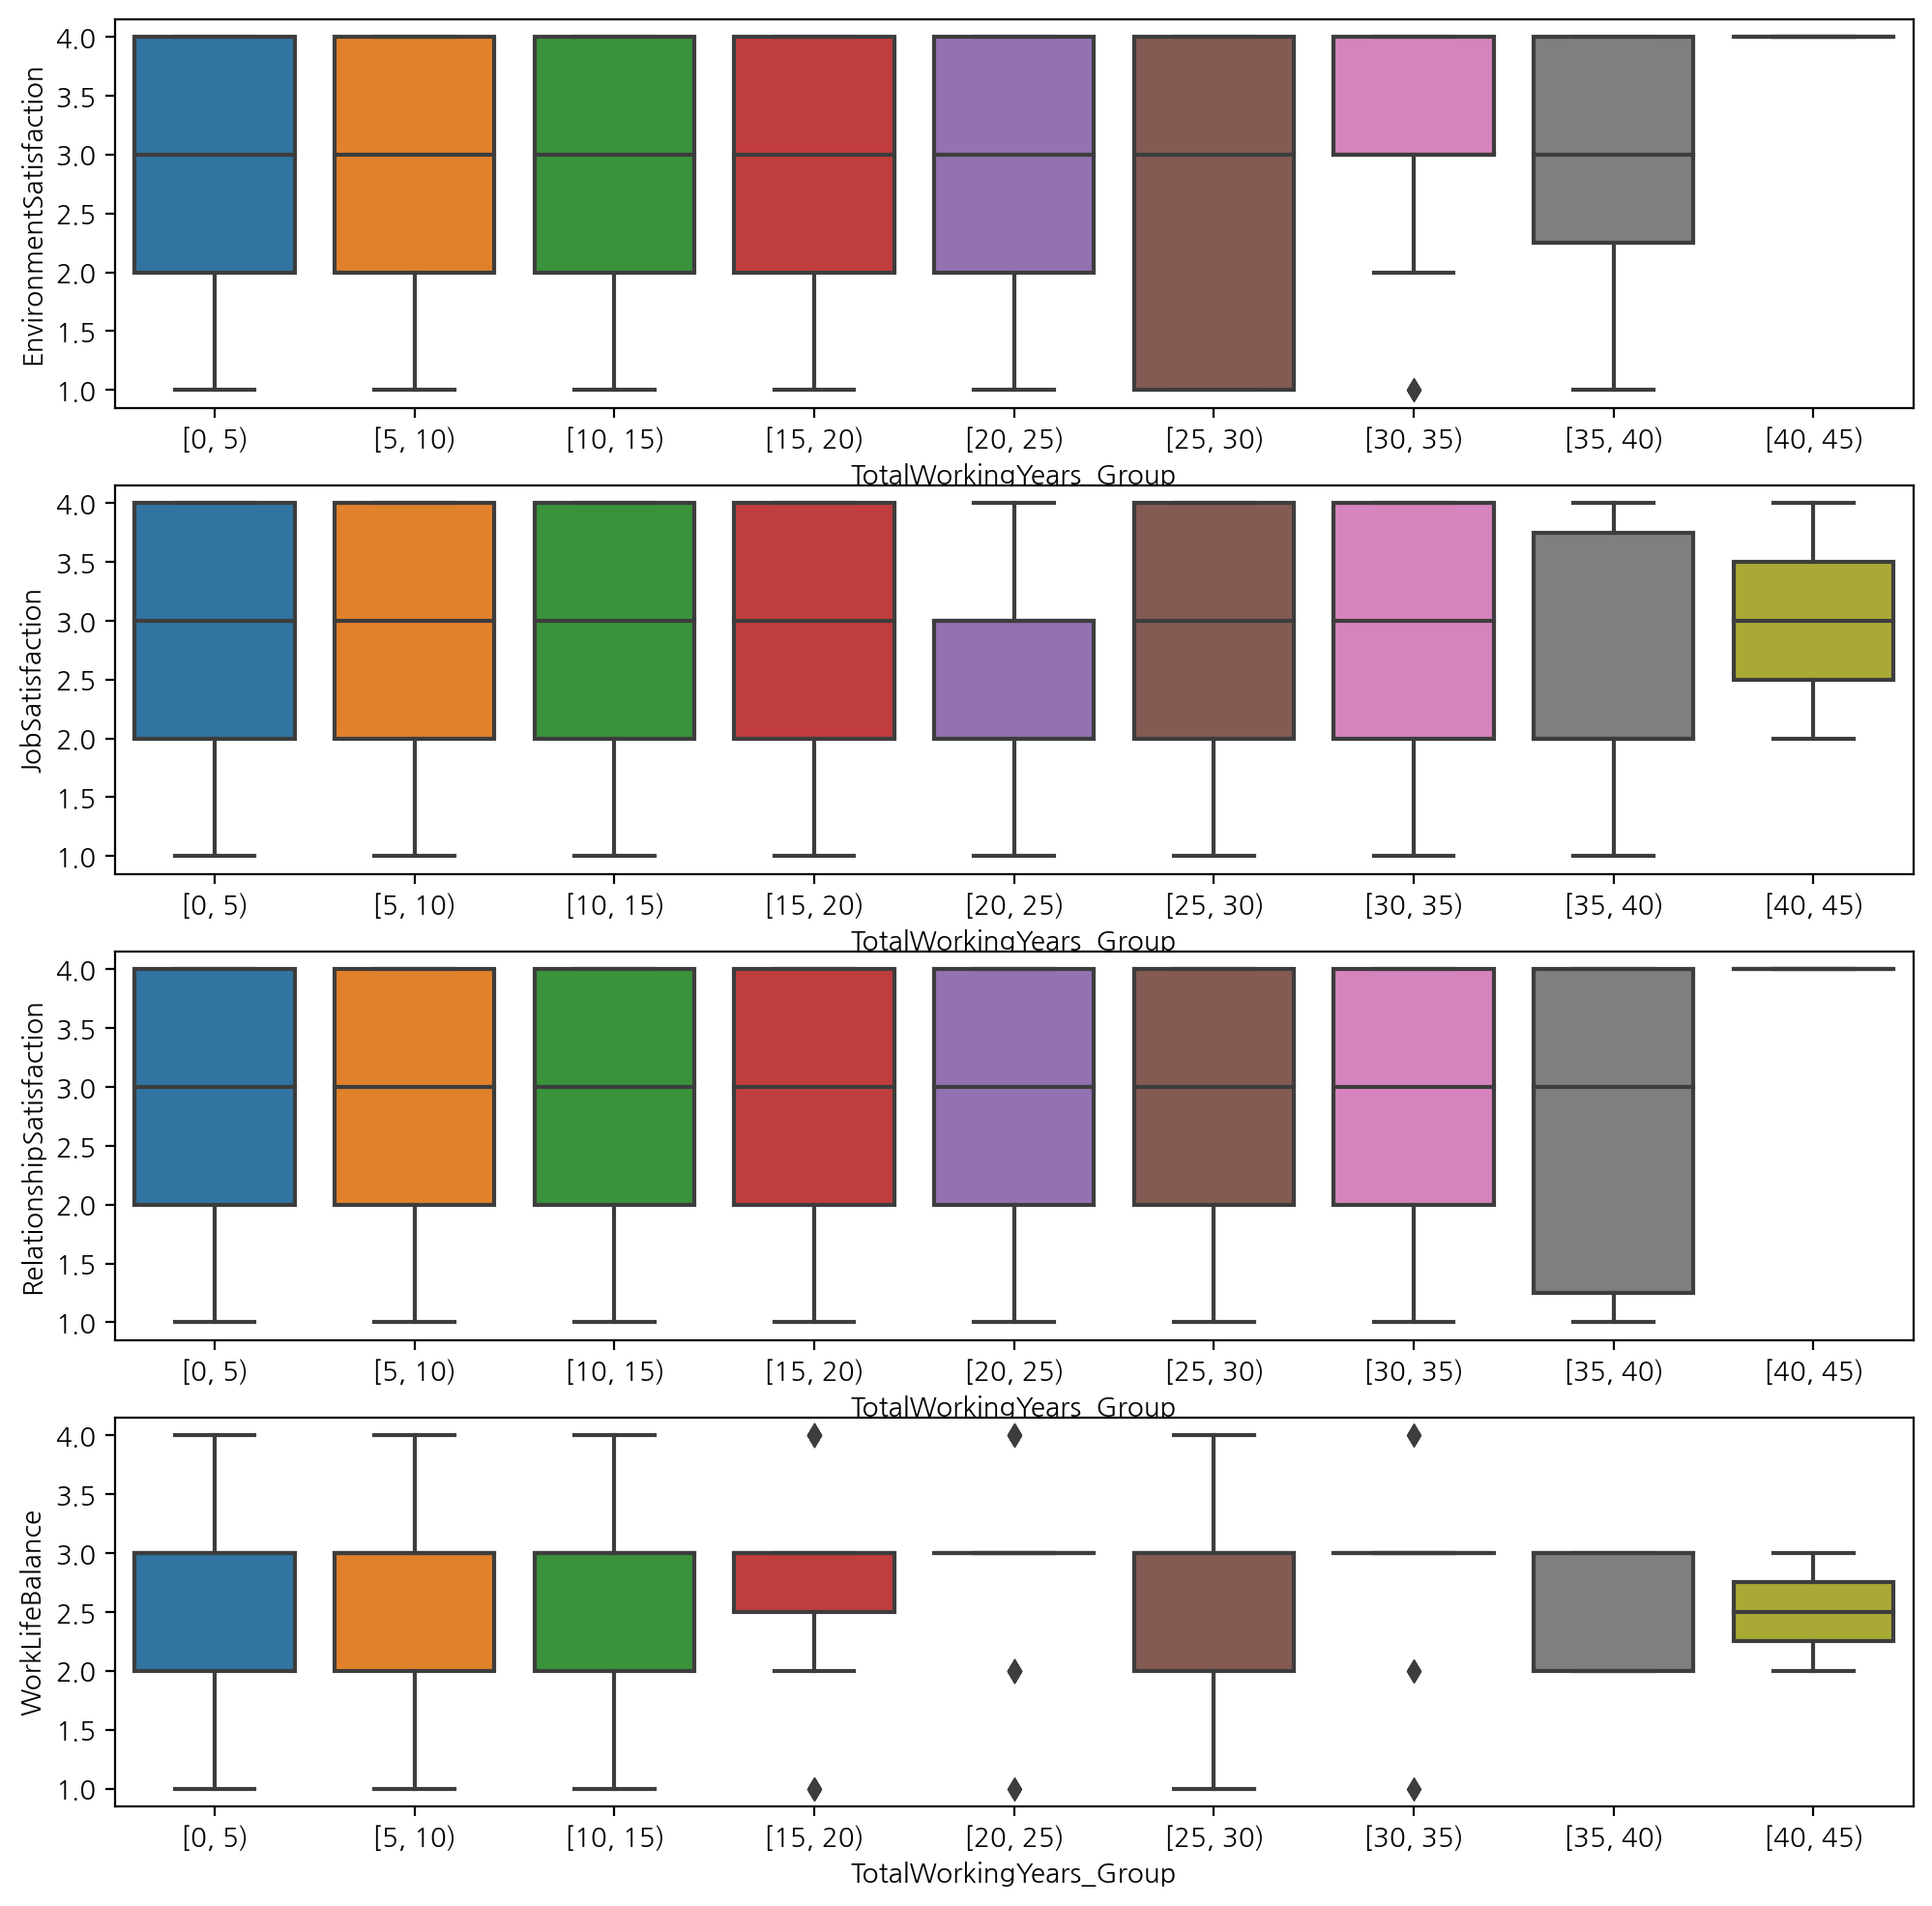

In [90]:
# 연차별 만족도 비교 시각화

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

sns.boxplot(data=df_raw, x='TotalWorkingYears_Group', y="EnvironmentSatisfaction", ax=axes[0])
sns.boxplot(data=df_raw, x='TotalWorkingYears_Group', y="JobSatisfaction", ax=axes[1])
sns.boxplot(data=df_raw, x='TotalWorkingYears_Group', y="RelationshipSatisfaction", ax=axes[2])
sns.boxplot(data=df_raw, x='TotalWorkingYears_Group', y="WorkLifeBalance", ax=axes[3])

## 연차별 인구통계학적 정보 비교

In [91]:
# 연차별 인구통계학적 정보 비교
df_exp_demo = df_raw.groupby('TotalWorkingYears_Group').agg({"Age":"mean",
                                           "DistanceFromHome":"mean"})
df_exp_demo

Age  DistanceFromHome
TotalWorkingYears_Group                             
[0, 5)                   28.622807          8.390351
[5, 10)                  34.206897          9.350913
[10, 15)                 36.991501          9.164306
[15, 20)                 40.905660         10.100629
[20, 25)                 44.784000          9.784000
[25, 30)                 48.644068          8.288136
[30, 35)                 53.216216          7.027027
[35, 40)                 55.214286         10.857143
[40, 45)                 58.000000         12.500000

<Figure size 1200x500 with 0 Axes>

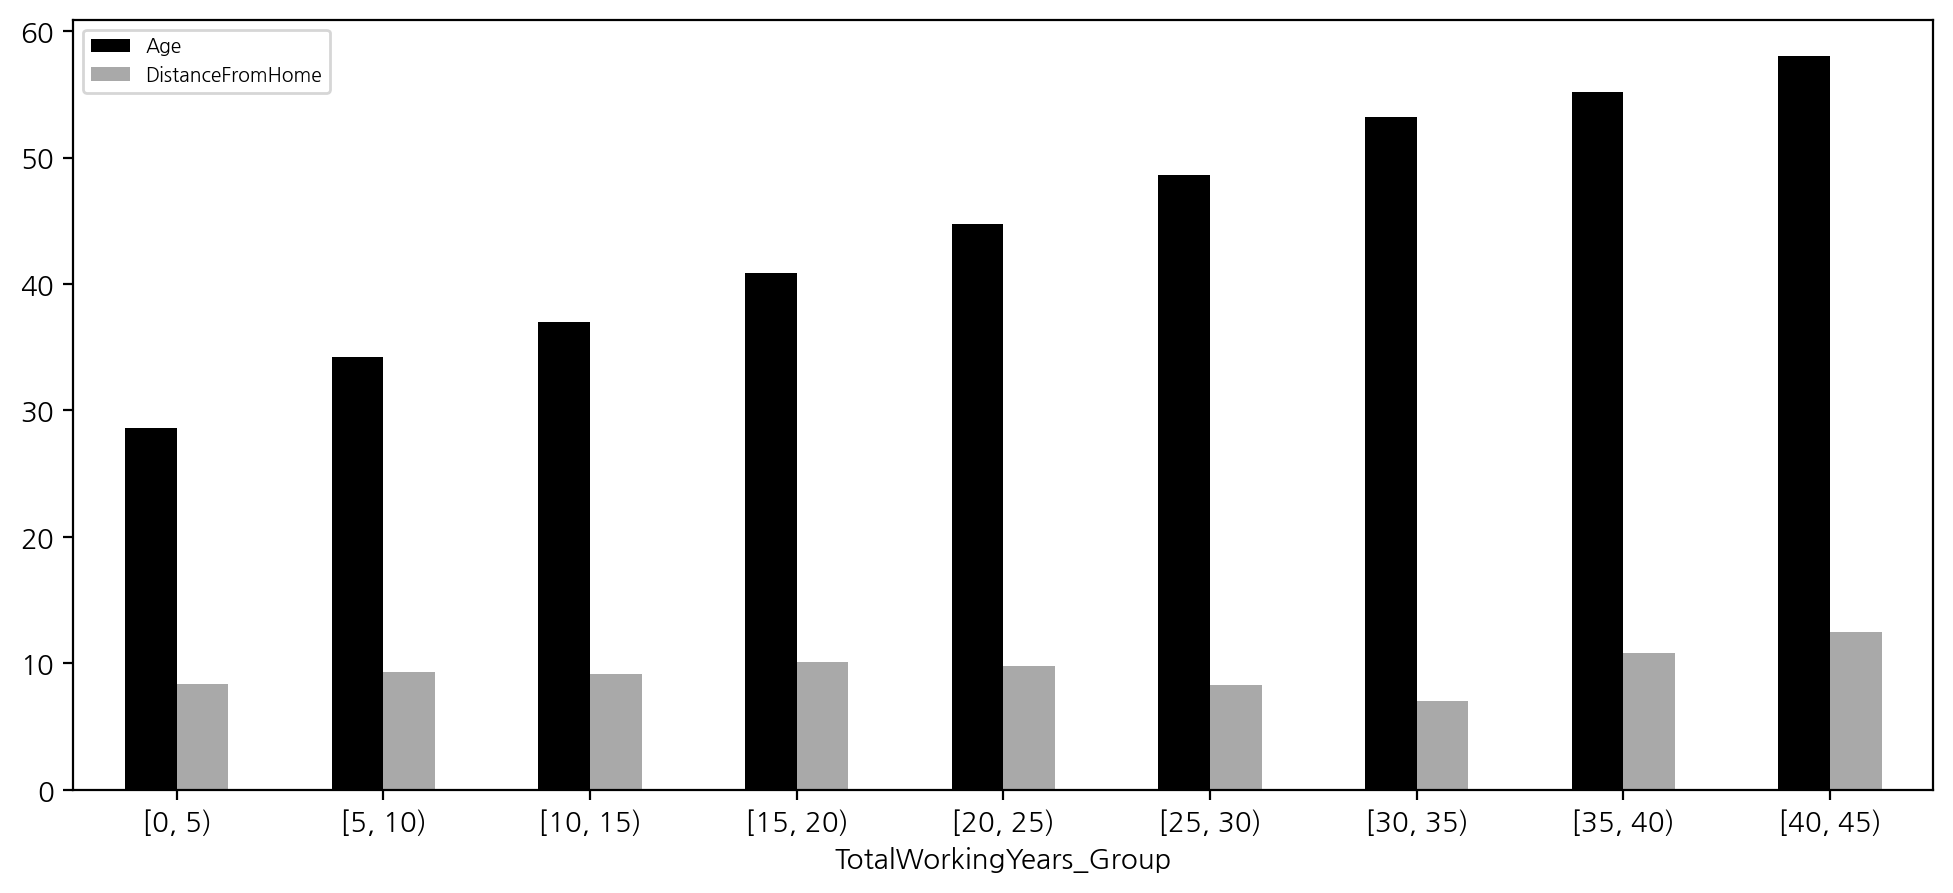

In [92]:
# 연차별 인구통계학적 정보 비교 시각화
# -> 연차가 낮을수록 평균 나이가 적음 (일반적으로 당연)
# -> 연차별 통근거리에 대해 큰 차이 없음. 30~34년차의 경우 통근거리가 가장 가까움

plt.figure(figsize=(12,5))
colors = ['black', 'darkgray']
df_exp_demo.reset_index().plot.bar(x='TotalWorkingYears_Group', color=colors, rot=0, figsize=(12,5))
plt.legend(fontsize = 7)

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='DistanceFromHome'>

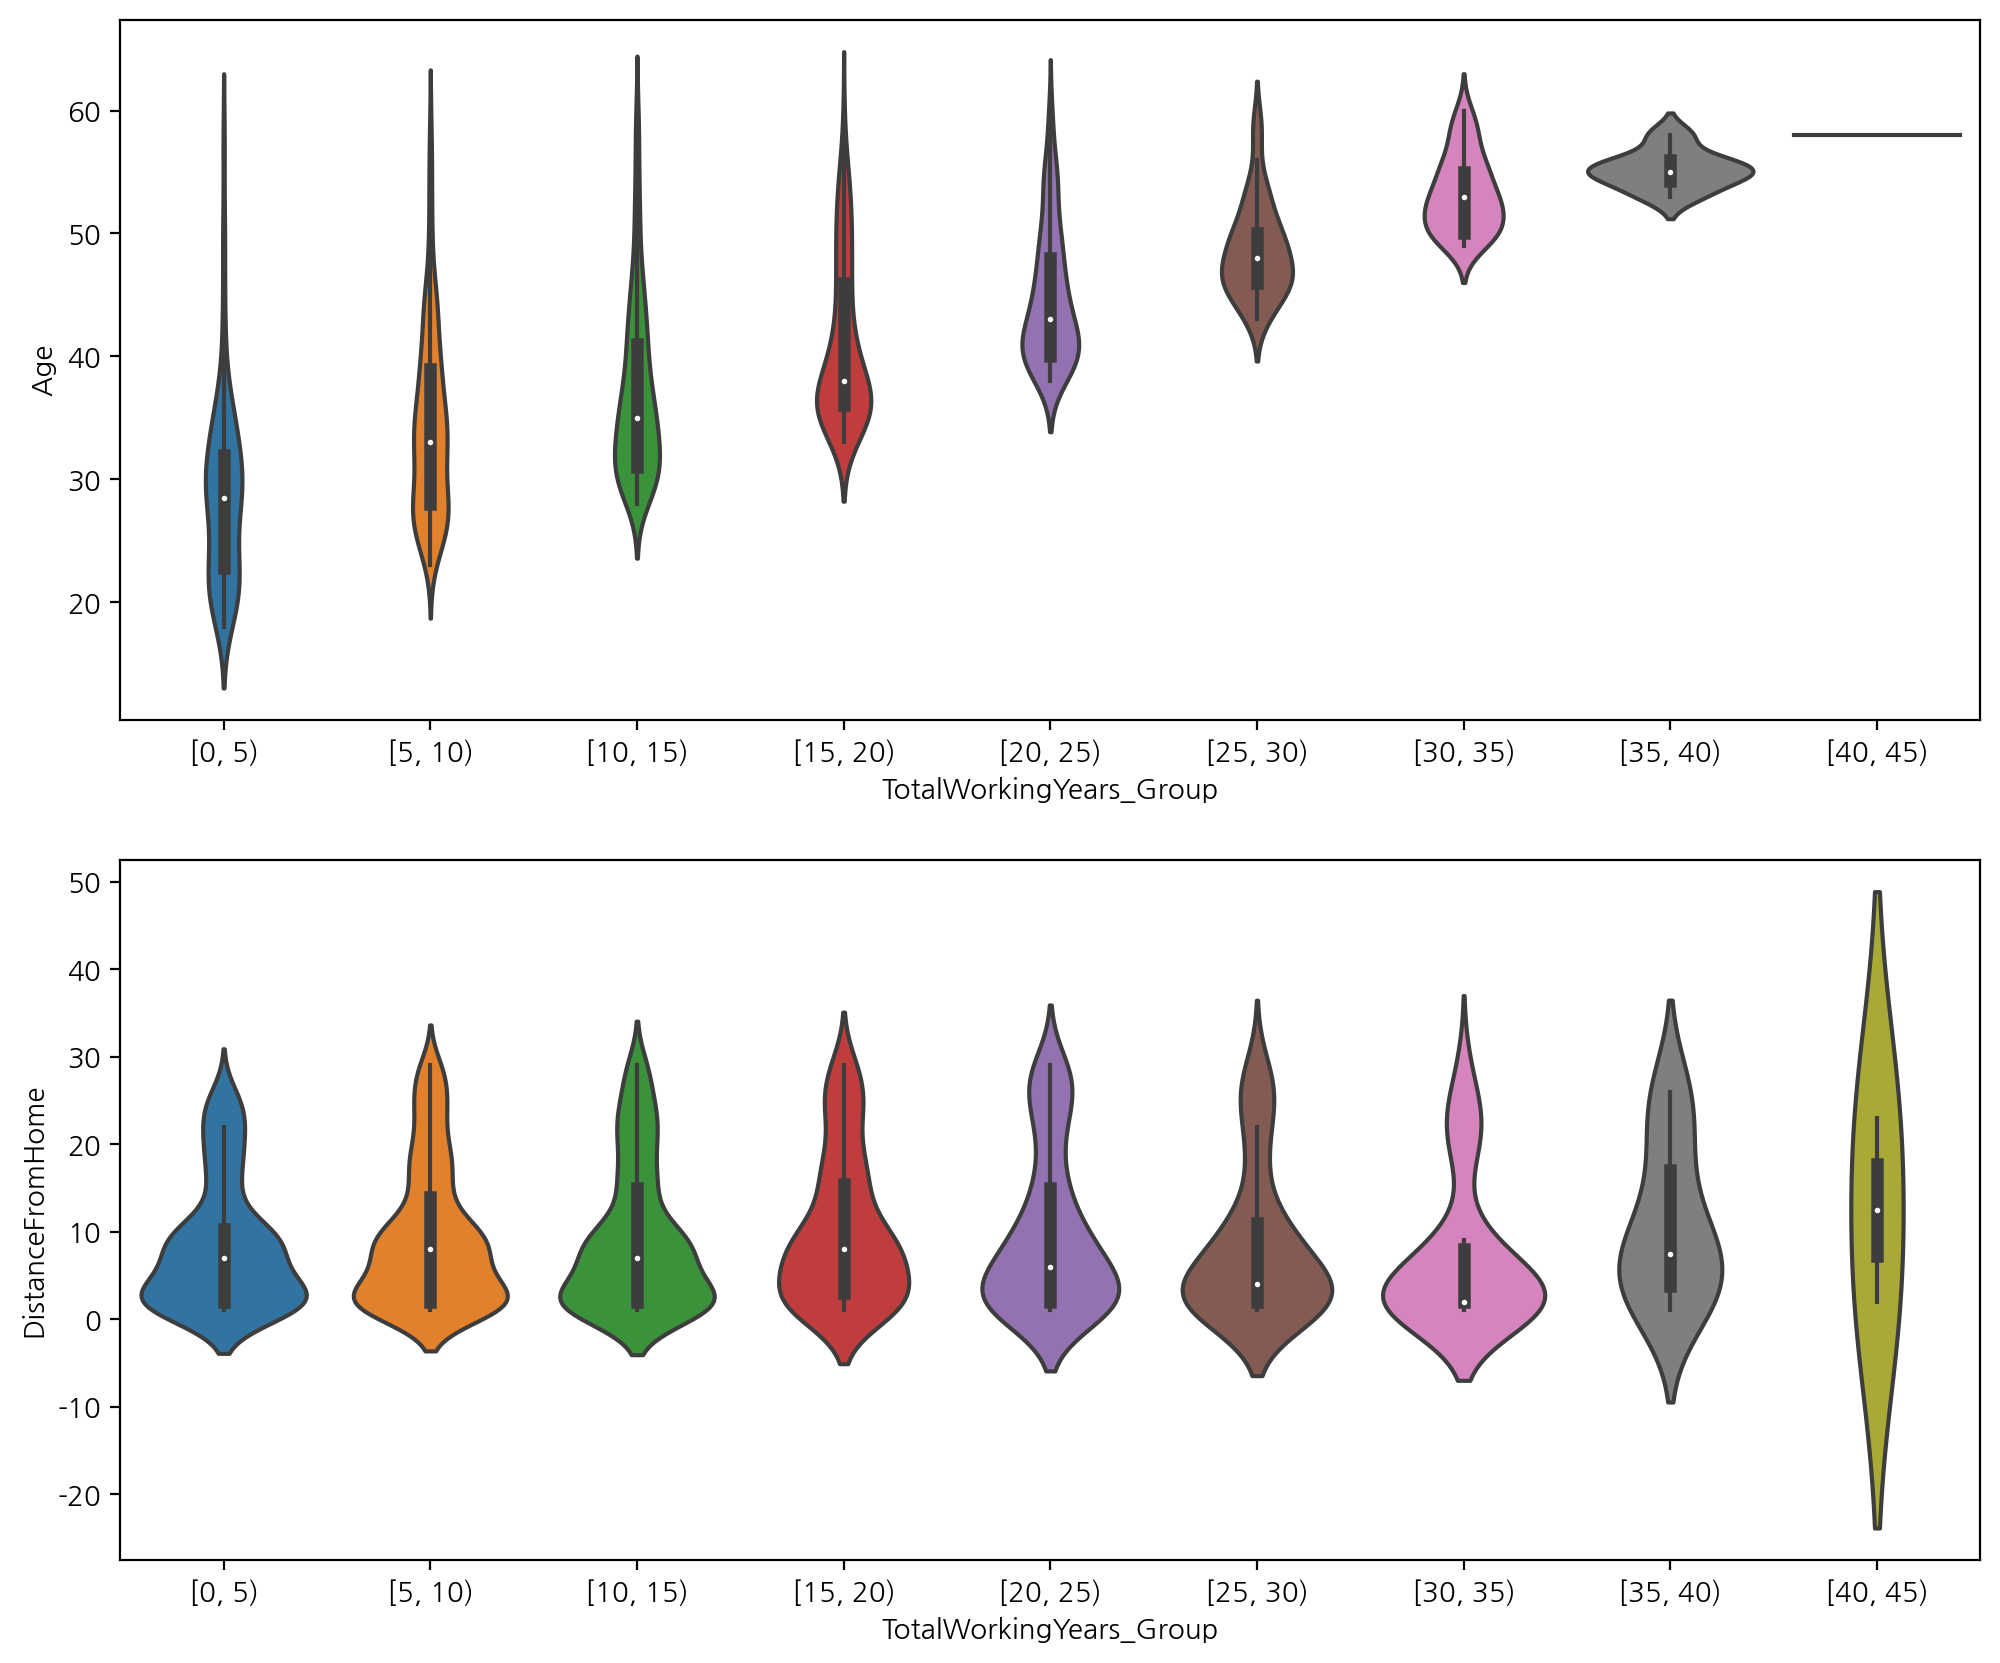

In [93]:
# 연차별 인구통계학적 정보 비교 시각화

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="Age", ax=axes[0])
sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="DistanceFromHome", ax=axes[1])

In [94]:
# 실제로 5년 미만 연차의 직원은 연령대 폭이 매우 큼
df_raw.loc[df_raw["TotalWorkingYears"] < 5, 'Age'].describe()

count    228.000000
mean      28.622807
std        7.395546
min       18.000000
25%       22.750000
50%       28.500000
75%       32.000000
max       58.000000
Name: Age, dtype: float64

In [96]:
# 연차별 교육 비교
df_exp_edu = df_raw.groupby('TotalWorkingYears_Group').agg({"TrainingTimesLastYear":"mean",
                                                       "Education":"mean"})
df_exp_edu

TrainingTimesLastYear  Education
TotalWorkingYears_Group                                  
[0, 5)                                2.793860   2.557018
[5, 10)                               2.839757   2.841785
[10, 15)                              2.838527   3.062323
[15, 20)                              2.742138   3.150943
[20, 25)                              2.752000   2.912000
[25, 30)                              2.711864   2.932203
[30, 35)                              2.702703   3.243243
[35, 40)                              2.214286   3.642857
[40, 45)                              2.500000   4.000000

<Figure size 1200x500 with 0 Axes>

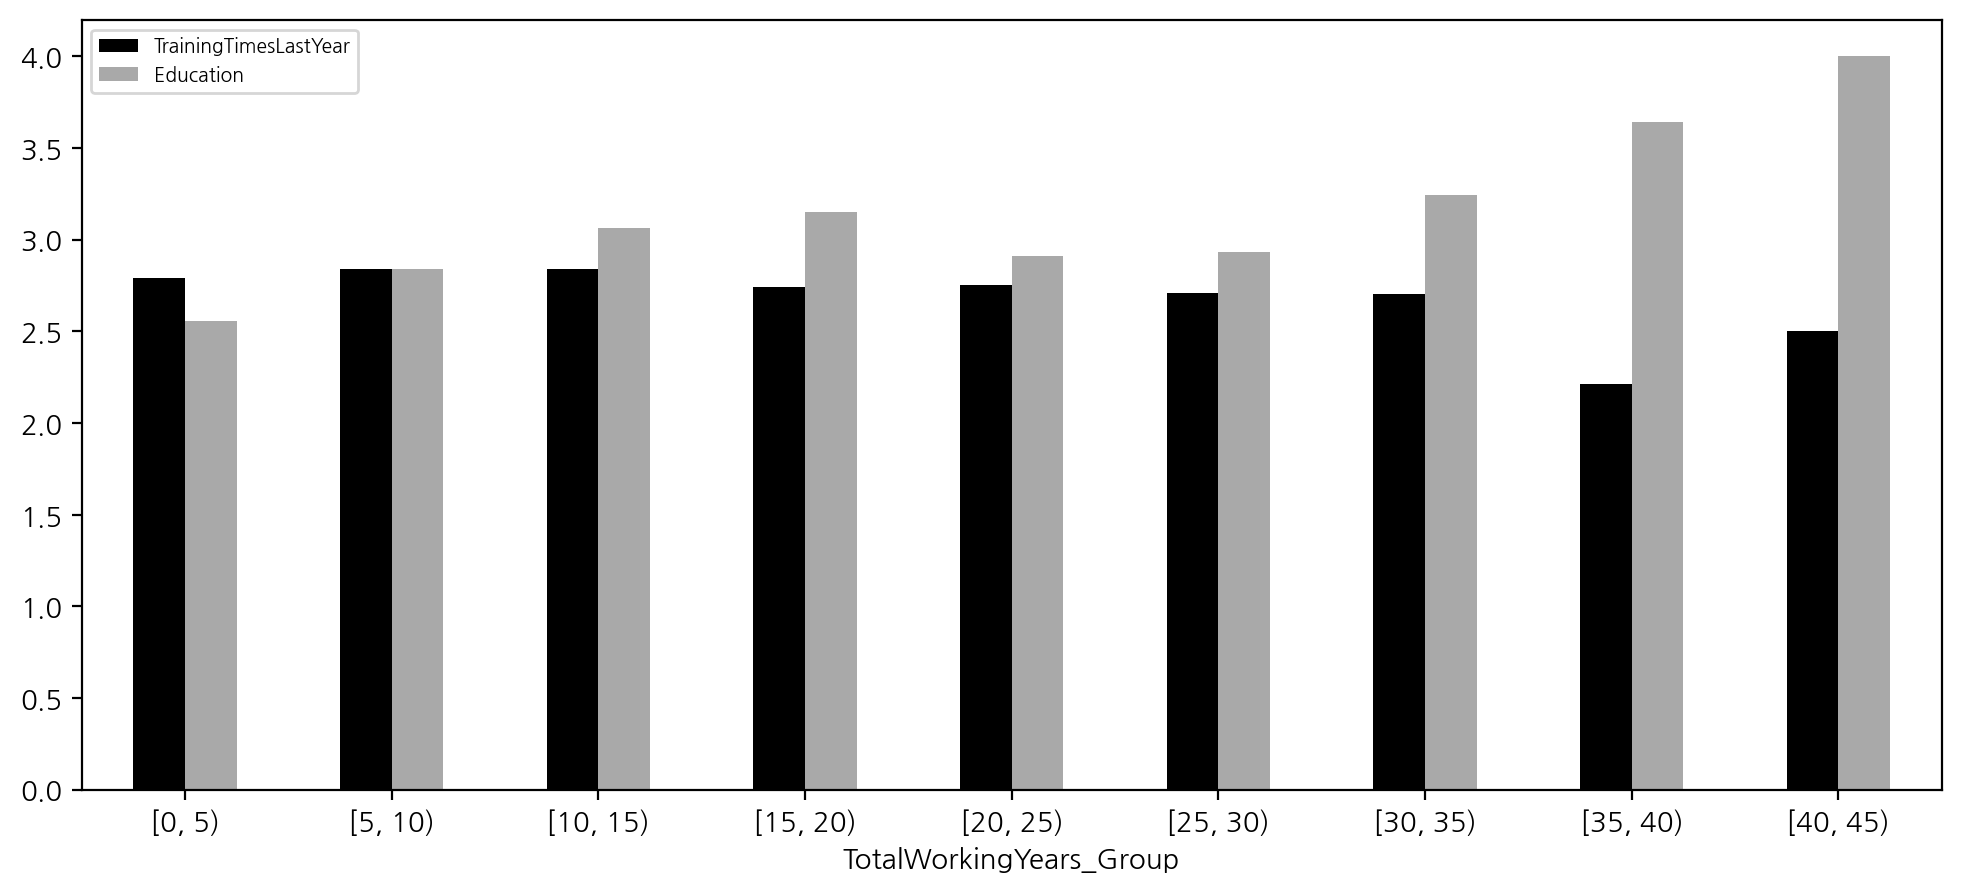

In [97]:
# 연차별 교육 비교 시각화
# -> 연차별 작년 교육 횟수에 큰 차이 없음. 35년차 이상은 교육을 받은 횟수가 다른 년차 그룹보다 적음
# -> 연차가 높을수록 교육수준이 높음. 0~4년차의 교육 수준이 가장 낮음.

plt.figure(figsize=(12,5))
colors = ['black', 'darkgray']
df_exp_edu.reset_index().plot.bar(x='TotalWorkingYears_Group', color=colors, rot=0, figsize=(12,5))
plt.legend(fontsize = 7)

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='Education'>

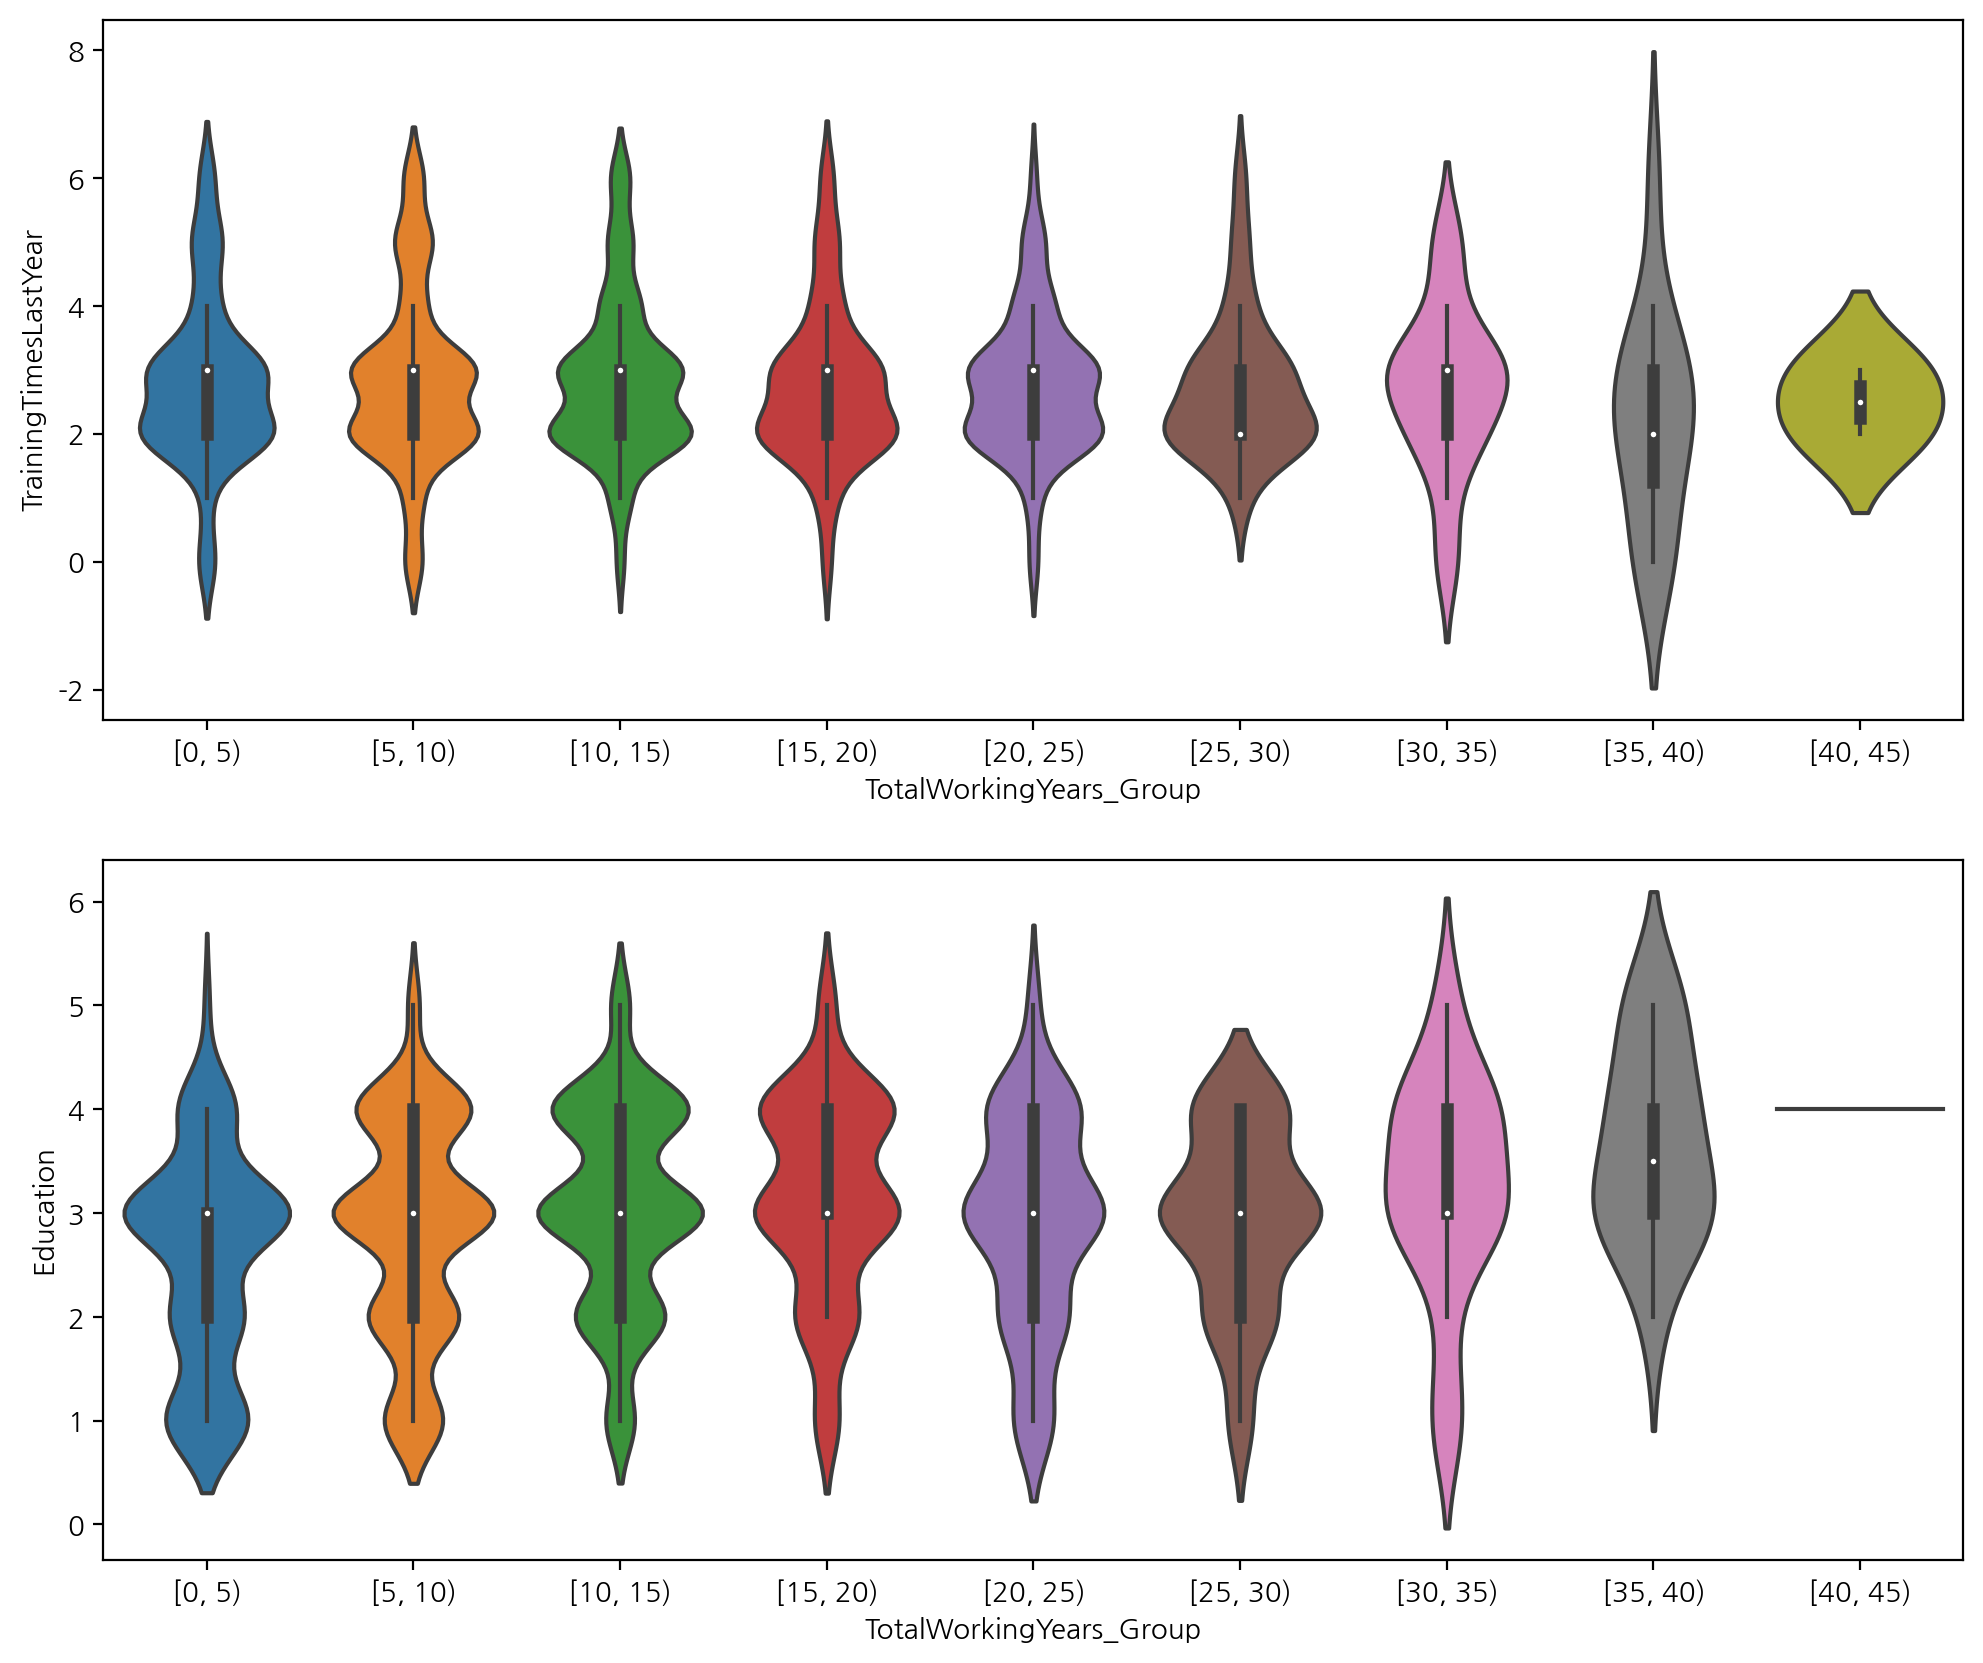

In [98]:
# 연차별 교육 정보 비교 시각화

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="TrainingTimesLastYear", ax=axes[0])
sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="Education", ax=axes[1])

In [99]:
# 연차별 직무 수준 비교
df_exp_jl = df_raw.groupby('TotalWorkingYears_Group').agg({"JobLevel":"mean"})
df_exp_jl

JobLevel
TotalWorkingYears_Group          
[0, 5)                   1.100877
[5, 10)                  1.567951
[10, 15)                 2.084986
[15, 20)                 2.207547
[20, 25)                 3.664000
[25, 30)                 4.118644
[30, 35)                 4.189189
[35, 40)                 4.214286
[40, 45)                 4.000000

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='JobLevel'>

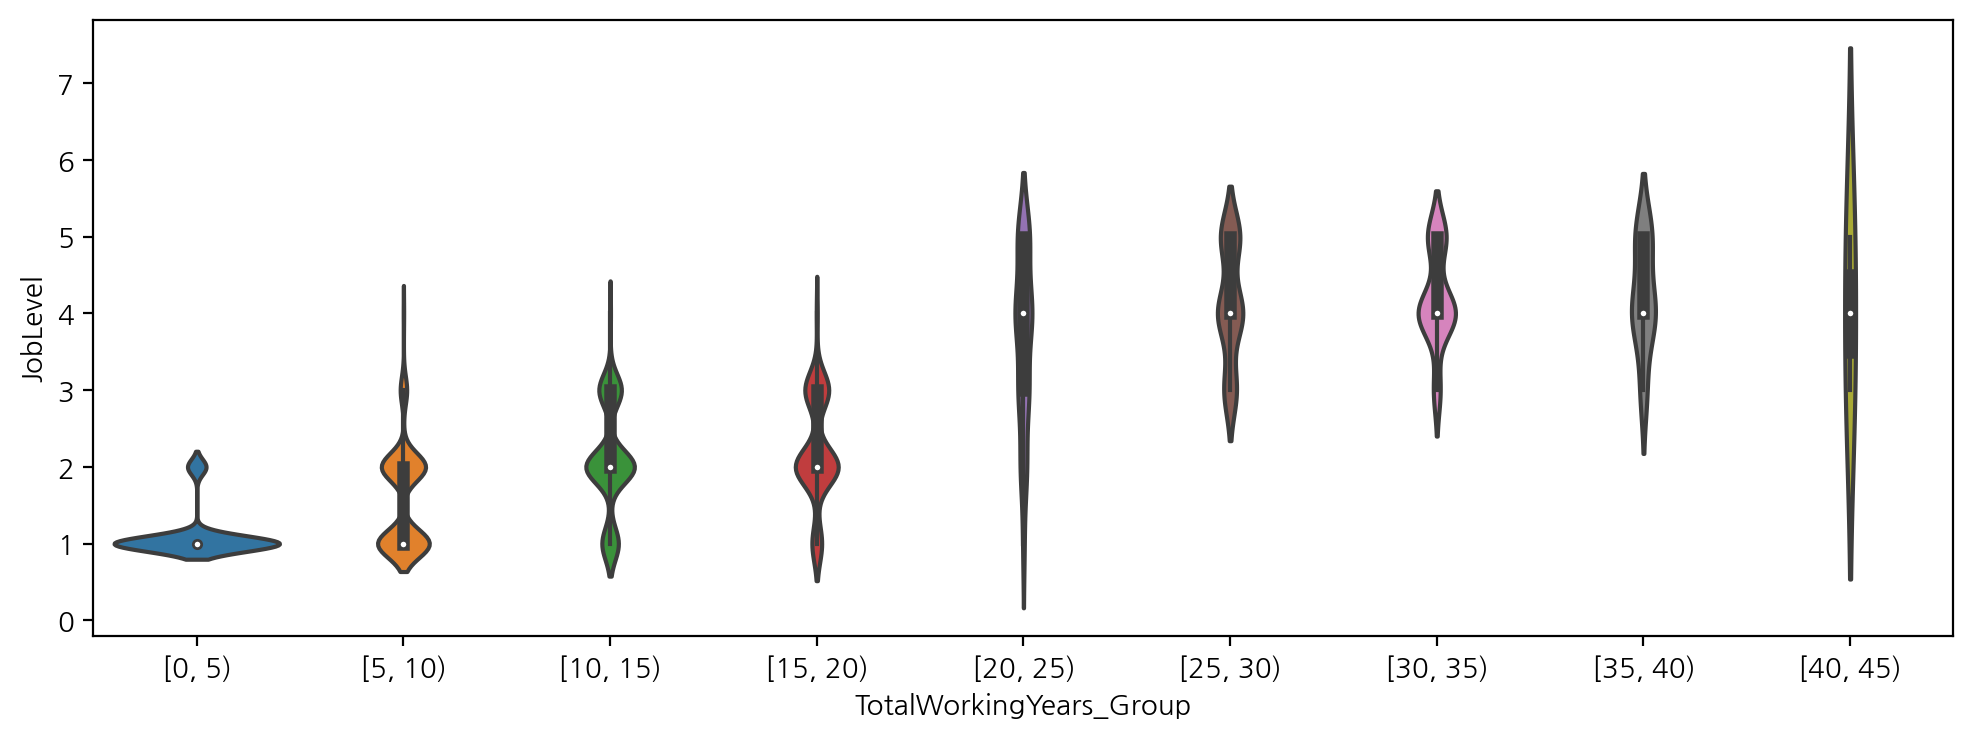

In [100]:
# 연차별 직무 수준 비교 시각화
plt.figure(figsize=(12,4))

sns.violinplot(data=df_raw, x='TotalWorkingYears_Group', y="JobLevel")

<AxesSubplot: xlabel='TotalWorkingYears_Group', ylabel='JobLevel'>

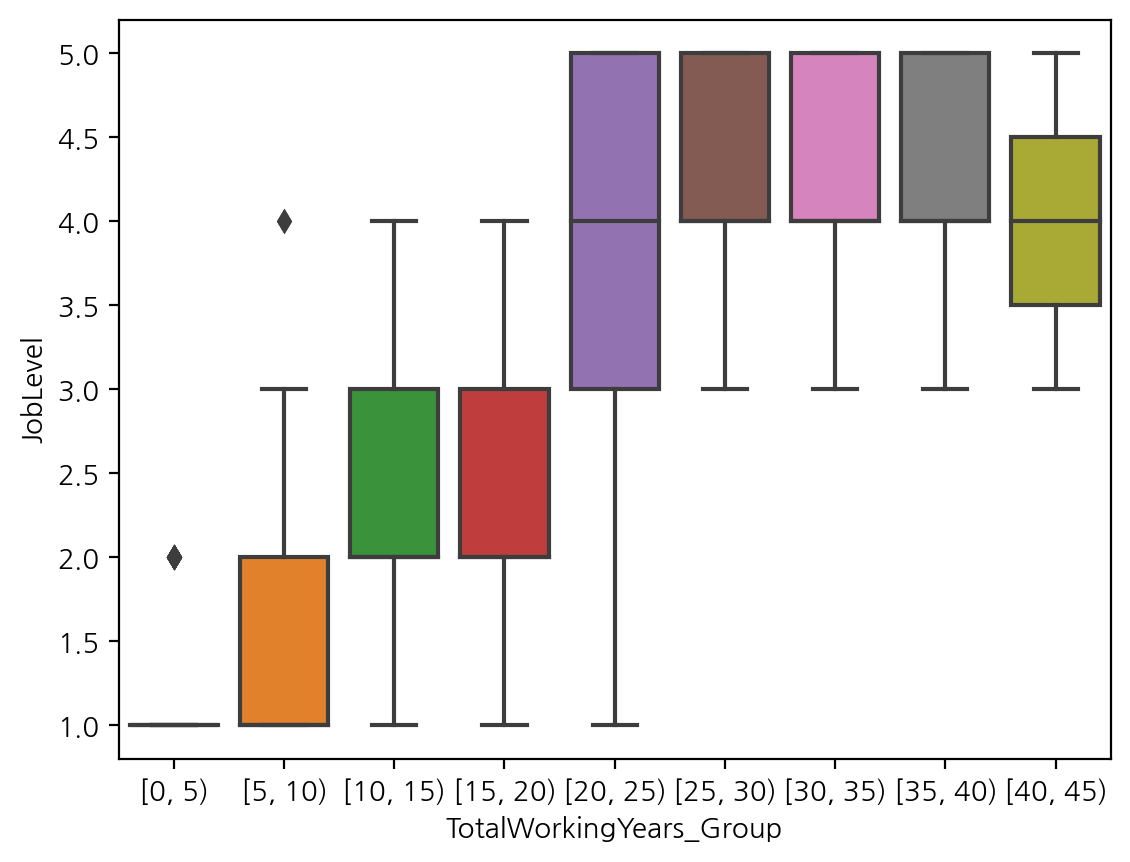

In [103]:
# 연차별 직무 수준 비교 시각화
sns.boxplot(data=df_raw, x='TotalWorkingYears_Group', y="JobLevel")

## 비경력직, 경력직의 퇴사 비율
(경력직 : JobLevel 3 이상, TotalWorkingYears 3년 이상)

<AxesSubplot: xlabel='Experienced', ylabel='count'>

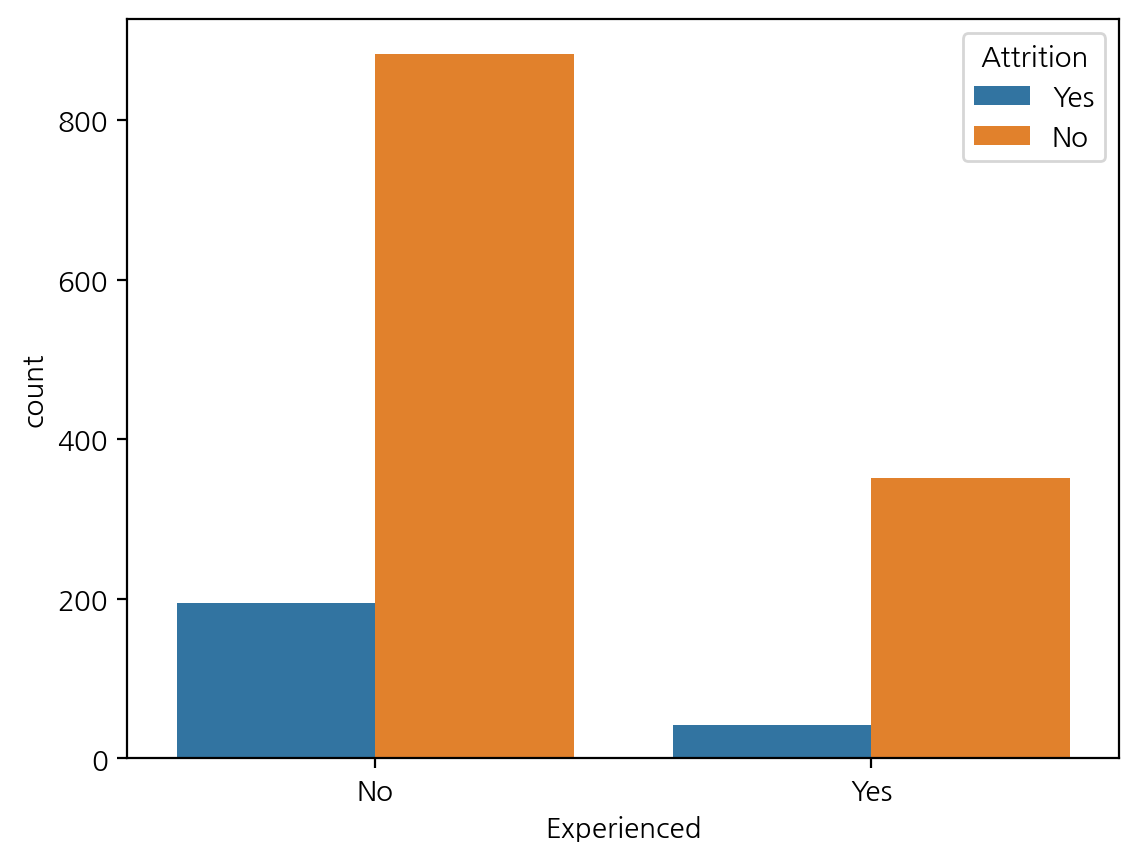

In [104]:
# 비경력직, 경력직의 퇴사 현황
sns.countplot(df_raw, x='Experienced', hue='Attrition')

In [105]:
df_exp_attr = df_raw.groupby('Experienced').agg({"Attrition":"value_counts"})
df_exp_attr

Attrition
Experienced Attrition           
No          No               882
            Yes              195
Yes         No               351
            Yes               42

In [106]:
# 비경력직의 퇴사비율
df_exp_attr["Attrition"][1]/df_exp_attr.loc["No"].sum()

Attrition    0.181058
dtype: float64

In [107]:
# 경력직의 퇴사비율
df_exp_attr["Attrition"][3]/df_exp_attr.loc["Yes"].sum()

Attrition    0.10687
dtype: float64

**결론**

: 비경력직의 퇴사 비율이 더 높다.

## 경력직 비율이 높은 부서는 어디인가?

In [108]:
df_exp_dpt = df_raw.groupby('Department').agg({"Experienced":"value_counts"})
df_exp_dpt

Experienced
Department             Experienced             
Human Resources        No                    46
                       Yes                   17
Research & Development No                   715
                       Yes                  246
Sales                  No                   316
                       Yes                  130

In [109]:
# 부서별 경력직 비율
exp_dict = {'HR_ExpRatio': (df_exp_dpt.iloc[1,:] / (df_exp_dpt.iloc[0,:] + df_exp_dpt.iloc[1,:])),
             'RnD_ExpRatio': (df_exp_dpt.iloc[3,:] / (df_exp_dpt.iloc[2,:] + df_exp_dpt.iloc[3,:])),             
             'Sales_ExpRatio': (df_exp_dpt.iloc[5,:] / (df_exp_dpt.iloc[4,:] + df_exp_dpt.iloc[5,:]))}
exp_dict

{'HR_ExpRatio': Experienced    0.269841
 dtype: float64,
 'RnD_ExpRatio': Experienced    0.255983
 dtype: float64,
 'Sales_ExpRatio': Experienced    0.29148
 dtype: float64}

In [110]:
df_dp_exp_ratio = pd.DataFrame(exp_dict)
df_dp_exp_ratio

HR_ExpRatio  RnD_ExpRatio  Sales_ExpRatio
Experienced     0.269841      0.255983         0.29148

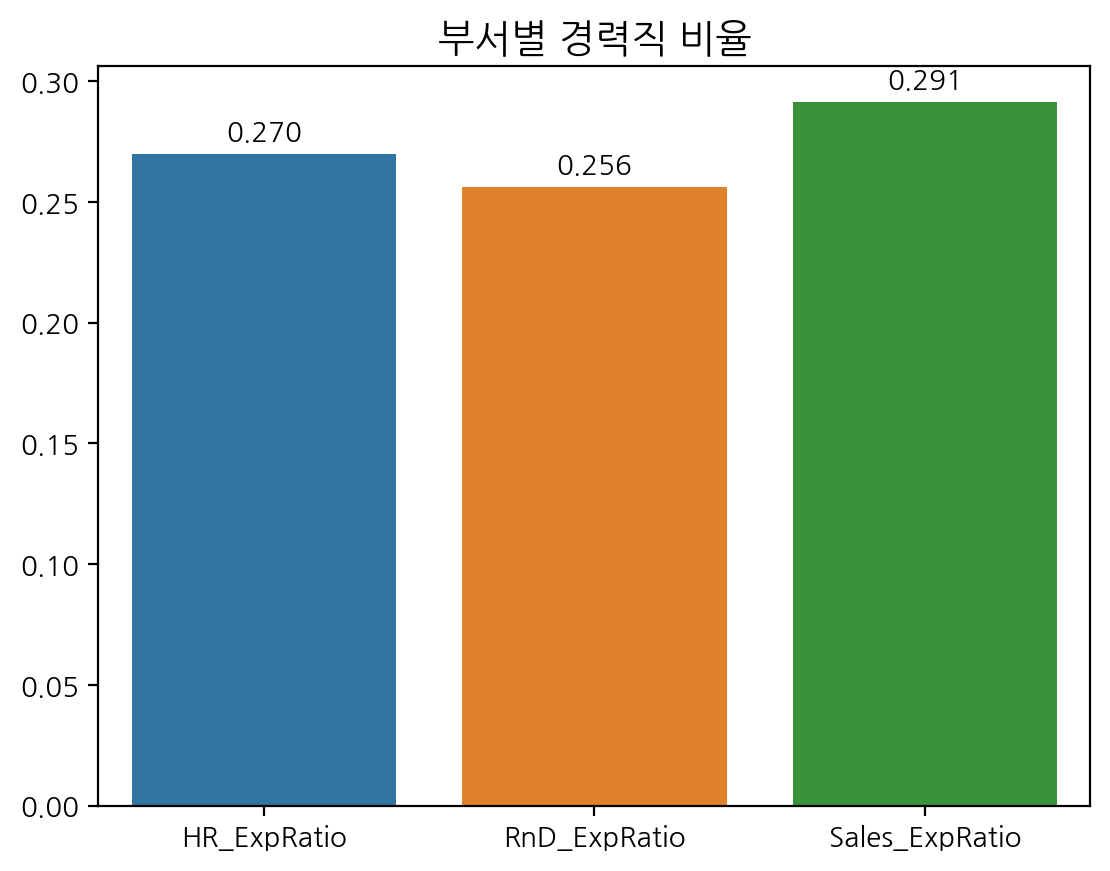

In [111]:
# Sales, HR, RnD 순으로 경력직의 비율이 높음

ax = sns.barplot(data=df_dp_exp_ratio)
ax.set_title('부서별 경력직 비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

In [112]:
# 퇴사한 사람들의 이전 직장 개수
# -> 퇴사한 사람일수록 이전 근무 직장의 개수가 많음
df_raw.groupby('Attrition').agg({'NumCompaniesWorked':'mean'})

NumCompaniesWorked
Attrition                    
No                   2.645580
Yes                  2.940928

Text(0.5, 1.0, '퇴사 여부에 따른 이전 직장 개수 분포')

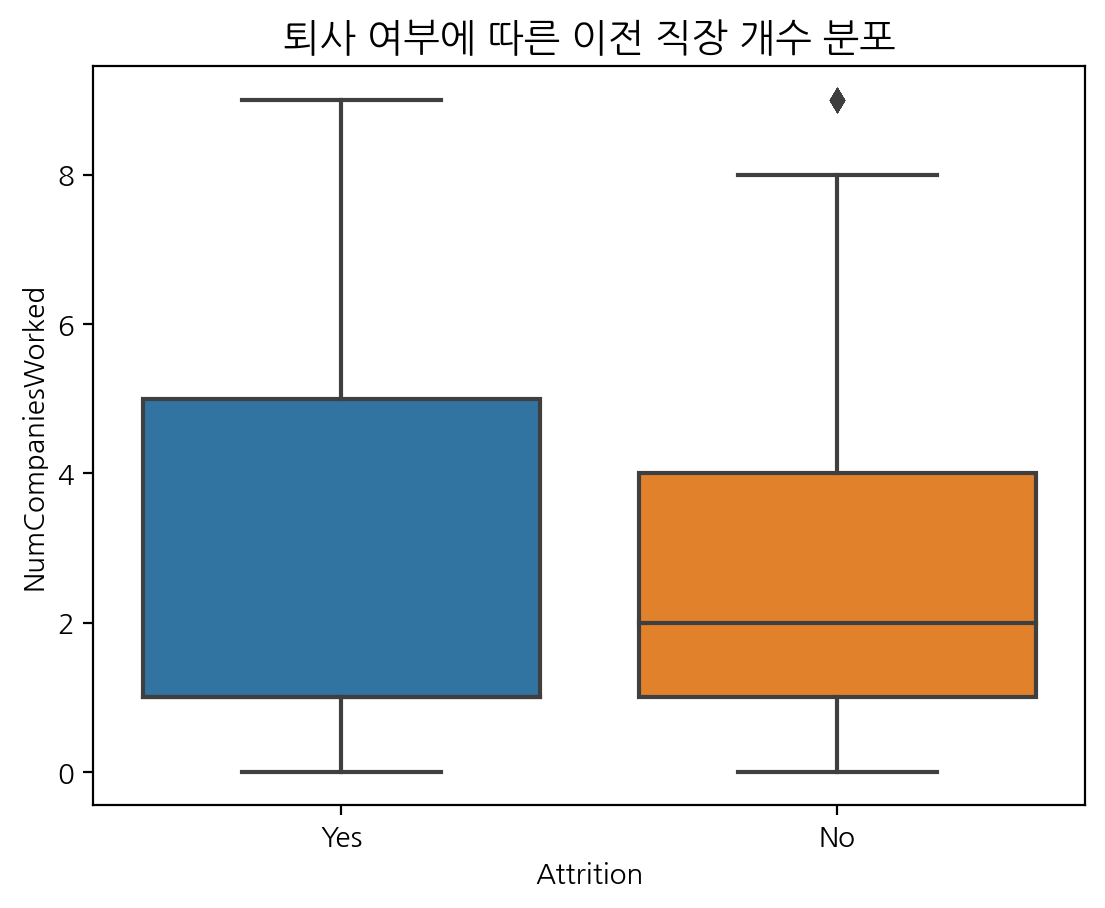

In [113]:
ax = sns.boxplot(data=df_raw, x='Attrition', y='NumCompaniesWorked')
ax.set_title('퇴사 여부에 따른 이전 직장 개수 분포', fontsize=14)

Text(0.5, 1.0, '퇴사 여부에 따른 이전 직장 개수 분포')

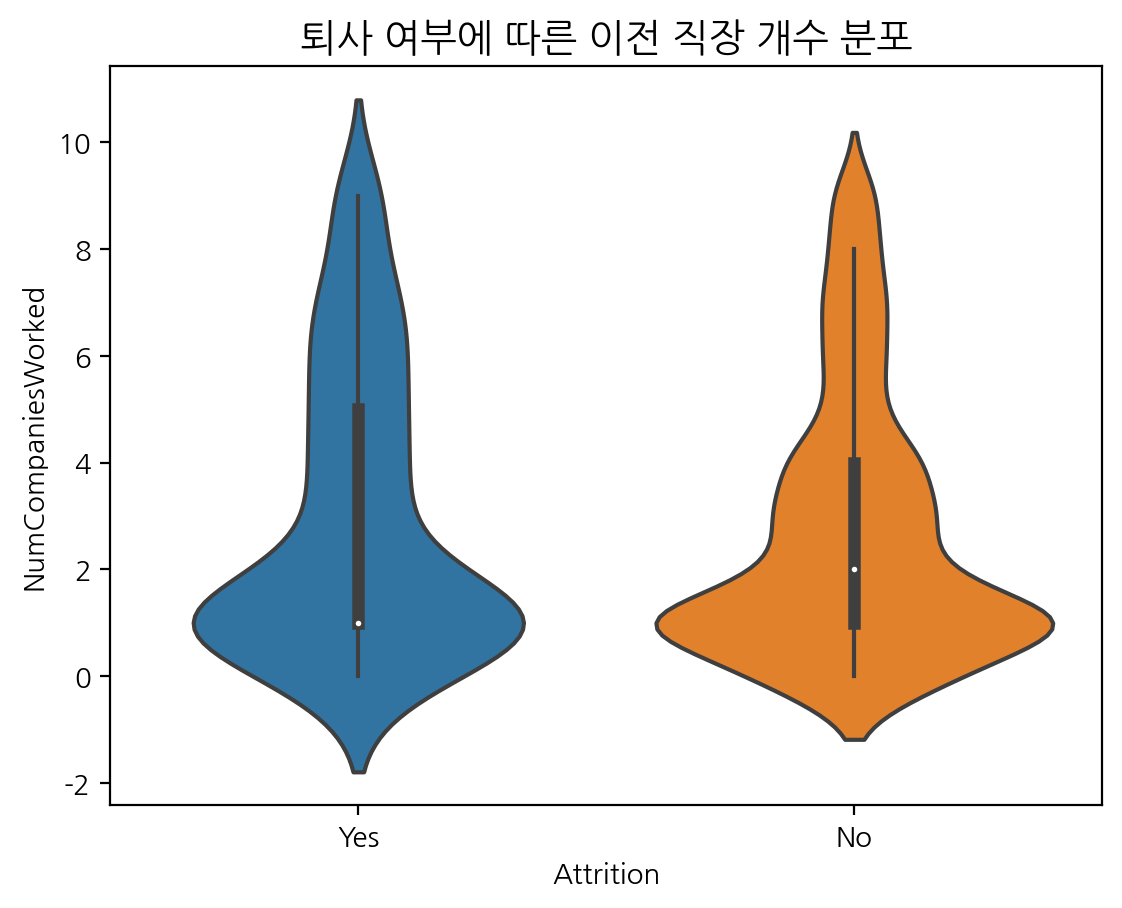

In [114]:
ax = sns.violinplot(data=df_raw, x='Attrition', y='NumCompaniesWorked')
ax.set_title('퇴사 여부에 따른 이전 직장 개수 분포', fontsize=14)

# 인간관계에 따른 퇴사 여부

In [115]:
# 현 부서장과 함께 근무한 년수
df_raw['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

Text(0.5, 1.0, '퇴사 여부에 따른 현 부서장과 근무 년수 분포')

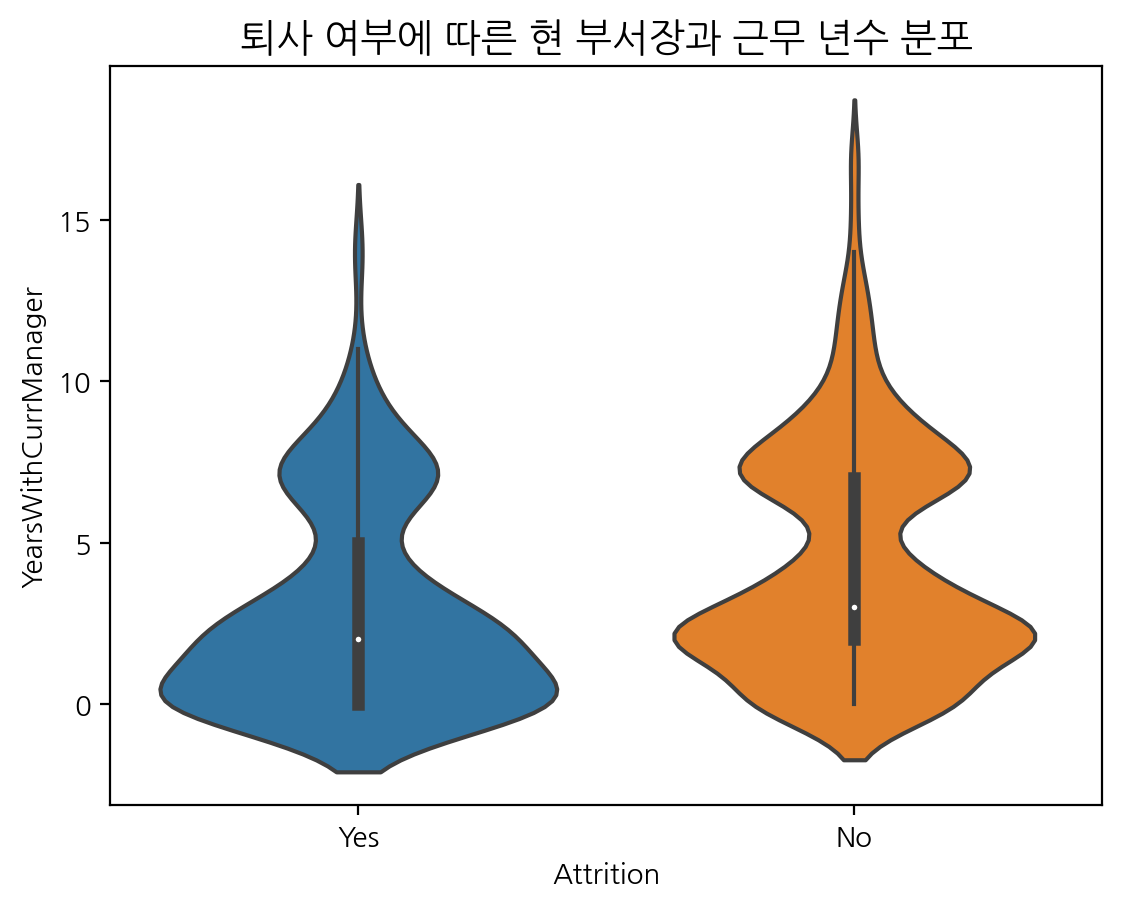

In [116]:
# violinplot
# 퇴사를 하는 사람은 대체적으로 현 부서장과 덜 오래 근무함.
# 부서장과의 유대 관계? 이것도 당연한 결과?
ax = sns.violinplot(data=df_raw, x='Attrition', y='YearsWithCurrManager')
ax.set_title('퇴사 여부에 따른 현 부서장과 근무 년수 분포', fontsize=14)

In [117]:
# 현 부서장과 근무한 년수 별 퇴사비율
# 5년마다 YearsWithCurrManager 나누고 퇴사 비율 구하기

df_raw['YearsWithCurrManager_Group'] = pd.cut(df_raw['YearsWithCurrManager'], bins=range(0, df_raw['YearsWithCurrManager'].max()+6, 5), right=False)
df_raw[['YearsWithCurrManager', 'YearsWithCurrManager_Group']].head()

YearsWithCurrManager YearsWithCurrManager_Group
EmployeeNumber                                                 
1                                  5                    [5, 10)
2                                  7                    [5, 10)
4                                  0                     [0, 5)
5                                  0                     [0, 5)
7                                  2                     [0, 5)

In [118]:
df_ywcm_attr = df_raw.groupby('YearsWithCurrManager_Group').agg({"Attrition":"value_counts"})
df_ywcm_attr

Attrition
YearsWithCurrManager_Group Attrition           
[0, 5)                     No               747
                           Yes              176
[5, 10)                    No               392
                           Yes               55
[10, 15)                   No                80
                           Yes                6
[15, 20)                   No                14

In [119]:
# YearsWithCurrManager 그룹별 퇴사비율
attr_dict_ywcm = {'attr_0to4': (df_ywcm_attr.iloc[1,:] / (df_ywcm_attr.iloc[0,:] + df_ywcm_attr.iloc[1,:])),
             'attr_5to9': (df_ywcm_attr.iloc[3,:] / (df_ywcm_attr.iloc[2,:] + df_ywcm_attr.iloc[3,:])),             
             'attr_10to14': (df_ywcm_attr.iloc[5,:] / (df_ywcm_attr.iloc[4,:] + df_ywcm_attr.iloc[5,:])),
             'attr_15to19': 0}
attr_dict_ywcm

{'attr_0to4': Attrition    0.190683
 dtype: float64,
 'attr_5to9': Attrition    0.123043
 dtype: float64,
 'attr_10to14': Attrition    0.069767
 dtype: float64,
 'attr_15to19': 0}

In [120]:
attr_dict_ywcm_ratio = pd.DataFrame(attr_dict_ywcm)
attr_dict_ywcm_ratio

attr_0to4  attr_5to9  attr_10to14  attr_15to19
Attrition   0.190683   0.123043     0.069767            0

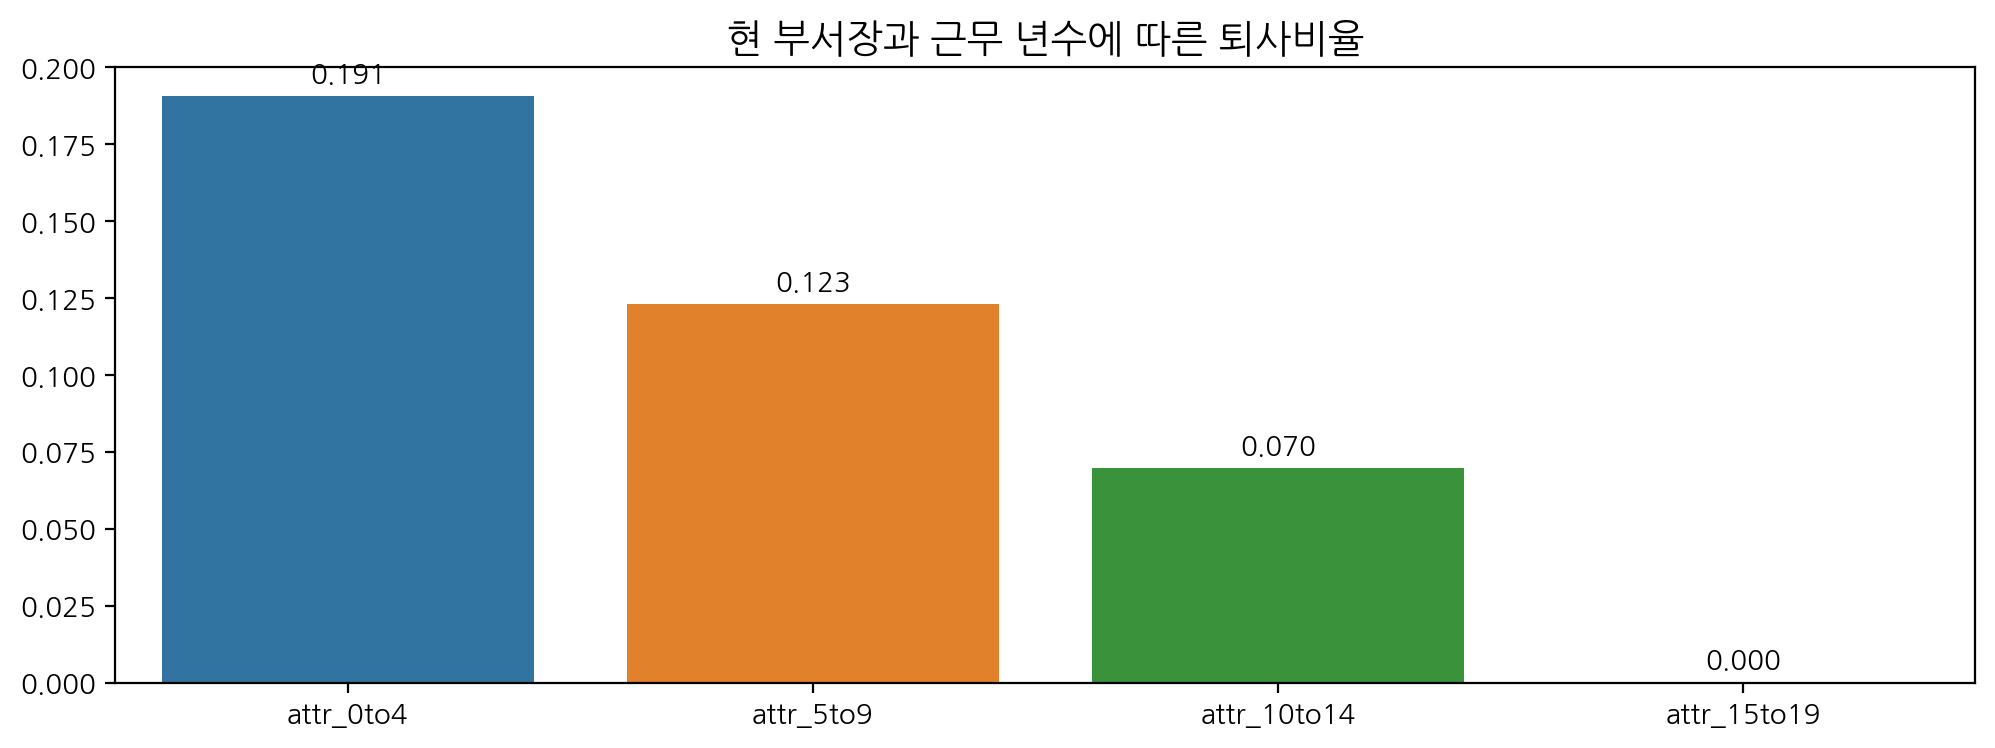

In [121]:
# YearsWithCurrManager 그룹별 퇴사비율 시각화
plt.figure(figsize=(12,4))
ax = sns.barplot(attr_dict_ywcm_ratio)
ax.set_title('현 부서장과 근무 년수에 따른 퇴사비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

In [122]:
# 퇴사한 사람들의 인간관계 만족도
# -> 퇴사한 사람의 경우 평균 0.2점 낮음.

df_raw.groupby('Attrition').agg({'RelationshipSatisfaction':['mean', 'value_counts']})

RelationshipSatisfaction             
                             mean value_counts
(No, 1)                       NaN        219.0
(No, 2)                       NaN        258.0
(No, 3)                       NaN        388.0
(No, 4)                       NaN        368.0
(Yes, 1)                      NaN         57.0
(Yes, 2)                      NaN         45.0
(Yes, 3)                      NaN         71.0
(Yes, 4)                      NaN         64.0
No                       2.733982          NaN
Yes                      2.599156          NaN

<AxesSubplot: xlabel='Attrition', ylabel='RelationshipSatisfaction'>

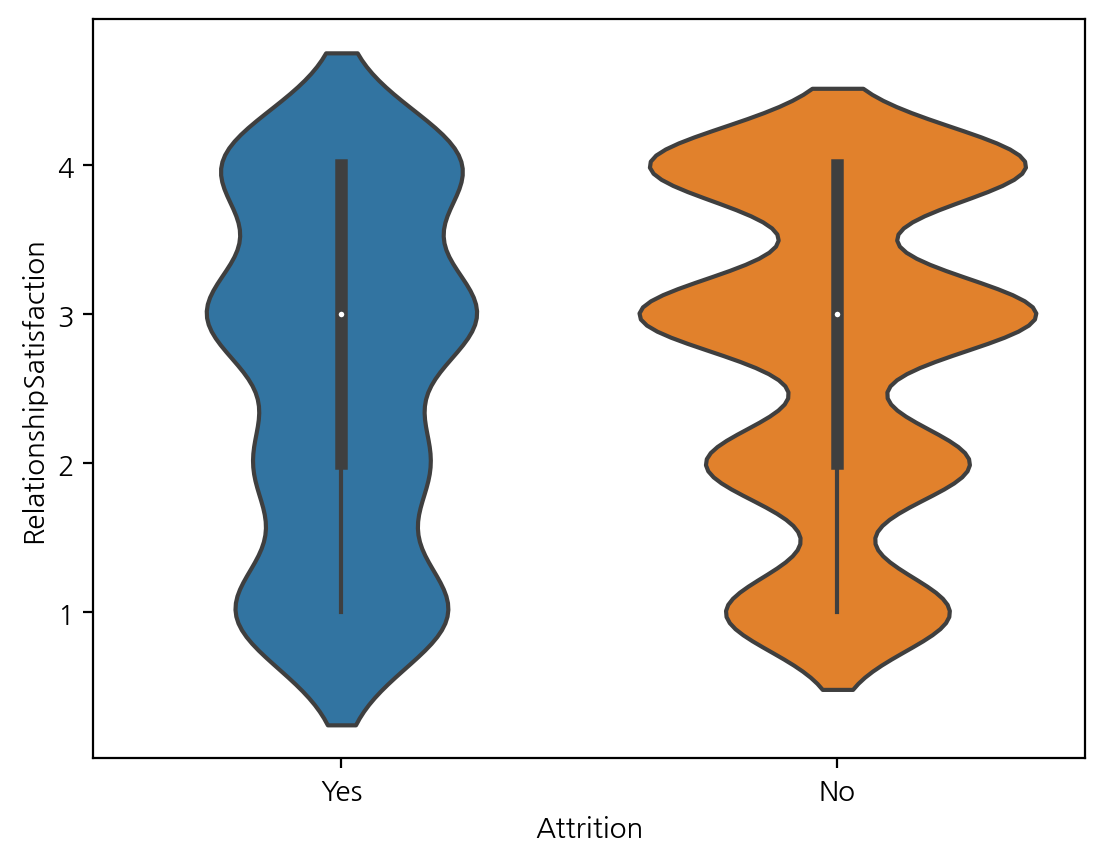

In [123]:
# 큰 특징 없음..
sns.violinplot(data=df_raw, x='Attrition', y='RelationshipSatisfaction')

# 야근 여부에 따른 퇴사 여부

In [124]:
df_raw['OverTime'].describe()

count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object

In [125]:
df_raw['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [126]:
df_overtime_attr = df_raw.groupby(['OverTime', 'Attrition']).agg({'Attrition':'count'})
df_overtime_attr

Attrition
OverTime Attrition           
No       No               944
         Yes              110
Yes      No               289
         Yes              127

In [127]:
# TotalWorkingYears 그룹별 퇴사비율
attr_overtime_dict = {'Overtime_No_attr': (df_overtime_attr.iloc[1,:] / (df_overtime_attr.iloc[0,:] + df_overtime_attr.iloc[1,:])),
             'Overtime_Yes_attr': (df_overtime_attr.iloc[3,:] / (df_overtime_attr.iloc[2,:] + df_overtime_attr.iloc[3,:]))}
attr_overtime_dict

{'Overtime_No_attr': Attrition    0.104364
 dtype: float64,
 'Overtime_Yes_attr': Attrition    0.305288
 dtype: float64}

In [128]:
df_overtime_attr_ratio = pd.DataFrame(attr_overtime_dict)
df_overtime_attr_ratio

Overtime_No_attr  Overtime_Yes_attr
Attrition          0.104364           0.305288

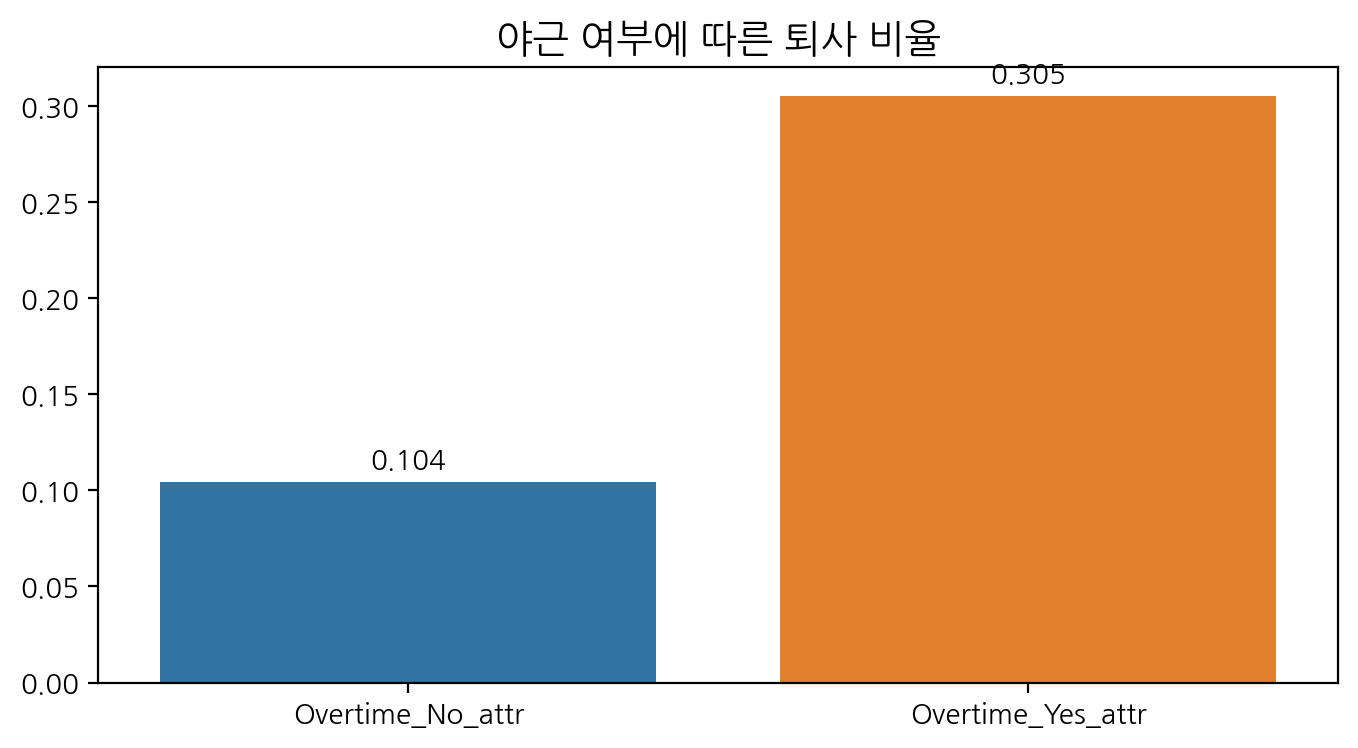

In [129]:
# 야근을 한 사람이 퇴사 비율이 높음

plt.figure(figsize=(8,4))
ax = sns.barplot(df_overtime_attr_ratio)
ax.set_title('야근 여부에 따른 퇴사 비율', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}', 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

<AxesSubplot: >

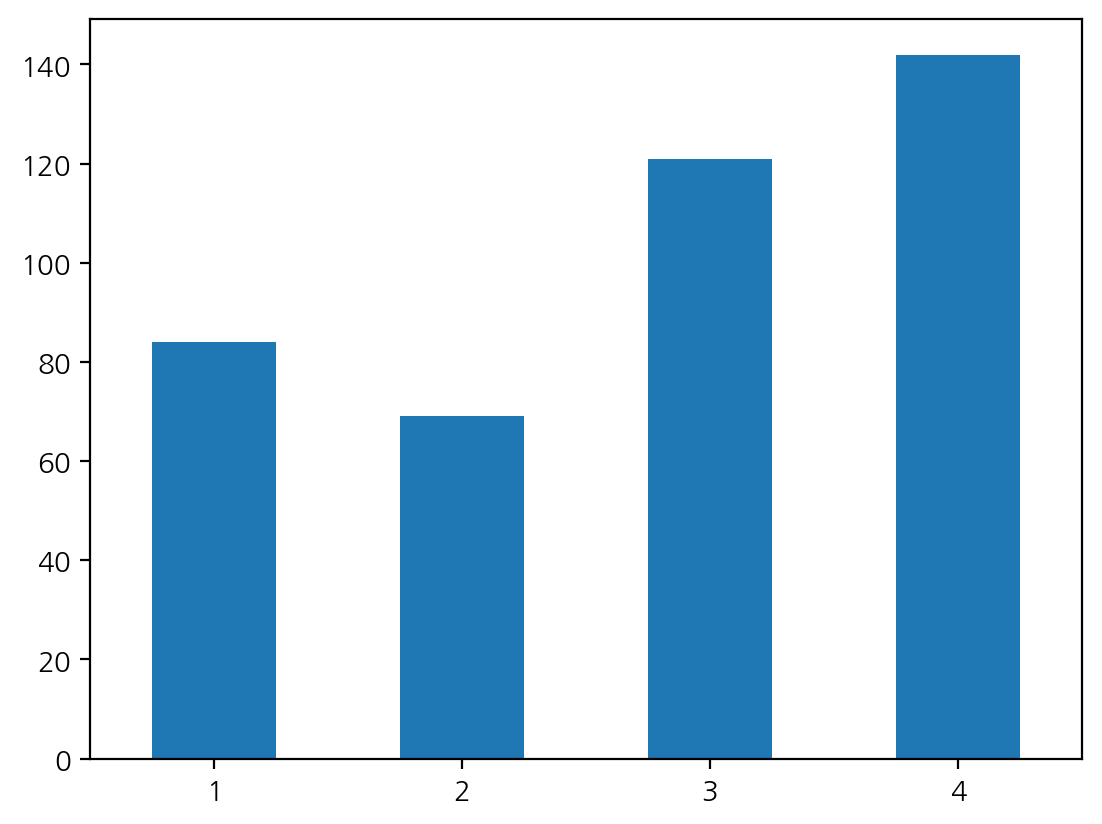

In [157]:
# 야근을 하는 사람들의 직무 만족도는 높을까?
df_raw[df_raw['OverTime'] == 'Yes']['JobSatisfaction'].value_counts().sort_index().plot.bar(rot=0)

# 머신러닝
## Feature Engineering

In [130]:
df_raw.describe(include='O')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus OverTime Experienced  저연차여부  
count              1470          1470     1470        1470   1470  
unique                9             3        2           2      2  
top     Sales Executive       Married       No          No  4년차초과  
freq                326           673     1054        1077   1242

In [131]:
# One-hot Encoding
# Attrition, OverTime, Gender 

In [132]:
# Ordinal Encoding
# BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [133]:
# 불균형 라벨값 고려하기 stratify=y 였던가..